In [1]:
from main import setup
from logreg import MultivarLogReg
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import accuracy_score

In [2]:
number_of_runs_per_method = 3
np.seterr(all='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

### Usage Notes
The training process outputs a bunch of runtime warnings depending on your system. Just ignore them, the code should work despite them.

If you are using jupyter lab, you can right click -> enable scrolling for outputs this makes working with training cells much more user friendly.

#### No Data Error: 
Make sure you downloaded the required datasets and place them in the same directory as this notebook.

#### Design a run:
- Choose a method from methods
- Choose a loss function 'ce' or 'ncce'
- Choose a dataset from 'a9a', 'covtype', 'ijcnn1', 'mnist'
- The rest of the parameters should be self-explanitory
- update the parameters of perform_train_run(dataset, loss, method, epochs=n)

#### Evaluation:
Note that the test accuracy is outputed at the end of the training run, so you might need to scroll down to the end of the output to see it.

In [3]:
def perform_runs(loss_function: str, methods, data_set: str, epochs, initial_w):
    all_training_losses = []
    all_gradient_norms = []
    all_training_accuracies = []
    all_execution_times = []
    all_test_accuracies = []

    for method in methods:
        training_losses = []
        gradient_norms = []
        training_accuracies = []
        test_accuracies = []
        execution_times = []
        for run in range(number_of_runs_per_method):
            X_train, X_test, y_train, y_test, loss_type, method_type = setup(data_set, loss_function, method)
            lr = MultivarLogReg(method_type, loss_type)

            start_t = time.time()
            lr.fit(X_train, y_train, epochs, batch_size=None, initial_weights=initial_w, epsilon=None)
            stop_t = time.time()
            execution_times.append(stop_t - start_t)

            accuracy = accuracy_score(y_true=y_test, y_pred=lr.predict(X_test))

            test_accuracies.append(accuracy)
            training_losses.append(lr.losses)
            gradient_norms.append(lr.grad_norm)
            training_accuracies.append(lr.train_accuracies)
        all_training_losses.append(training_losses)
        all_gradient_norms.append(gradient_norms)
        all_training_accuracies.append(training_accuracies)
        all_execution_times.append(execution_times)
        all_test_accuracies.append(test_accuracies)
    
    return all_execution_times, all_test_accuracies, all_gradient_norms, all_training_losses, all_training_accuracies



In [4]:


def average_runs_per_epoch(runs):
    runs = np.array(runs)  # shape: (num_runs, epochs, classes)
    return np.mean(runs, axis=0)


def generate_plots(data_set: str, loss_type: str, methods):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))

    def plot_stuff(training_losses, gradient_norms, train_acc, method_name="M22", data_set="IJCNN1"):
        # Average over runs per epoch
        avg_loss = average_runs_per_epoch(training_losses)
        avg_grad = average_runs_per_epoch(gradient_norms)
        avg_acc = average_runs_per_epoch(train_acc)

        ax1.plot(avg_loss, label=f"{method_name}")

        ax2.plot(avg_grad, label=f"{method_name}")

        ax3.plot(avg_acc[1:], label=f"{method_name}")

    for i, method in enumerate(methods):
        match method:
            case "gd":
                print("gd found")
                plot_stuff(all_training_losses[i], all_gradient_norms[i], all_training_accuracies[i], method_name="Gradient Descent")
            case "grn":
                print("grn found")
                plot_stuff(all_training_losses[i], all_gradient_norms[i], all_training_accuracies[i], method_name="Global Regularized Newton")
            case "adan":
                print("adan found")
                plot_stuff(all_training_losses[i], all_gradient_norms[i], all_training_accuracies[i], method_name="Adaptive Newton")
            case "newton":
                print("newton found")
                plot_stuff(all_training_losses[i], all_gradient_norms[i], all_training_accuracies[i], method_name="Classic Newton")
            case "adanp":
                print("adanp found")
                plot_stuff(all_training_losses[i], all_gradient_norms[i], all_training_accuracies[i], method_name="Adaptive Newton +")
            case "crn":
                try:
                    print("crn found")
                    plot_stuff(all_training_losses[i], all_gradient_norms[i], all_training_accuracies[i], method_name="Cubic Regularized Newton")
                except Exception:
                    print("Couldn't Load CRN")



    ax1.set_title(f"Loss (Averaged) - {data_set}, {loss_type}")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Loss")
    ax1.grid(True)

    ax2.set_title(f"Gradient Norm (Averaged) - {data_set}, {loss_type}")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Gradient Norm")
    ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
            ncol=2, fancybox=True, shadow=True)
    ax2.grid(True)

    ax3.set_title(f"Accuracy (Averaged) - {data_set}, {loss_type}")
    ax3.set_xlabel("Epoch")
    ax3.set_ylabel("Accuracy")
    ax3.grid(True)

    plt.tight_layout()
    fig.savefig(f"images/{data_set}-{loss_type}.png")
    plt.show()



In [5]:
epochs = 30
methods = ["gd", "grn", "adan", "newton", "adanp", "crn"]
all_execution_times, all_test_accuracies, all_gradient_norms, all_training_losses, all_training_accuracies = perform_runs("ce", methods, "ijcnn1", epochs=17, initial_w=None)
print(len(all_execution_times))
print(len(all_gradient_norms))

number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 163.16it/s]

weights min: -0.2286777814584424, max: 0.10235481906578929
weights min: -0.2454514359883587, max: 0.10218003339965329
weights min: -0.2563282929528211, max: 0.10206561751942031
weights min: -0.26433822765314374, max: 0.1019808883131334
weights min: -0.2706595474995772, max: 0.10191376515678063
weights min: -0.27587054801625127, max: 0.10185827424405496
weights min: -0.2802971304382608, max: 0.10401967614276433
weights min: -0.2930936153771086, max: 0.10714681821889258
weights min: -0.3049346099318155, max: 0.10989490084678642
weights min: -0.3155238898883918, max: 0.11234316513544498
weights min: -0.32509560095478673, max: 0.11454859196626603
weights min: -0.33382422316296695, max: 0.11655348863770562
weights min: -0.34184319568918586, max: 0.11839010531449538
weights min: -0.3492568127126106, max: 0.12008357317296155
weights min: -0.35614810796404844, max: 0.12165384557462627
weights min: -0.36258424676832673, max: 0.12311702171537924
weights min: -0.3686203138014639, max: 0.124486273

number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 165.03it/s]

weights min: -0.18848861599384187, max: 0.14383228919825286
weights min: -0.1920573860835656, max: 0.12227379454098136
weights min: -0.20358097986004495, max: 0.10825720597157547
weights min: -0.21206719316221542, max: 0.10157369548275319
weights min: -0.2187643477541543, max: 0.10714791483404953
weights min: -0.22428512526316036, max: 0.11170830370645807
weights min: -0.22897481274538806, max: 0.1155576118809572
weights min: -0.23304684454978347, max: 0.11888166308990147
weights min: -0.23664221047076844, max: 0.12180248144389975
weights min: -0.23985883192854168, max: 0.12440438260670712
weights min: -0.2427674381669745, max: 0.12674799381416368
weights min: -0.24542075455840098, max: 0.12887832771388869
weights min: -0.24785911809616068, max: 0.13082969519140972
weights min: -0.25011406533264363, max: 0.13262883208263154
weights min: -0.25221071121975824, max: 0.13429696488379358
weights min: -0.2541693764159714, max: 0.1358512192859059
weights min: -0.25600673073400765, max: 0.1373

number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 157.73it/s]

weights min: -0.13044362254325817, max: 0.19112844806332152
weights min: -0.18303553201573078, max: 0.20401658486480703
weights min: -0.2223291253621566, max: 0.21219037515574898
weights min: -0.2512348496521395, max: 0.2181202742360606
weights min: -0.2740278679468072, max: 0.22274735754981748
weights min: -0.2928045463971344, max: 0.22652706595563118
weights min: -0.3087454930922604, max: 0.22971335201729254
weights min: -0.3225800603080517, max: 0.23246184995137614
weights min: -0.33478980279442483, max: 0.23487462947155782
weights min: -0.3457090295224988, max: 0.23702214150294704
weights min: -0.3555791212366208, max: 0.23895499567020095
weights min: -0.36457995389307557, max: 0.24071073533535642
weights min: -0.3728490964018956, max: 0.24231795620209648
weights min: -0.38049407277421055, max: 0.24379892534243597
weights min: -0.38760048965406485, max: 0.24517131018310218
weights min: -0.39423759465665553, max: 0.24644935662720366
weights min: -0.40046218102281045, max: 0.24764471

number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 106.95it/s]

weights min: -0.7330787137703759, max: 0.24100136838928188
weights min: -1.240361873101171, max: 0.25867454269534684
weights min: -1.6510689693884633, max: 0.29507944012291226
weights min: -1.981689005362449, max: 0.33666492517546603
weights min: -2.2428944760135936, max: 0.38393922749719406
weights min: -2.4425625880818154, max: 0.4370257671541793
weights min: -2.587709722189942, max: 0.4954529359234624
weights min: -2.685902924611173, max: 0.5580499848834356
weights min: -2.7458178385491325, max: 0.6231776723137241
weights min: -2.776594857685606, max: 0.6892215525182659
weights min: -2.7866299589832466, max: 0.7549603450751692
weights min: -2.7827812471215214, max: 0.819626379971505
weights min: -2.7702368758589357, max: 0.8827950256430135
weights min: -2.847372392609744, max: 0.9442583089800951
weights min: -3.11084440340158, max: 1.003935869068096
weights min: -3.369438345368228, max: 1.0618212988348636
weights min: -3.6229949893498183, max: 1.1179510986539214


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 96.10it/s]

weights min: -0.7098208130487421, max: 0.29416876244336015
weights min: -1.2350423462138973, max: 0.34878557586275794
weights min: -1.65922849326257, max: 0.37533431451533295
weights min: -2.000075060602415, max: 0.3825416572248746
weights min: -2.2690409433336622, max: 0.37558023141243896
weights min: -2.474494517633126, max: 0.35803416470059646
weights min: -2.6237396235129213, max: 0.33289363565542
weights min: -2.724511664890407, max: 0.3029763328919756
weights min: -2.785650355286026, max: 0.3489015504340409
weights min: -2.8165401234740024, max: 0.4202401571172041
weights min: -2.8258788860535744, max: 0.49118113894847554
weights min: -2.820808933400436, max: 0.5609361697010372
weights min: -2.8287108604430213, max: 0.629086095135602
weights min: -3.09322157279325, max: 0.6954423215940363
weights min: -3.352986709475718, max: 0.7599479473235785
weights min: -3.6076823560127558, max: 0.8226186585044805
weights min: -3.857159655095711, max: 0.8835093164082652


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 92.29it/s]

weights min: -0.5346410256530073, max: 0.14389266711959867
weights min: -1.0666954419298178, max: 0.16365158009704753
weights min: -1.4974255630622886, max: 0.1997137761944255
weights min: -1.8455698130638698, max: 0.2449700892409376
weights min: -2.122829324269662, max: 0.26871272387216627
weights min: -2.337438455182225, max: 0.3057607644114542
weights min: -2.496296480092305, max: 0.3576789076582962
weights min: -2.6065194624273547, max: 0.41487754162847384
weights min: -2.6763129463545576, max: 0.47573115151772394
weights min: -2.7146744412114403, max: 0.538492479605457
weights min: -2.7302351582279303, max: 0.6017343196219577
weights min: -2.7302708299438883, max: 0.6645019150070408
weights min: -2.7203884950619823, max: 0.7262358428528223
weights min: -2.8872963160196083, max: 0.7866396455380478
weights min: -3.1491704454734353, max: 0.8455759112045778
weights min: -3.4062643592288104, max: 0.9030005978613893
weights min: -3.6583753432426183, max: 0.9589242011241025


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:  41%|████      | 7/17 [00:00<00:00, 69.01it/s]

weights min: -0.48285546289777803, max: 0.09685755659346398
weights min: -1.0404548837370202, max: 0.12575533371521685
weights min: -1.5962392300175674, max: 0.2068889843180792
weights min: -2.094547736568145, max: 0.2571669805488023
weights min: -2.4658091424328092, max: 0.38422986717284346
weights min: -2.6382560457977875, max: 0.6005510938612344
weights min: -3.3297443419315726, max: 0.9063822859465371
weights min: -4.906747542497783, max: 1.273241272359297
weights min: -6.657697772733832, max: 1.683216127666338
weights min: -8.522164739555132, max: 2.136558440372261
weights min: -10.433051834281306, max: 2.6289372892016036
weights min: -12.281211761366631, max: 3.1336762762601404
weights min: -13.908598807863514, max: 3.598229853858144
weights min: -15.135997877758527, max: 3.9589061257712252
weights min: -15.839035890184999, max: 4.290637213237797


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 69.03it/s]


weights min: -16.08215717820166, max: 4.414142622064717
weights min: -16.11721664314297, max: 4.432389534440157
number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/17 [00:00<?, ?it/s]

weights min: -0.5778539711236024, max: 0.10493643673371959
weights min: -1.1167457545930026, max: 0.13748452645741466
weights min: -1.6537895102382139, max: 0.22588592193757961


Training Epochs:  41%|████      | 7/17 [00:00<00:00, 69.85it/s]

weights min: -2.1335665235331605, max: 0.2717200805992596
weights min: -2.486041815759085, max: 0.39714314369345793
weights min: -2.641903136554081, max: 0.6045315254999827
weights min: -3.4130807275406463, max: 0.8899330421935782
weights min: -4.972310888223405, max: 1.2262230634862723
weights min: -6.706287445380427, max: 1.600080288514875
weights min: -8.563580358621618, max: 2.013881276075751
weights min: -10.477987533610058, max: 2.4634426911078533
weights min: -12.338431125489299, max: 2.9237001143092862
weights min: -13.984903676662338, max: 3.469815634617812
weights min: -15.238213821552476, max: 4.0347447115844925


Training Epochs:  82%|████████▏ | 14/17 [00:00<00:00, 63.58it/s]

weights min: -15.971332431268408, max: 4.395996431195611
weights min: -16.235887225687584, max: 4.533177825517815


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 62.63it/s]


weights min: -16.27695792996822, max: 4.55501117886793
number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/17 [00:00<?, ?it/s]

weights min: -0.6537059200209994, max: 0.23205141811007574
weights min: -1.1957274983927397, max: 0.22410528708372754
weights min: -1.7358681786532437, max: 0.21768578178334413


Training Epochs:  35%|███▌      | 6/17 [00:00<00:00, 54.58it/s]

weights min: -2.218431534506274, max: 0.2673635524480728
weights min: -2.57270047584835, max: 0.27010691844686946
weights min: -2.726581818291217, max: 0.4249982186798699
weights min: -3.426556371633747, max: 0.7418362120198688
weights min: -4.976368425759235, max: 1.123129760087875
weights min: -6.693535293903538, max: 1.5528932335112025
weights min: -8.52628224702659, max: 2.0296332196192917
weights min: -10.412543111227071, max: 2.54295116359161
weights min: -12.243577612159546, max: 3.05902272381259


Training Epochs:  76%|███████▋  | 13/17 [00:00<00:00, 58.49it/s]

weights min: -13.85945346677269, max: 3.6925170610050775
weights min: -15.080629930709708, max: 4.27685417286289
weights min: -15.784518856343125, max: 4.644194896586786


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 57.31it/s]


weights min: -16.032045946676817, max: 4.780250223232177
weights min: -16.068915849217788, max: 4.80104940982766
number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/17 [00:00<?, ?it/s]

weights min: -3.829941704476179, max: 0.933036508513367
weights min: -7.5667017258862685, max: 1.9373829137599634
weights min: -11.449518462034888, max: 3.125106527662349
weights min: -14.575611016973147, max: 4.223063524583676
weights min: -15.936419169192527, max: 4.758161558256489


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 104.86it/s]

weights min: -16.11984836521108, max: 4.835433842831104
weights min: -16.122777200181336, max: 4.836720969815066
weights min: -16.122777959290573, max: 4.836721313494626
weights min: -16.122777959290627, max: 4.83672131349465
weights min: -16.122777959290627, max: 4.8367213134946505
weights min: -16.122777959290627, max: 4.8367213134946505
weights min: -16.122777959290627, max: 4.83672131349465
weights min: -16.122777959290627, max: 4.8367213134946505
weights min: -16.122777959290627, max: 4.8367213134946505
weights min: -16.122777959290627, max: 4.83672131349465
weights min: -16.122777959290627, max: 4.8367213134946505
weights min: -16.122777959290627, max: 4.8367213134946505


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 103.13it/s]

weights min: -3.898364937391455, max: 0.9269319729585382
weights min: -7.647898362667895, max: 1.8986576012719043
weights min: -11.523865203679291, max: 3.0178656560095143
weights min: -14.614771470198614, max: 4.012096729399117
weights min: -15.927120695934187, max: 4.477425975761497
weights min: -16.094903387788168, max: 4.540985883681555
weights min: -16.097321375210957, max: 4.541941646278844
weights min: -16.097321886032255, max: 4.5419418545235954
weights min: -16.09732188603228, max: 4.541941854523606
weights min: -16.09732188603228, max: 4.541941854523605
weights min: -16.09732188603228, max: 4.541941854523606
weights min: -16.09732188603228, max: 4.541941854523605
weights min: -16.09732188603228, max: 4.541941854523605
weights min: -16.09732188603228, max: 4.541941854523605
weights min: -16.09732188603228, max: 4.541941854523605
weights min: -16.09732188603228, max: 4.541941854523605
weights min: -16.09732188603228, max: 4.541941854523606


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:  53%|█████▎    | 9/17 [00:00<00:00, 83.21it/s]

weights min: -3.9026193439201258, max: 0.8985953460441578
weights min: -7.645892226104945, max: 1.8377232445326566
weights min: -11.52333409394832, max: 2.9188170452366022
weights min: -14.629654859379503, max: 3.8999347210429125
weights min: -15.969168684060156, max: 4.370766343413829
weights min: -16.145577755339982, max: 4.437081625908284
weights min: -16.148258990295226, max: 4.438131502726114
weights min: -16.148259617899196, max: 4.438131755551481
weights min: -16.14825961789923, max: 4.438131755551495
weights min: -16.14825961789923, max: 4.438131755551495
weights min: -16.14825961789923, max: 4.438131755551495
weights min: -16.14825961789923, max: 4.438131755551495
weights min: -16.14825961789923, max: 4.438131755551495
weights min: -16.14825961789923, max: 4.438131755551495
weights min: -16.14825961789923, max: 4.438131755551495
weights min: -16.14825961789923, max: 4.438131755551495


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 84.56it/s]

weights min: -16.14825961789923, max: 4.438131755551495


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/17 [00:00<?, ?it/s]

weights min: -1.4958466396721426, max: 0.3410256331943407
weights min: -2.4924915722429573, max: 0.58509816227423
weights min: -3.76635143013607, max: 0.8878595314985152
weights min: -5.477582244241026, max: 1.2799007422507767


Training Epochs:  41%|████      | 7/17 [00:00<00:00, 69.07it/s]

weights min: -7.375507661776309, max: 1.7115130608581879
weights min: -9.348423495017125, max: 2.170076872008023
weights min: -11.29177798589483, max: 2.6385183855956713
weights min: -13.059044577481743, max: 3.2045704987372643
weights min: -14.417089023303426, max: 3.8043932505782
weights min: -15.268151096489321, max: 4.218705679879312
weights min: -15.687571824366874, max: 4.436283622140715
weights min: -15.82869086170797, max: 4.512128564308269
weights min: -15.854779451496084, max: 4.526384501748817


Training Epochs:  82%|████████▏ | 14/17 [00:00<00:00, 59.87it/s]

weights min: -15.856730355706242, max: 4.5274575293166235
weights min: -15.856768538772254, max: 4.527478578130149
weights min: -15.856768641324788, max: 4.527478634709139


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 59.40it/s]


weights min: -15.856768641338984, max: 4.5274786347169735
number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/17 [00:00<?, ?it/s]

weights min: -1.5427847022332128, max: 0.26958977462212863
weights min: -2.1117574677358375, max: 0.514914080415467


Training Epochs:  35%|███▌      | 6/17 [00:00<00:00, 53.22it/s]

weights min: -3.402721647745545, max: 0.8300181307543029
weights min: -5.148496016441471, max: 1.2404602913189988
weights min: -7.0817099671448505, max: 1.6945267457583728
weights min: -9.099373565868053, max: 2.1822694621258822
weights min: -11.109779933251787, max: 2.687779658840642
weights min: -12.973756359985043, max: 3.170929687193567
weights min: -14.458247536459968, max: 3.717338267623398
weights min: -15.432667486789054, max: 4.181713210982849
weights min: -15.946887894361216, max: 4.445422850054136


Training Epochs:  71%|███████   | 12/17 [00:00<00:00, 51.77it/s]

weights min: -16.139022795674162, max: 4.548116546293527
weights min: -16.180628940937805, max: 4.570805282305674


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 53.80it/s]

weights min: -16.1845608099582, max: 4.572967683679055
weights min: -16.184669410954296, max: 4.5730276058926185
weights min: -16.184669897334324, max: 4.573027874595395
weights min: -16.184669897478987, max: 4.573027874675356


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:  41%|████      | 7/17 [00:00<00:00, 66.90it/s]

weights min: -1.528425280501343, max: 0.327182874899378
weights min: -2.3103692906618694, max: 0.5696334622866484
weights min: -3.5829847147961127, max: 0.8720378377111884
weights min: -5.3045869991443055, max: 1.2668507294354292
weights min: -7.219740690774381, max: 1.7066793941539493
weights min: -9.217327008631603, max: 2.1826758935639465
weights min: -11.199897866119462, max: 2.679348237568197
weights min: -13.027575994092603, max: 3.2845693320237626
weights min: -14.471833781320084, max: 3.934355359046445
weights min: -15.406992987081894, max: 4.40186556977872
weights min: -15.890178344552977, max: 4.660020903650372
weights min: -16.064738005607634, max: 4.756732140425081
weights min: -16.100616859740587, max: 4.776957297077611


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 57.94it/s]


weights min: -16.10375281707856, max: 4.778738172610767
weights min: -16.103830008832922, max: 4.778782138872439
weights min: -16.10383030021212, max: 4.778782305028582
weights min: -16.10383030027923, max: 4.77878230506687
number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:  47%|████▋     | 8/17 [00:00<00:00, 78.33it/s]

weights min: -0.32210126633552383, max: 0.07766968964487694
weights min: -0.578968050496786, max: 0.13274101928357296
weights min: -0.8168414727650296, max: 0.1868423326239813
weights min: -1.0366890582215502, max: 0.23230799338936045
weights min: -1.2395527712805343, max: 0.26998486126310967
weights min: -1.4264734881197543, max: 0.3007271573439529
weights min: -1.5984450754813893, max: 0.3253464035210592
weights min: -1.756389474968079, max: 0.3445843103155513
weights min: -1.9011457112358625, max: 0.3591021149247082
weights min: -2.0334678575922065, max: 0.36948062733419845
weights min: -2.1540288081227628, max: 0.3762266269681387
weights min: -2.263428054738926, max: 0.3797826018795699
weights min: -2.3622025998911758, max: 0.3805378724881181
weights min: -2.450840701496047, max: 0.3788398346855993
weights min: -2.5297983252628975, max: 0.375004428297753


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 72.62it/s]


weights min: -2.5995178865964754, max: 0.36932507090104866
weights min: -2.6604480471975624, max: 0.36207932606354476
number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/17 [00:00<?, ?it/s]

weights min: -0.3654360830678005, max: 0.126630221979085
weights min: -0.6191090528971962, max: 0.18603366814930888
weights min: -0.853947806396758, max: 0.2362294149287945
weights min: -1.070941660753872, max: 0.2780477087041723


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 84.55it/s]

weights min: -1.2711376203564706, max: 0.31237570102449164
weights min: -1.4555716721211203, max: 0.3400857368408348
weights min: -1.6252276169097148, max: 0.3619916883101787
weights min: -1.7810151846038822, max: 0.3788271688374864
weights min: -1.9237608883038126, max: 0.39123891973085534
weights min: -2.054207098721128, max: 0.3997897248637875
weights min: -2.173016495165845, max: 0.40496670793043815
weights min: -2.2807802793423924, max: 0.4071922296508208
weights min: -2.3780293783885798, max: 0.4068356217059274
weights min: -2.465248353436755, max: 0.40422464621531845
weights min: -2.542891841144078, max: 0.3996559088400078
weights min: -2.6114030116074236, max: 0.393403574803757
weights min: -2.6712327040177857, max: 0.38572577365166505


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 88.91it/s]

weights min: -0.3594193379363494, max: 0.12256411981477774
weights min: -0.6177582780748322, max: 0.1303510124618126
weights min: -0.8569241045771462, max: 0.13863714969951357
weights min: -1.0778852078144088, max: 0.1474891002920983
weights min: -1.2816997819283742, max: 0.15696730398629
weights min: -1.4694304174079682, max: 0.17908283950862744
weights min: -1.642092430991036, max: 0.21748017371209388
weights min: -1.8006262972123275, max: 0.24938968093825992
weights min: -1.9458858424923948, max: 0.27552867631048084
weights min: -2.0786363102201544, max: 0.2965429001027948
weights min: -2.1995586016996698, max: 0.3130068823228631
weights min: -2.3092576214520655, max: 0.3254296219104687
weights min: -2.4082737522124287, max: 0.33426319987068936
weights min: -2.4970971390738628, max: 0.33991270743656193
weights min: -2.576184681030691, max: 0.34274632390712595
weights min: -2.645979340205791, max: 0.3431045739556628
weights min: -2.706930534615086, max: 0.3413078415924716
6
6


[[0.11331415176391602, 0.10668492317199707, 0.11128115653991699], [0.1629040241241455, 0.18161725997924805, 0.1882796287536621], [0.25000500679016113, 0.27495908737182617, 0.3010270595550537], [0.16571903228759766, 0.1685340404510498, 0.20661687850952148], [0.29711294174194336, 0.3297600746154785, 0.30365490913391113], [0.2418990135192871, 0.20497465133666992, 0.19509410858154297]]
6
gd found
grn found
adan found
newton found
adanp found
crn found


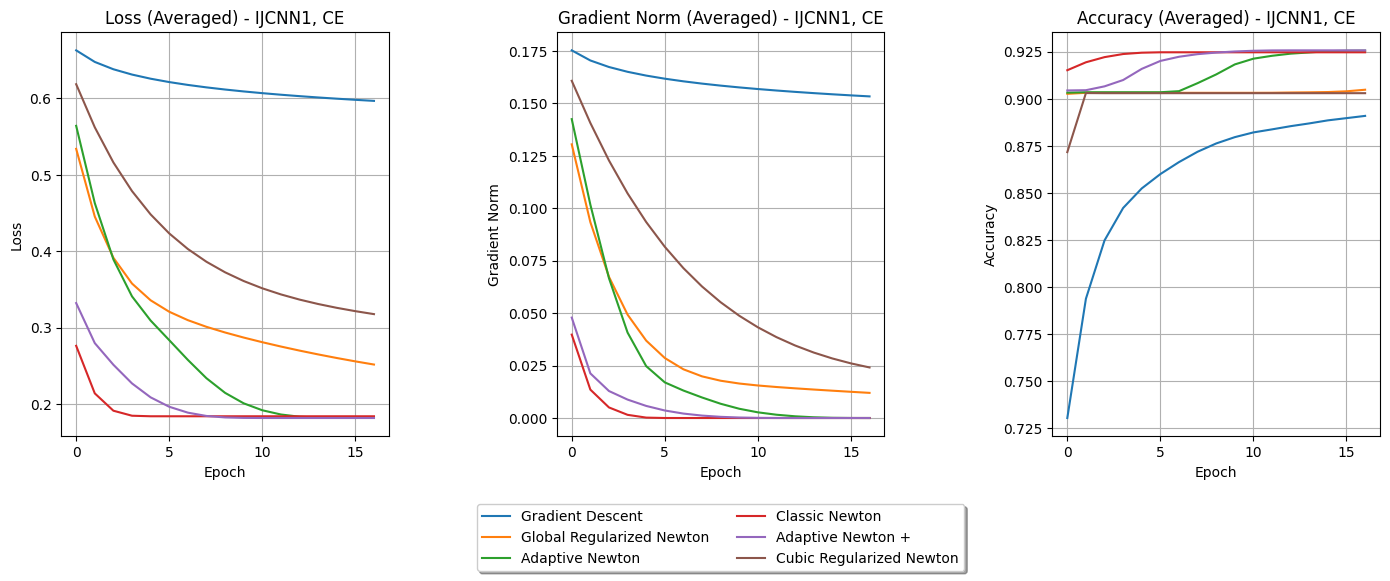

Average execution time(s): [0.11042674 0.1776003  0.27533038 0.18028998 0.31017598 0.21398926]
Average test accuracy(ies): [0.88934229 0.90361124 0.92257428 0.9262282  0.92153411 0.90294447]


In [6]:
print(all_execution_times)
print(len(all_gradient_norms))
generate_plots("IJCNN1", "CE", methods)
print(f"Average execution time(s): {np.mean(np.array(all_execution_times), axis=1)}")
print(f"Average test accuracy(ies): {np.mean(np.array(all_test_accuracies), axis=1)}")

In [7]:
epochs = 30
methods = ["gd", "grn", "adan", "adanp", "crn"] # Newton Fail
all_execution_times, all_test_accuracies, all_gradient_norms, all_training_losses, all_training_accuracies = perform_runs("ncce", methods, "ijcnn1", epochs=17, initial_w=None)


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/17 [00:00<?, ?it/s]

weights min: -0.17508683677763742, max: 0.0753071010689394
weights min: -0.16515645148511038, max: 0.07265332339103482
weights min: -0.1642858498924418, max: 0.07088446196286097
weights min: -0.16523721082880827, max: 0.0695579948407686
weights min: -0.1887617810974966, max: 0.06849693533059058
weights min: -0.20813065126635155, max: 0.06761279860996174
weights min: -0.22456708445145243, max: 0.06685502590509136
weights min: -0.23882634700305175, max: 0.06619202009481329
weights min: -0.251406861845175, max: 0.06560271765872827


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 150.94it/s]

weights min: -0.26265450447182037, max: 0.06507237489531643
weights min: -0.2728189162669916, max: 0.06459026961235476
weights min: -0.2820860690721964, max: 0.06414836050724183
weights min: -0.29059815285061, max: 0.06374046220420222
weights min: -0.2984662743838036, max: 0.06336171494100742
weights min: -0.3057788716898281, max: 0.06300823103905479
weights min: -0.31260746702630987, max: 0.0626768518593784
weights min: -0.3190107073067265, max: 0.06236497624735117


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/17 [00:00<?, ?it/s]

weights min: -0.1889974493104415, max: 0.18972630174740512
weights min: -0.20583356250147944, max: 0.18440305833045675
weights min: -0.216745582075744, max: 0.18087145916700711


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 154.43it/s]

weights min: -0.22477898090082718, max: 0.17823142486564444
weights min: -0.23111745540862397, max: 0.17612461113706698
weights min: -0.23634173608287432, max: 0.1743724141184212
weights min: -0.2407790110528538, max: 0.17287301952167378
weights min: -0.24463148366407422, max: 0.17156291647166755
weights min: -0.2480327018644348, max: 0.17039983296423533
weights min: -0.25107540535333234, max: 0.1693542198438156
weights min: -0.2572856846982309, max: 0.16840461311421234
weights min: -0.26624764372016163, max: 0.16753493233805203
weights min: -0.2744799413240414, max: 0.16673282012043938
weights min: -0.28208990944729057, max: 0.16598857578344042
weights min: -0.28916298601147955, max: 0.1652944451731857
weights min: -0.2957682704845274, max: 0.16464413283464738
weights min: -0.3019624258171239, max: 0.16403245794457588


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 147.94it/s]

weights min: -0.3159159265254333, max: 0.12557824601254816
weights min: -0.33165292215776826, max: 0.12660217515231262
weights min: -0.34184401312561835, max: 0.127280959636404
weights min: -0.3493426896148417, max: 0.12778809935135804
weights min: -0.3552569881557801, max: 0.12819263207055576
weights min: -0.3601301956973649, max: 0.12852895261589084
weights min: -0.3642682718159452, max: 0.12881666114904589
weights min: -0.36786023659952943, max: 0.12906798046798512
weights min: -0.3710308964335787, max: 0.12929104381633955
weights min: -0.37386690041612386, max: 0.12949153523580872
weights min: -0.3764308156224999, max: 0.1296735826735157
weights min: -0.37876926983442694, max: 0.12984027813994678
weights min: -0.3809179262965285, max: 0.1299939973611546
weights min: -0.3829046613022314, max: 0.13013660501387617
weights min: -0.38475167040074304, max: 0.13026959139492805
weights min: -0.3864769088553229, max: 0.13039416628479536
weights min: -0.388095103578885, max: 0.13101869477840

number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 96.52it/s] 

weights min: -0.6661566372112293, max: 0.19855560303137135
weights min: -1.1806291570303042, max: 0.1994545045000975
weights min: -1.6002588183397495, max: 0.2346810272569084
weights min: -1.94000648042981, max: 0.27455608807128085
weights min: -2.210365756808942, max: 0.2935650445910956
weights min: -2.4190118707865, max: 0.29670769003819825
weights min: -2.5726504254603504, max: 0.28812342596726054
weights min: -2.678545247993157, max: 0.32422412456193106
weights min: -2.7452947751678516, max: 0.3806604065053736
weights min: -2.782243485081318, max: 0.43700591512228765
weights min: -2.798091576320659, max: 0.49238227695514253
weights min: -2.7999282708377797, max: 0.54635998185402
weights min: -2.793058508195561, max: 0.598798368861215
weights min: -3.0373625723011117, max: 0.6497063713636714
weights min: -3.302265970719085, max: 0.6991600181990351
weights min: -3.5617016137393795, max: 0.7472608614696212
weights min: -3.8155575222154576, max: 0.7941165470337795


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 101.24it/s]

weights min: -0.5866388070252015, max: 0.2078587146769531
weights min: -1.1251200492851807, max: 0.2887325022218059
weights min: -1.5655395612360123, max: 0.3343905743133933
weights min: -1.9234644878634408, max: 0.3556156386081731
weights min: -2.210089729650827, max: 0.3589632062847424
weights min: -2.4334535060011033, max: 0.3489953253400517
weights min: -2.6002520564588787, max: 0.3294483254819615
weights min: -2.7173872441079037, max: 0.36888869335666064
weights min: -2.792985122376908, max: 0.4195357149589007
weights min: -2.836192479803958, max: 0.4707056153740768
weights min: -2.8559163286554177, max: 0.5213857702225589
weights min: -2.8596793232239217, max: 0.5709919883639175
weights min: -2.853244053088197, max: 0.6192584489453482
weights min: -3.0151080206551635, max: 0.6661055412275327
weights min: -3.278259500982566, max: 0.7115502837333098
weights min: -3.536312274530644, max: 0.7556565019144463
weights min: -3.78908040163567, max: 0.7985089732906285


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 103.65it/s]

weights min: -0.6101275346965597, max: 0.11339911267225378
weights min: -1.132006708478754, max: 0.20365148223095536
weights min: -1.5579573847085588, max: 0.2580234359568915
weights min: -1.9030086470650487, max: 0.2869896935201098
weights min: -2.1779379803934042, max: 0.2970904730445413
weights min: -2.390604595339499, max: 0.29299670541222544
weights min: -2.547776350867276, max: 0.27859908451494353
weights min: -2.6566718993013088, max: 0.27020293993261413
weights min: -2.7258003810481606, max: 0.3337735082363609
weights min: -2.7644644363535282, max: 0.39659352517137414
weights min: -2.781407453914395, max: 0.4578322813691592
weights min: -2.7838170484976055, max: 0.5171335266914129
weights min: -2.7771096987443045, max: 0.5744354557403641
weights min: -2.977148691928721, max: 0.6298189979361206
weights min: -3.243062688324031, max: 0.6834206904322364
weights min: -3.5036281515886905, max: 0.7353907965472791
weights min: -3.7586957663861402, max: 0.7858752549424559


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:  47%|████▋     | 8/17 [00:00<00:00, 69.83it/s]

weights min: -0.45935818873166534, max: 0.1690416536485508
weights min: -1.0186934334422444, max: 0.25812981415304903
weights min: -1.5870250825966654, max: 0.31316625380247415
weights min: -2.1062364917191037, max: 0.3269190863904805
weights min: -2.5071999081350755, max: 0.2969613283559636
weights min: -2.7190758326526527, max: 0.4628233481179156
weights min: -3.464257731882599, max: 0.6921257807223825
weights min: -5.0488739519412364, max: 0.9769363183331226
weights min: -6.794755287818038, max: 1.325058773795213
weights min: -8.641987862975713, max: 1.7470831373321405
weights min: -10.52945177574738, max: 2.2423819630750104
weights min: -12.35402152558211, max: 2.780176640212857
weights min: -13.967768250269165, max: 3.2937235535443
weights min: -15.17736772653481, max: 3.6920907227687563


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 67.05it/s]


weights min: -15.839136610729408, max: 3.8991436158872133
weights min: -16.05894357820368, max: 3.955118528534163
weights min: -16.090833753391305, max: 3.95683985466043
number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/17 [00:00<?, ?it/s]

weights min: -0.50625173533906, max: 0.17033769330082546


Training Epochs:  82%|████████▏ | 14/17 [00:00<00:00, 68.75it/s]

weights min: -1.0588934682567517, max: 0.19383741482638414
weights min: -1.6193196401959713, max: 0.256233652683202
weights min: -2.130195742614498, max: 0.293300197707997
weights min: -2.5220069927748074, max: 0.3935814470631638
weights min: -2.722992471968862, max: 0.5503019262219486
weights min: -3.3260151253768315, max: 0.7665248298056766
weights min: -4.921390054778344, max: 1.032005921257291
weights min: -6.676757898887502, max: 1.3495551138057027
weights min: -8.53793137001093, max: 1.733383237865829
weights min: -10.44165726071112, max: 2.195019960587111
weights min: -12.283309678431397, max: 2.7084809549469817
weights min: -13.915009166617391, max: 3.2065251180393513
weights min: -15.150529262334008, max: 3.5966391279431025
weights min: -15.854434848243535, max: 3.940925163536341


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 66.36it/s]


weights min: -16.173806269343835, max: 4.307003859705501
weights min: -16.343045357752697, max: 4.410674237555272
number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/17 [00:00<?, ?it/s]

weights min: -0.5049267766179749, max: 0.22733453851072377
weights min: -1.0637399633481806, max: 0.2330220509251705
weights min: -1.6292563177643253, max: 0.2721317937406704


Training Epochs:  47%|████▋     | 8/17 [00:00<00:00, 71.06it/s]

weights min: -2.1429460195850365, max: 0.29451470956399356
weights min: -2.5340244773148712, max: 0.34902289793947905
weights min: -2.7284785997497694, max: 0.5287863901292812
weights min: -3.228510084191096, max: 0.7740887658492962
weights min: -4.829201782690583, max: 1.0791737687150824
weights min: -6.58193471888944, max: 1.4453744364295695
weights min: -8.429535781487969, max: 1.8789437335199277
weights min: -10.31175024535974, max: 2.3799311538167203
weights min: -12.124197413931153, max: 2.9177810230708436
weights min: -13.713086689140518, max: 3.429665434442339
weights min: -14.890474938590906, max: 3.8250356518846136
weights min: -15.531770112756043, max: 4.025539894940157


Training Epochs:  94%|█████████▍| 16/17 [00:00<00:00, 63.93it/s]

weights min: -15.735398274754365, max: 4.059414374466692


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 64.87it/s]


weights min: -15.84180329345589, max: 4.038549434719692
number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/17 [00:00<?, ?it/s]

weights min: -1.5954033818584283, max: 0.18109482933511495
weights min: -2.184825272384173, max: 0.3471776586725428
weights min: -3.148448797293349, max: 0.5713876949399621


Training Epochs:  82%|████████▏ | 14/17 [00:00<00:00, 68.31it/s]

weights min: -4.87433526423568, max: 0.8702486136978562
weights min: -6.797847533178473, max: 1.2475893001769292
weights min: -8.804720308062443, max: 1.7161054105339004
weights min: -10.818820526399133, max: 2.261694957836398
weights min: -12.718177754366517, max: 2.8337402377515013
weights min: -14.30336644531451, max: 3.3437714285400553
weights min: -15.337750643476507, max: 3.683327512315113
weights min: -15.883405239370555, max: 3.8516372913005963
weights min: -16.128792216823125, max: 4.026463546729368
weights min: -16.229953190283588, max: 4.14917895574827
weights min: -16.285345236213338, max: 4.200918554773132
weights min: -16.31175762270077, max: 4.226363068933327
weights min: -16.330797959265624, max: 4.245954581971543


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 68.39it/s]

weights min: -16.354311451098713, max: 4.2705646169410025


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/17 [00:00<?, ?it/s]

weights min: -1.5454058834271152, max: 0.31054097407400116
weights min: -2.135987129495775, max: 0.46924963950000576
weights min: -3.1538081796150457, max: 0.6772259413776457


Training Epochs:  41%|████      | 7/17 [00:00<00:00, 65.46it/s]

weights min: -4.892346637080115, max: 0.9660367049158268
weights min: -6.826558869817203, max: 1.3262857389953626
weights min: -8.84264048630389, max: 1.7667809007013924
weights min: -10.862847318894367, max: 2.282789907923853
weights min: -12.763099002639322, max: 2.823996694471183
weights min: -14.328539302983149, max: 3.297967300177683
weights min: -15.326807694744058, max: 3.679420938167578
weights min: -15.875988344589853, max: 3.995607831270307
weights min: -16.18604350393201, max: 4.319216624550385


Training Epochs:  82%|████████▏ | 14/17 [00:00<00:00, 66.88it/s]

weights min: -16.377360969232598, max: 4.472500064528028
weights min: -16.451524810515323, max: 4.52715253680358
weights min: -16.468605486763252, max: 4.539543811540352
weights min: -16.470107767689957, max: 4.540636993346675


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 66.45it/s]

weights min: -16.470145941786402, max: 4.540665093867483


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/17 [00:00<?, ?it/s]

weights min: -1.560008697465539, max: 0.17349884408982533
weights min: -2.131509131736684, max: 0.3637529717810175


Training Epochs:  35%|███▌      | 6/17 [00:00<00:00, 53.69it/s]

weights min: -3.1684691977616293, max: 0.6002785042248078
weights min: -4.9001047036553596, max: 0.9161171502884747
weights min: -6.8173069616465405, max: 1.3099252793397804
weights min: -8.812180687946194, max: 1.7860210868513104
weights min: -10.81130419596065, max: 2.32902120525168
weights min: -12.693983909704114, max: 2.8883528480344918
weights min: -14.244937558890975, max: 3.372240984614629
weights min: -15.238244870850203, max: 3.682510415277371
weights min: -15.76808999167656, max: 3.8352984551587563


Training Epochs:  71%|███████   | 12/17 [00:00<00:00, 52.38it/s]

weights min: -16.002543303249155, max: 3.9863752565857773
weights min: -16.090438946419823, max: 4.089764361723014


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 53.64it/s]

weights min: -16.155404439533804, max: 4.171468833669716
weights min: -16.20907118941126, max: 4.229578884363365
weights min: -16.243588280296553, max: 4.264077005610358
weights min: -16.250836212386726, max: 4.270528792187462


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:  47%|████▋     | 8/17 [00:00<00:00, 79.59it/s]

weights min: -0.20077801132123937, max: 0.2070219600428554
weights min: -0.45705677795889893, max: 0.20420123473722712
weights min: -0.7006701281203496, max: 0.2013077079130733
weights min: -0.926258599684661, max: 0.19835929960872223
weights min: -1.1349661406716047, max: 0.22261689005917273
weights min: -1.327827715791533, max: 0.2578152888149332
weights min: -1.5058044571670512, max: 0.2862051102383258
weights min: -1.6697875696227222, max: 0.30858752337338735
weights min: -1.820594478841911, max: 0.3256866311994189
weights min: -1.9589666438463662, max: 0.33814485238609693
weights min: -2.085570902876869, max: 0.34652692411932867
weights min: -2.2010041069450583, max: 0.351328543662503
weights min: -2.3058006127519954, max: 0.3529872210011511
weights min: -2.4004425088728483, max: 0.3518938351905618
weights min: -2.485372727034507, max: 0.34840387832229486
weights min: -2.5610111864564944, max: 0.3428475497464851


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 82.21it/s]

weights min: -2.627773613699757, max: 0.33553784657897984


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/17 [00:00<?, ?it/s]

weights min: -0.2839775490272497, max: 0.29356932312058753
weights min: -0.4770889875948576, max: 0.28895493032998276
weights min: -0.716677552815697, max: 0.2846401239225991
weights min: -0.9385581967685961, max: 0.28071847514979753
weights min: -1.143857743874198, max: 0.277259885034402


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 89.39it/s]

weights min: -1.3335942420261704, max: 0.27675699292624545
weights min: -1.5087117096169242, max: 0.30067426082171295
weights min: -1.670084742375138, max: 0.31907094544724385
weights min: -1.818515436623465, max: 0.33263233177010243
weights min: -1.9547316187811055, max: 0.34196048928400513
weights min: -2.0793883380651486, max: 0.34758096256601395
weights min: -2.1930725209987982, max: 0.3499529684784275
weights min: -2.2963104440105684, max: 0.34948102289908795
weights min: -2.3895779222619993, max: 0.3465267282342015
weights min: -2.473313342188247, max: 0.3414198623983149
weights min: -2.5479336193634725, max: 0.33446803496469224
weights min: -2.613852629563098, max: 0.3259641387183909


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 86.46it/s]

weights min: -0.2829340028706066, max: 0.16414556108024114
weights min: -0.48178744104519133, max: 0.21985400437737596
weights min: -0.7203329599864952, max: 0.2662031637801434
weights min: -0.9412568020469225, max: 0.30401606074830867
weights min: -1.145679342977949, max: 0.33419449236067794
weights min: -1.334609425960006, max: 0.35764055436410097
weights min: -1.5089801088643167, max: 0.3751995993743245
weights min: -1.6696544443300434, max: 0.38763340246828487
weights min: -1.8174233187162492, max: 0.395612932673271
weights min: -1.9530042204579556, max: 0.39972204086409674
weights min: -2.077042986954188, max: 0.4004668308948102
weights min: -2.190118558213839, max: 0.39828764145973344
weights min: -2.292750505106438, max: 0.39357182355402776
weights min: -2.3854093151249525, max: 0.38666620452382927
weights min: -2.4685296159739925, max: 0.37788845756752937
weights min: -2.5425264211192444, max: 0.36753665948196895
weights min: -2.607813868272624, max: 0.35589625492342003


5
5
gd found
grn found
adan found
adanp found
crn found


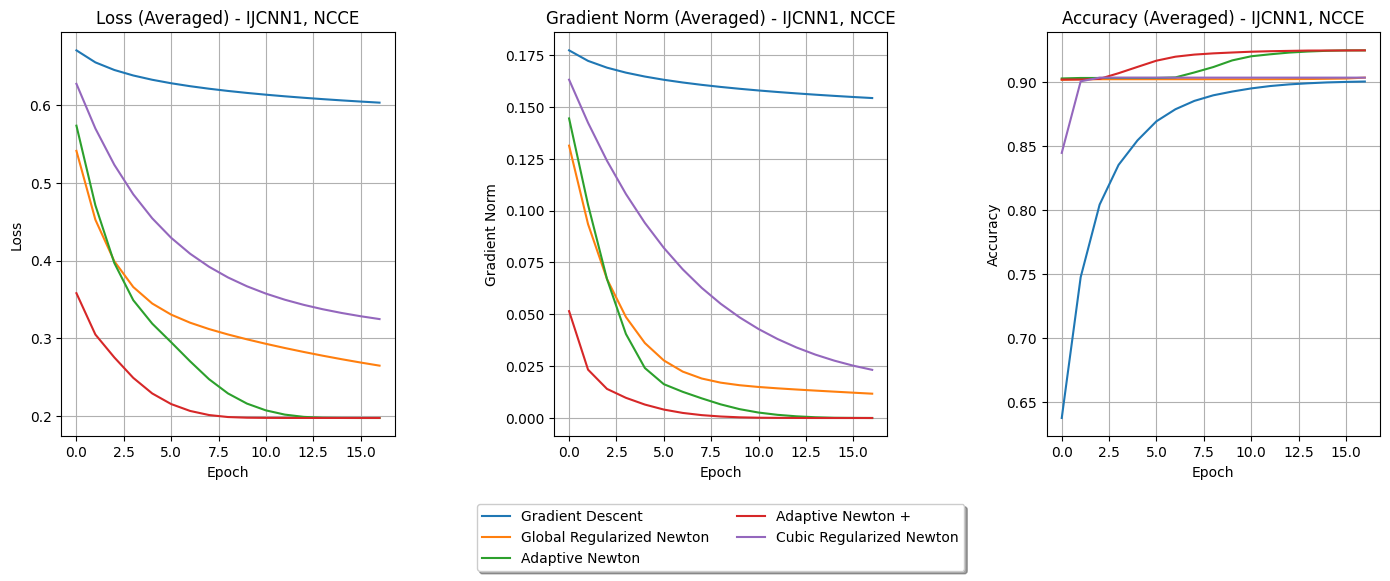

Average execution time(s): [0.11616317 0.17406511 0.26090709 0.2853574  0.20171062]
Average test accuracy(ies): [0.90379794 0.90598496 0.92321438 0.92601483 0.90083747]


In [8]:
print(len(all_execution_times))
print(len(all_gradient_norms))
generate_plots("IJCNN1", "NCCE", methods)
print(f"Average execution time(s): {np.mean(np.array(all_execution_times), axis=1)}")
print(f"Average test accuracy(ies): {np.mean(np.array(all_test_accuracies), axis=1)}")

In [9]:
epochs = 30
methods = ["gd", "grn", "adan", "adanp", "crn"] # newton failed
all_execution_times, all_test_accuracies, all_gradient_norms, all_training_losses, all_training_accuracies = perform_runs("ce", methods, "a9a", epochs=epochs, initial_w=None)


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

weights min: -0.3671208486584058, max: 0.208805638001138
weights min: -0.3316719646396632, max: 0.21164040425377673


Training Epochs:  13%|█▎        | 4/30 [00:00<00:00, 38.21it/s]

weights min: -0.3184097469740566, max: 0.21109813804290023
weights min: -0.3115073970454424, max: 0.21001835013661285
weights min: -0.30723150875165184, max: 0.2088938358432404
weights min: -0.30429029167040583, max: 0.20783364057208695
weights min: -0.30212191301693936, max: 0.20685899908421682


Training Epochs:  27%|██▋       | 8/30 [00:00<00:00, 38.27it/s]

weights min: -0.3004429213386935, max: 0.2074384477208391
weights min: -0.2990946529049426, max: 0.2119543344406256
weights min: -0.29798120110380244, max: 0.2159368617994953


Training Epochs:  40%|████      | 12/30 [00:00<00:00, 36.32it/s]

weights min: -0.29704106084379767, max: 0.21949423357266473
weights min: -0.2962328923685115, max: 0.22270514651058093
weights min: -0.29552782820681267, max: 0.22562856583385568
weights min: -0.2966968700560979, max: 0.2283097745666668
weights min: -0.29829840151845577, max: 0.23078427714348945


Training Epochs:  53%|█████▎    | 16/30 [00:00<00:00, 35.59it/s]

weights min: -0.29981185663222487, max: 0.23308040827823343
weights min: -0.3012456376588904, max: 0.23522112927194466


Training Epochs:  67%|██████▋   | 20/30 [00:00<00:00, 35.00it/s]

weights min: -0.30260711195303436, max: 0.2372252969769165
weights min: -0.3039027481201496, max: 0.2391085804627914
weights min: -0.30513823935649526, max: 0.24088413630013153
weights min: -0.30631861140966965, max: 0.24256311473341963
weights min: -0.30744831543125545, max: 0.24415504501191088
weights min: -0.30853130712870486, max: 0.245668132830916


Training Epochs:  80%|████████  | 24/30 [00:00<00:00, 35.39it/s]

weights min: -0.309571113968525, max: 0.2471094928267139
weights min: -0.31057089217166794, max: 0.24848533238474707


Training Epochs:  93%|█████████▎| 28/30 [00:00<00:00, 35.13it/s]

weights min: -0.3115334750841919, max: 0.24980109847055762
weights min: -0.312461414301353, max: 0.2510615960401282
weights min: -0.31335701471703975, max: 0.2522710843664234
weights min: -0.31422236448216573, max: 0.2534333560328105


Training Epochs: 100%|██████████| 30/30 [00:00<00:00, 35.92it/s]

weights min: -0.3150593606917778, max: 0.25455180219534734


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

weights min: -0.38895580066211355, max: 0.2557476146680627
weights min: -0.3739004297703304, max: 0.25480036824205177
weights min: -0.3714696799800598, max: 0.25287335695883095


Training Epochs:  13%|█▎        | 4/30 [00:00<00:00, 39.99it/s]

weights min: -0.371563369156132, max: 0.25110031730883386
weights min: -0.3723731328221561, max: 0.24955666994869588
weights min: -0.3733995308179117, max: 0.24821097503836848
weights min: -0.37447203353259345, max: 0.2470254978176425
weights min: -0.3755263033510162, max: 0.2525806512835057


Training Epochs:  30%|███       | 9/30 [00:00<00:00, 41.58it/s]

weights min: -0.3765378238500677, max: 0.25874268218553853
weights min: -0.37749842882392665, max: 0.26416765337224524
weights min: -0.3784069874816687, max: 0.26900561552173974
weights min: -0.3792654031892294, max: 0.27336567574977944


Training Epochs:  47%|████▋     | 14/30 [00:00<00:00, 40.41it/s]

weights min: -0.380076802659145, max: 0.2773295548982287
weights min: -0.38084469297161494, max: 0.2809599821325327
weights min: -0.38157256848920235, max: 0.28430611417864354
weights min: -0.3822637343568228, max: 0.28740715805584033
weights min: -0.38292123635477515, max: 0.2902948657869493
weights min: -0.38354784309839374, max: 0.2929952967704704


Training Epochs:  63%|██████▎   | 19/30 [00:00<00:00, 40.85it/s]

weights min: -0.3841460534311689, max: 0.29553009078664955
weights min: -0.3847181151484557, max: 0.2979174056582792
weights min: -0.38526604795215513, max: 0.3001726199570975


Training Epochs:  80%|████████  | 24/30 [00:00<00:00, 41.09it/s]

weights min: -0.3857916670494326, max: 0.3023088678191995
weights min: -0.386296605656216, max: 0.3043374516600858
weights min: -0.38678233564171877, max: 0.30626816467363877
weights min: -0.387250186061107, max: 0.3081095457117252
weights min: -0.38770135958405866, max: 0.3098690828171456
weights min: -0.38813694695224865, max: 0.31155337730041


Training Epochs: 100%|██████████| 30/30 [00:00<00:00, 41.09it/s]

weights min: -0.3885579396512121, max: 0.3131682771651637
weights min: -0.38896524099589314, max: 0.3147189864823427
weights min: -0.38935967582339814, max: 0.31621015571648187


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

weights min: -0.3499254224529711, max: 0.25128014693499084


Training Epochs:  17%|█▋        | 5/30 [00:00<00:00, 43.11it/s]

weights min: -0.32766260399678865, max: 0.26765892345428693
weights min: -0.3277311280088609, max: 0.2767719471513689
weights min: -0.3277875592345401, max: 0.282959160354749
weights min: -0.32783470542956666, max: 0.2876058442615497
weights min: -0.3278749397327963, max: 0.2913096582319364
weights min: -0.3279099274678413, max: 0.2943796757276349
weights min: -0.3279408290574206, max: 0.2969956306378629
weights min: -0.32796847131695184, max: 0.29927095055476527


Training Epochs:  33%|███▎      | 10/30 [00:00<00:00, 42.28it/s]

weights min: -0.3279934592741545, max: 0.30128166213243673


Training Epochs:  50%|█████     | 15/30 [00:00<00:00, 42.40it/s]

weights min: -0.3280162469830923, max: 0.3030811337152636
weights min: -0.32803718297192913, max: 0.3047082244537573
weights min: -0.32805654012242697, max: 0.3061920818624468
weights min: -0.3280745358283648, max: 0.307555113301712
weights min: -0.3280913459361797, max: 0.30881490495004066
weights min: -0.32810711460777886, max: 0.309985505213997
weights min: -0.32812196144403594, max: 0.3110783090053579
weights min: -0.3281359867266733, max: 0.3121026828293545
weights min: -0.3281492753410162, max: 0.31306641662014567


Training Epochs:  83%|████████▎ | 25/30 [00:00<00:00, 42.31it/s]

weights min: -0.3281618997565737, max: 0.3139760568042718
weights min: -0.32817392232316883, max: 0.3148371561088991
weights min: -0.3281853970620891, max: 0.3156544638467333
weights min: -0.32819637107936894, max: 0.31643207288666786
weights min: -0.32820688569263495, max: 0.317173534600801
weights min: -0.3282169773382263, max: 0.31788194979295914
weights min: -0.32822667830791186, max: 0.3185600413761997
weights min: -0.32823601735211255, max: 0.319210213015701
weights min: -0.3282450201775613, max: 0.3198345968609294


Training Epochs: 100%|██████████| 30/30 [00:00<00:00, 42.15it/s]


weights min: -0.3282537098607612, max: 0.3204350927100617
weights min: -0.3282621071937365, max: 0.32101340038387705
number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

weights min: -0.3682745163401702, max: 0.26853894847101173


Training Epochs:  20%|██        | 6/30 [00:00<00:00, 26.40it/s]

weights min: -0.46736164379929096, max: 0.32887417498722366
weights min: -0.5631097015401239, max: 0.4061960488822062
weights min: -0.6625742837105195, max: 0.5312865644570302
weights min: -0.7776091195902282, max: 0.6344256194505133
weights min: -0.8697816348182654, max: 0.7154075701484386
weights min: -0.9414685265848668, max: 0.7798828286086334


Training Epochs:  40%|████      | 12/30 [00:00<00:00, 25.99it/s]

weights min: -0.9962661268762794, max: 0.832161893042666
weights min: -1.037872776252424, max: 0.8752359247481902
weights min: -1.0789470485850845, max: 0.9111248794630572
weights min: -1.1330366171577826, max: 0.9412195859029713
weights min: -1.1825930008075638, max: 0.9665212863123545
weights min: -1.2276215371546617, max: 1.0015886875643234


Training Epochs:  50%|█████     | 15/30 [00:00<00:00, 25.40it/s]

weights min: -1.2681556413198016, max: 1.0590775264493903
weights min: -1.3042715325414653, max: 1.109214270538157
weights min: -1.33609578861132, max: 1.1524016535405508
weights min: -1.363807881488635, max: 1.1891415490016646
weights min: -1.3876387968492987, max: 1.2200054969657128


Training Epochs:  60%|██████    | 18/30 [00:00<00:00, 25.49it/s]

weights min: -1.4078664566311372, max: 1.245603251608292


Training Epochs:  70%|███████   | 21/30 [00:00<00:00, 25.48it/s]

weights min: -1.4248084021611718, max: 1.2665537458828722
weights min: -1.4388119591545405, max: 1.283460882180911
weights min: -1.450242080956458, max: 1.2968949423207505
weights min: -1.459467421046054, max: 1.3073794521158133
weights min: -1.4668458266468003, max: 1.3153829761121336


Training Epochs:  80%|████████  | 24/30 [00:00<00:00, 25.36it/s]

weights min: -1.4727109896946948, max: 1.3213152843642397


Training Epochs:  90%|█████████ | 27/30 [00:01<00:00, 25.23it/s]

weights min: -1.4773620191897083, max: 1.3255273257820586
weights min: -1.481057093548925, max: 1.3283143160597013
weights min: -1.4840113976056264, max: 1.3299210615280064
weights min: -1.4863986918756, max: 1.3305485416276932
weights min: -1.4883553930266207, max: 1.3303608467578751


Training Epochs: 100%|██████████| 30/30 [00:01<00:00, 25.55it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:  10%|█         | 3/30 [00:00<00:01, 22.88it/s]

weights min: -0.31676868390937374, max: 0.23270855149683545
weights min: -0.3734436680993787, max: 0.3955730300538782
weights min: -0.4950120329929426, max: 0.5547274509376313
weights min: -0.6388340372290795, max: 0.6791301180367177
weights min: -0.760119726895585, max: 0.7761238499937508


Training Epochs:  30%|███       | 9/30 [00:00<00:00, 23.10it/s]

weights min: -0.8578303784945135, max: 0.851607507477983
weights min: -0.9338833020866586, max: 0.9108255158232685
weights min: -0.991807658509778, max: 0.9579699100692031
weights min: -1.0354510951236557, max: 0.9960602846761715
weights min: -1.0683317528811909, max: 1.027190619422974


Training Epochs:  40%|████      | 12/30 [00:00<00:00, 23.04it/s]

weights min: -1.0933861676641652, max: 1.052826768831721
weights min: -1.1129059398725762, max: 1.0740256762635216
weights min: -1.1496987851129845, max: 1.0915772433878397
weights min: -1.1948532440438455, max: 1.10609483726779


Training Epochs:  50%|█████     | 15/30 [00:00<00:00, 23.42it/s]

weights min: -1.2350698733876622, max: 1.118072869402993


Training Epochs:  60%|██████    | 18/30 [00:00<00:00, 23.32it/s]

weights min: -1.2705026136705329, max: 1.1279222451294668
weights min: -1.301358837697237, max: 1.1359910458595242
weights min: -1.3278948614512223, max: 1.1653683488159647
weights min: -1.3504114403750334, max: 1.1928394137316578
weights min: -1.3692485799807146, max: 1.2157366991666998


Training Epochs:  80%|████████  | 24/30 [00:01<00:00, 22.74it/s]

weights min: -1.384778645855538, max: 1.2346192006883001
weights min: -1.3973967349030578, max: 1.250022027821093
weights min: -1.4075078299767934, max: 1.262444527262823
weights min: -1.4155114282120909, max: 1.2723416407990191
weights min: -1.4217856417690824, max: 1.2801182484925882


Training Epochs:  90%|█████████ | 27/30 [00:01<00:00, 22.74it/s]

weights min: -1.426673444244023, max: 1.286126544145614
weights min: -1.4304732976545906, max: 1.2906664550163263
weights min: -1.4334350961015379, max: 1.2939887652083533
weights min: -1.4357609539156826, max: 1.296300201599707


Training Epochs: 100%|██████████| 30/30 [00:01<00:00, 22.99it/s]

weights min: -1.4376094772470795, max: 1.297769550151852


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

weights min: -0.3930929647328199, max: 0.40551130899635013


Training Epochs:  10%|█         | 3/30 [00:00<00:01, 24.54it/s]

weights min: -0.547715491315441, max: 0.5926119761917925
weights min: -0.6861063651205449, max: 0.7441730473765336
weights min: -0.8076673216457747, max: 0.8617430265549326
weights min: -0.9096563413643218, max: 0.9518056865241711
weights min: -0.9914435405813871, max: 1.0205311559308459


Training Epochs:  20%|██        | 6/30 [00:00<00:00, 25.10it/s]

weights min: -1.0549416808812202, max: 1.0734568598162317


Training Epochs:  30%|███       | 9/30 [00:00<00:00, 25.07it/s]

weights min: -1.1033280030578767, max: 1.1148918680112705
weights min: -1.1399550467613613, max: 1.1478664802906031
weights min: -1.1678285689925838, max: 1.1744418168518735


Training Epochs:  40%|████      | 12/30 [00:00<00:00, 25.37it/s]

weights min: -1.1894110017630384, max: 1.196031688657778
weights min: -1.2065864536239883, max: 1.2136319645341687
weights min: -1.220716544908043, max: 1.2279696819186794


Training Epochs:  50%|█████     | 15/30 [00:00<00:00, 25.54it/s]

weights min: -1.2327405518221997, max: 1.2395986298644968
weights min: -1.2516502369576257, max: 1.2489593930211382
weights min: -1.288252184490148, max: 1.2564154336723465


Training Epochs:  60%|██████    | 18/30 [00:00<00:00, 25.46it/s]

weights min: -1.3198944387679452, max: 1.2622737218157563
weights min: -1.3469008040248907, max: 1.2667963550612564
weights min: -1.3696356581236973, max: 1.2702076382600433


Training Epochs:  70%|███████   | 21/30 [00:00<00:00, 25.37it/s]

weights min: -1.3885009447189707, max: 1.272699269972366
weights min: -1.4039292811873272, max: 1.274434840403646
weights min: -1.4163719391030407, max: 1.275553920411372
weights min: -1.4262820929430535, max: 1.276175622635868
weights min: -1.4340957868760005, max: 1.276401518758712


Training Epochs:  80%|████████  | 24/30 [00:00<00:00, 25.29it/s]

weights min: -1.4402143282490556, max: 1.2763179700568772


Training Epochs:  90%|█████████ | 27/30 [00:01<00:00, 25.33it/s]

weights min: -1.4449914302336941, max: 1.2759980519699825
weights min: -1.4487267063171985, max: 1.2755032453613557
weights min: -1.4516651828529203, max: 1.2748849825744495
weights min: -1.4540012631643608, max: 1.2741860606858237
weights min: -1.455885252697228, max: 1.2734419042930507


Training Epochs: 100%|██████████| 30/30 [00:01<00:00, 25.32it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   7%|▋         | 2/30 [00:00<00:01, 16.11it/s]

weights min: -0.31249095366371593, max: 0.2936828906372319
weights min: -0.4035322909944865, max: 0.39376526855057686
weights min: -0.5694748123627037, max: 0.47633194398162604


Training Epochs:  13%|█▎        | 4/30 [00:00<00:01, 16.36it/s]

weights min: -0.7408141417451826, max: 0.6164583041192245


Training Epochs:  20%|██        | 6/30 [00:00<00:01, 16.09it/s]

weights min: -0.8902237621586815, max: 0.7307151588407319
weights min: -1.0003419142699062, max: 0.9232374953064639
weights min: -1.0903931865536083, max: 1.1432416350805166


Training Epochs:  27%|██▋       | 8/30 [00:00<00:01, 15.83it/s]

weights min: -1.2605942685242928, max: 1.2983198388541377


Training Epochs:  33%|███▎      | 10/30 [00:00<00:01, 15.50it/s]

weights min: -1.3612672915699917, max: 1.3605796404504518
weights min: -1.4007388006374328, max: 1.3362870721411495
weights min: -1.4119265196102173, max: 1.2579425226166034
weights min: -1.4152458749298729, max: 1.3543614878571075


Training Epochs:  47%|████▋     | 14/30 [00:00<00:01, 15.26it/s]

weights min: -1.4168574043826376, max: 1.722581456512052
weights min: -1.6897790525820144, max: 1.9397774486024715
weights min: -1.875705934213412, max: 2.020513493237941


Training Epochs:  53%|█████▎    | 16/30 [00:01<00:00, 15.42it/s]

weights min: -2.167545296671206, max: 2.0380690082755892


Training Epochs:  60%|██████    | 18/30 [00:01<00:00, 15.63it/s]

weights min: -2.676544552279956, max: 2.0398962235044014
weights min: -3.189135734643096, max: 2.0392879075687973
weights min: -3.709556530750751, max: 2.0383589273953318


Training Epochs:  67%|██████▋   | 20/30 [00:01<00:00, 15.75it/s]

weights min: -4.257593691910449, max: 2.0373802309116504


Training Epochs:  73%|███████▎  | 22/30 [00:01<00:00, 15.80it/s]

weights min: -4.811416463927271, max: 2.0363895456851417
weights min: -5.371064760606049, max: 2.035393894836932
weights min: -5.8547622910612525, max: 2.0345420643028853
weights min: -6.376946630107985, max: 2.033625993999101


Training Epochs:  87%|████████▋ | 26/30 [00:01<00:00, 15.80it/s]

weights min: -6.902488737197624, max: 2.032711525981817
weights min: -7.440138120005397, max: 2.031781428070877


Training Epochs:  93%|█████████▎| 28/30 [00:01<00:00, 15.45it/s]

weights min: -7.904081424817868, max: 2.030982674953036
weights min: -8.41023665268434, max: 2.0301126943466348


Training Epochs: 100%|██████████| 30/30 [00:01<00:00, 15.64it/s]

weights min: -8.922309706713165, max: 2.02923460448022
weights min: -9.44925108287351, max: 2.028332231532091


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   7%|▋         | 2/30 [00:00<00:01, 14.84it/s]

weights min: -0.28454310444171266, max: 0.27636612741229294
weights min: -0.37592115073977195, max: 0.4796517895121375
weights min: -0.5283070669806338, max: 0.6772243103815259
weights min: -0.7038757612249662, max: 0.8460876285480498


Training Epochs:  13%|█▎        | 4/30 [00:00<00:01, 14.92it/s]

weights min: -0.8576663437985814, max: 0.9850415935494472


Training Epochs:  20%|██        | 6/30 [00:00<00:01, 14.47it/s]

weights min: -0.9855393977086013, max: 1.0925026499839903
weights min: -1.1243436974770413, max: 1.167353661374403


Training Epochs:  27%|██▋       | 8/30 [00:00<00:01, 14.63it/s]

weights min: -1.2379980851200667, max: 1.2100094984921113
weights min: -1.347961725096673, max: 1.2264236689510866


Training Epochs:  33%|███▎      | 10/30 [00:00<00:01, 14.82it/s]

weights min: -1.3902897012907147, max: 1.2317269344983997
weights min: -1.4008045084844225, max: 1.2457299164711786


Training Epochs:  40%|████      | 12/30 [00:00<00:01, 15.05it/s]

weights min: -1.4033402068772642, max: 1.4418434239564046
weights min: -1.421571369778323, max: 1.7985663326118742


Training Epochs:  47%|████▋     | 14/30 [00:00<00:01, 15.18it/s]

weights min: -1.7020560140020158, max: 2.003606016979604
weights min: -1.8835483306824152, max: 2.0782882452784466


Training Epochs:  53%|█████▎    | 16/30 [00:01<00:00, 15.41it/s]

weights min: -2.201148140208949, max: 2.094064831569267
weights min: -2.7129580200729846, max: 2.095545155933881


Training Epochs:  60%|██████    | 18/30 [00:01<00:00, 15.24it/s]

weights min: -3.22706428758413, max: 2.0948858355034092


Training Epochs:  67%|██████▋   | 20/30 [00:01<00:00, 14.93it/s]

weights min: -3.754480424809718, max: 2.093951885839741
weights min: -4.298162513127602, max: 2.0929744059663498
weights min: -4.84848073715677, max: 2.091985803879156


Training Epochs:  73%|███████▎  | 22/30 [00:01<00:00, 14.96it/s]

weights min: -5.405235279586511, max: 2.0909922766038735
weights min: -5.886418809164829, max: 2.0901420620792384


Training Epochs:  80%|████████  | 24/30 [00:01<00:00, 14.79it/s]

weights min: -6.406324378697648, max: 2.0892280201464506


Training Epochs:  87%|████████▋ | 26/30 [00:01<00:00, 15.18it/s]

weights min: -6.930017898224992, max: 2.0883151306067207
weights min: -7.466015875753688, max: 2.087386593087647
weights min: -7.928488397936141, max: 2.0865892928120964
weights min: -8.433214524346704, max: 2.08572097068933


Training Epochs: 100%|██████████| 30/30 [00:01<00:00, 15.07it/s]

weights min: -8.944100552329427, max: 2.084844297907298
weights min: -9.469944908734034, max: 2.083943335258256


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   7%|▋         | 2/30 [00:00<00:01, 16.33it/s]

weights min: -0.34498119977862707, max: 0.2087533170736178
weights min: -0.49891834543756475, max: 0.37809971922333613
weights min: -0.6613732185768006, max: 0.5770579602440038


Training Epochs:  13%|█▎        | 4/30 [00:00<00:01, 15.86it/s]

weights min: -0.8285185578508095, max: 0.7509697836455075


Training Epochs:  20%|██        | 6/30 [00:00<00:01, 15.55it/s]

weights min: -0.9775925368531714, max: 0.8951422014930477
weights min: -1.089053536066276, max: 1.004639425380243
weights min: -1.1643900297093281, max: 1.0793372547013762


Training Epochs:  27%|██▋       | 8/30 [00:00<00:01, 15.56it/s]

weights min: -1.3101820750211055, max: 1.180650903772478


Training Epochs:  33%|███▎      | 10/30 [00:00<00:01, 15.87it/s]

weights min: -1.4139455448827258, max: 1.2639013015786487
weights min: -1.4532121900039203, max: 1.2657673946369827
weights min: -1.462995405583315, max: 1.2124575238213138


Training Epochs:  40%|████      | 12/30 [00:00<00:01, 15.99it/s]

weights min: -1.4654685865417298, max: 1.3473333262423406


Training Epochs:  47%|████▋     | 14/30 [00:00<00:00, 16.08it/s]

weights min: -1.466925164832, max: 1.7329646340886082
weights min: -1.7125201122501212, max: 1.957498034913633
weights min: -1.887086352693874, max: 2.039358820417775


Training Epochs:  53%|█████▎    | 16/30 [00:01<00:00, 16.15it/s]

weights min: -2.1911523738919527, max: 2.056464588935955


Training Epochs:  60%|██████    | 18/30 [00:01<00:00, 16.24it/s]

weights min: -2.6930107146532434, max: 2.05809069985012
weights min: -3.223171625077378, max: 2.05745468462095
weights min: -3.762374735568135, max: 2.0565345769119294


Training Epochs:  67%|██████▋   | 20/30 [00:01<00:00, 16.27it/s]

weights min: -4.307731087396389, max: 2.0555687167651833


Training Epochs:  73%|███████▎  | 22/30 [00:01<00:00, 16.23it/s]

weights min: -4.859134136784989, max: 2.0545896799443515
weights min: -5.4165536491633, max: 2.0536036504329074
weights min: -5.898120065668494, max: 2.052758761972631
weights min: -6.418058153880834, max: 2.051849243502991


Training Epochs:  87%|████████▋ | 26/30 [00:01<00:00, 15.92it/s]

weights min: -6.94172543024793, max: 2.050939570832369
weights min: -7.477534688868984, max: 2.0500136090158363
weights min: -7.939726749499079, max: 2.049218392821791
weights min: -8.443986895939707, max: 2.0483520764684213


Training Epochs: 100%|██████████| 30/30 [00:01<00:00, 15.89it/s]

weights min: -8.954443062268338, max: 2.047477016708269
weights min: -9.479797079621324, max: 2.0465775392449816


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   7%|▋         | 2/30 [00:00<00:01, 16.00it/s]

weights min: -0.37749334989479866, max: 0.3647458726911135
weights min: -0.5324046925183872, max: 0.5426868141620531


Training Epochs:  13%|█▎        | 4/30 [00:00<00:01, 16.31it/s]

weights min: -0.650095433926034, max: 0.6785570006741279
weights min: -0.7872227758635717, max: 0.8073142409028444


Training Epochs:  20%|██        | 6/30 [00:00<00:01, 16.25it/s]

weights min: -0.9539886412144366, max: 0.9186648918348415
weights min: -1.1069259294558573, max: 1.0096774262220427


Training Epochs:  27%|██▋       | 8/30 [00:00<00:01, 16.31it/s]

weights min: -1.2247528780171872, max: 1.0784378965532782
weights min: -1.2997273743673965, max: 1.1760994860182603


Training Epochs:  33%|███▎      | 10/30 [00:00<00:01, 15.98it/s]

weights min: -1.3438700815833973, max: 1.2655845383122144
weights min: -1.3771557679676114, max: 1.2879606327936022


Training Epochs:  40%|████      | 12/30 [00:00<00:01, 16.12it/s]

weights min: -1.4084909068487697, max: 1.2575790956550181
weights min: -1.4395345950675331, max: 1.2147333462471699


Training Epochs:  47%|████▋     | 14/30 [00:00<00:00, 16.23it/s]

weights min: -1.471499693605708, max: 1.5735695803393512
weights min: -1.5316879144799302, max: 1.860900329503115


Training Epochs:  53%|█████▎    | 16/30 [00:00<00:00, 16.21it/s]

weights min: -1.7541478648685382, max: 1.997885534644318
weights min: -1.8903123880723667, max: 2.046438247581566


Training Epochs:  60%|██████    | 18/30 [00:01<00:00, 16.18it/s]

weights min: -2.1325971132973898, max: 2.058795675111537
weights min: -2.515628541899739, max: 2.0608149299646263


Training Epochs:  67%|██████▋   | 20/30 [00:01<00:00, 16.20it/s]

weights min: -2.8891736133427814, max: 2.0606612266916735
weights min: -3.251599251445326, max: 2.0601028152058243


Training Epochs:  73%|███████▎  | 22/30 [00:01<00:00, 16.25it/s]

weights min: -3.6158724279832546, max: 2.059467212714634
weights min: -3.976421594368329, max: 2.058821418599189


Training Epochs:  80%|████████  | 24/30 [00:01<00:00, 16.24it/s]

weights min: -4.3321602248659214, max: 2.0581803368423204
weights min: -4.684032138220174, max: 2.0575467739278372


Training Epochs:  87%|████████▋ | 26/30 [00:01<00:00, 16.28it/s]

weights min: -5.032840437417073, max: 2.0569207497877176
weights min: -5.379235582081512, max: 2.05630179773443


Training Epochs:  93%|█████████▎| 28/30 [00:01<00:00, 16.38it/s]

weights min: -5.723670968393339, max: 2.0556895616472213
weights min: -6.066391752787111, max: 2.055083851284444


Training Epochs: 100%|██████████| 30/30 [00:01<00:00, 16.24it/s]

weights min: -6.407482819277588, max: 2.0544845084657894
weights min: -6.746951366495214, max: 2.0538912712263606


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   7%|▋         | 2/30 [00:00<00:01, 16.04it/s]

weights min: -0.3459014135251247, max: 0.5009902234061576
weights min: -0.48995445071770044, max: 0.6478539190387045


Training Epochs:  13%|█▎        | 4/30 [00:00<00:01, 16.17it/s]

weights min: -0.604535777511681, max: 0.7712650316201778
weights min: -0.7234024073268313, max: 0.8885185332724181


Training Epochs:  20%|██        | 6/30 [00:00<00:01, 16.30it/s]

weights min: -0.8316385187149301, max: 0.9905097398130043
weights min: -0.9701732399405024, max: 1.0759079499248332


Training Epochs:  27%|██▋       | 8/30 [00:00<00:01, 16.32it/s]

weights min: -1.1146613552618116, max: 1.1432789499477494
weights min: -1.2763265729655864, max: 1.1904248556273105


Training Epochs:  33%|███▎      | 10/30 [00:00<00:01, 16.36it/s]

weights min: -1.3881758959061612, max: 1.218106132506354
weights min: -1.4432213567188286, max: 1.2357382293364931


Training Epochs:  40%|████      | 12/30 [00:00<00:01, 16.33it/s]

weights min: -1.4621034329629168, max: 1.249517518427537
weights min: -1.4676213151183177, max: 1.277533004443395


Training Epochs:  47%|████▋     | 14/30 [00:00<00:00, 16.29it/s]

weights min: -1.4695693811351662, max: 1.567867744417792
weights min: -1.490703536415445, max: 1.8850838524777984


Training Epochs:  53%|█████▎    | 16/30 [00:00<00:00, 16.27it/s]

weights min: -1.7257168750824319, max: 2.0492925898431182
weights min: -1.8737920891862225, max: 2.110904211432375


Training Epochs:  60%|██████    | 18/30 [00:01<00:00, 16.21it/s]

weights min: -2.08301930198562, max: 2.127755077343612
weights min: -2.463439412872241, max: 2.130882063710038


Training Epochs:  67%|██████▋   | 20/30 [00:01<00:00, 16.14it/s]

weights min: -2.8362526962037604, max: 2.130955982148786
weights min: -3.1988980076272897, max: 2.1304505722532165


Training Epochs:  73%|███████▎  | 22/30 [00:01<00:00, 16.16it/s]

weights min: -3.552153207259355, max: 2.1298313861026426
weights min: -3.8975681374752384, max: 2.12919231180009


Training Epochs:  80%|████████  | 24/30 [00:01<00:00, 16.21it/s]

weights min: -4.236550343661172, max: 2.1285550431484026
weights min: -4.570296243360071, max: 2.1279243106276557


Training Epochs:  87%|████████▋ | 26/30 [00:01<00:00, 16.21it/s]

weights min: -4.89983653934461, max: 2.127300588908697
weights min: -5.243197113626998, max: 2.1266833640440277


Training Epochs:  93%|█████████▎| 28/30 [00:01<00:00, 16.19it/s]

weights min: -5.588932214402016, max: 2.1260721003044
weights min: -5.932853677874343, max: 2.1254664968055628


Training Epochs: 100%|██████████| 30/30 [00:01<00:00, 16.21it/s]

weights min: -6.275147686084859, max: 2.1248664358110587
weights min: -6.615859268217185, max: 2.1242718319464355


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   7%|▋         | 2/30 [00:00<00:01, 16.10it/s]

weights min: -0.5024904889815515, max: 0.41279255161319683
weights min: -0.6386648278473226, max: 0.5613699305345161


Training Epochs:  13%|█▎        | 4/30 [00:00<00:01, 16.27it/s]

weights min: -0.745792230713531, max: 0.686316758734684
weights min: -0.8577398538730342, max: 0.8061735863965939


Training Epochs:  20%|██        | 6/30 [00:00<00:01, 16.28it/s]

weights min: -0.9611125735495077, max: 0.9102305857652868
weights min: -1.0441868107897871, max: 0.9964167076952115


Training Epochs:  27%|██▋       | 8/30 [00:00<00:01, 16.34it/s]

weights min: -1.1278831616931728, max: 1.06411826316813
weights min: -1.248054590424452, max: 1.1524456329957031


Training Epochs:  33%|███▎      | 10/30 [00:00<00:01, 16.33it/s]

weights min: -1.3635722733336324, max: 1.2527615068872573
weights min: -1.4213336955998401, max: 1.2885938647232449


Training Epochs:  40%|████      | 12/30 [00:00<00:01, 16.30it/s]

weights min: -1.4406740942652478, max: 1.2687593713734664
weights min: -1.445904592994652, max: 1.2119120947197632


Training Epochs:  47%|████▋     | 14/30 [00:00<00:00, 16.33it/s]

weights min: -1.447696083487823, max: 1.4369053723897844
weights min: -1.4935759041880208, max: 1.7790885735723827


Training Epochs:  53%|█████▎    | 16/30 [00:00<00:00, 16.38it/s]

weights min: -1.7258707398464288, max: 1.9686069465882459
weights min: -1.8728052660362065, max: 2.040305445294069


Training Epochs:  60%|██████    | 18/30 [00:01<00:00, 16.38it/s]

weights min: -2.0364683484278823, max: 2.0601449853934595
weights min: -2.4185705916662403, max: 2.0638972705615304


Training Epochs:  67%|██████▋   | 20/30 [00:01<00:00, 16.35it/s]

weights min: -2.7922072215484373, max: 2.064074741053585
weights min: -3.1553883886906595, max: 2.063588243617233


Training Epochs:  73%|███████▎  | 22/30 [00:01<00:00, 16.34it/s]

weights min: -3.509973692466515, max: 2.06297361387117
weights min: -3.8734302173838815, max: 2.062334713626598


Training Epochs:  80%|████████  | 24/30 [00:01<00:00, 16.38it/s]

weights min: -4.231821324195856, max: 2.061695695203953
weights min: -4.586045745227156, max: 2.0610623627592566
weights min: -4.936874141657914, max: 2.0604357895871535
weights min: -5.284973625399491, max: 2.059815845467088


Training Epochs:  93%|█████████▎| 28/30 [00:01<00:00, 15.99it/s]

weights min: -5.6308680768224475, max: 2.0592022403290673
weights min: -5.974892016673214, max: 2.0585948069678053


Training Epochs: 100%|██████████| 30/30 [00:01<00:00, 16.23it/s]

weights min: -6.31720070632524, max: 2.0579934597619416
weights min: -6.6578330719303285, max: 2.057398063159926


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:  10%|█         | 3/30 [00:00<00:01, 21.72it/s]

weights min: -0.2835468736827406, max: 0.3100389116089099
weights min: -0.3114385741824402, max: 0.30911359109783815
weights min: -0.3324216846483475, max: 0.30823999031694244
weights min: -0.39313399600072574, max: 0.3073501674946646
weights min: -0.4393976119698579, max: 0.3066416266852383


Training Epochs:  30%|███       | 9/30 [00:00<00:00, 21.64it/s]

weights min: -0.48531087962689906, max: 0.31301274918881483
weights min: -0.5169651763495539, max: 0.3732812133187404
weights min: -0.5494290803184985, max: 0.3982887723334922
weights min: -0.5725754415917685, max: 0.45134460153072636
weights min: -0.5969564193650919, max: 0.4653572039227011


Training Epochs:  40%|████      | 12/30 [00:00<00:00, 21.53it/s]

weights min: -0.6145242537268116, max: 0.5108956504884962
weights min: -0.6335942843595544, max: 0.5187256633046573
weights min: -0.6472857943152189, max: 0.5582626416562115
weights min: -0.6627255876759557, max: 0.5616237833012053


Training Epochs:  50%|█████     | 15/30 [00:00<00:00, 21.62it/s]

weights min: -0.6735147221700248, max: 0.597131572284348


Training Epochs:  60%|██████    | 18/30 [00:00<00:00, 21.74it/s]

weights min: -0.7037695119069194, max: 0.597272069232603
weights min: -0.7064345537552269, max: 0.6298061708417648
weights min: -0.7401107918822248, max: 0.6286795838948596
weights min: -0.7417843667191348, max: 0.6578031442045063
weights min: -0.772410959391044, max: 0.6558144443725767


Training Epochs:  80%|████████  | 24/30 [00:01<00:00, 21.82it/s]

weights min: -0.7732318597110734, max: 0.6821632229669921
weights min: -0.801212215226829, max: 0.6795857107686644
weights min: -0.8013035106203291, max: 0.7036255901045616
weights min: -0.8269665204622216, max: 0.7006472686326705
weights min: -0.8264352352714048, max: 0.722731021915147


Training Epochs:  90%|█████████ | 27/30 [00:01<00:00, 21.74it/s]

weights min: -0.8500553189327611, max: 0.719483009261563
weights min: -0.848993607838085, max: 0.7398855008254028
weights min: -0.8708035702313714, max: 0.7364602049589956
weights min: -0.8692904849179327, max: 0.7554008467890951


Training Epochs: 100%|██████████| 30/30 [00:01<00:00, 21.72it/s]

weights min: -0.889490148051721, max: 0.7518639528483897


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

weights min: -0.23680106591915373, max: 0.28430381687477224


Training Epochs:  10%|█         | 3/30 [00:00<00:01, 21.67it/s]

weights min: -0.3128176154714447, max: 0.28404690976225094
weights min: -0.3947639004908472, max: 0.3029901001243525
weights min: -0.4643161351272543, max: 0.3710385911123228
weights min: -0.5029946596195525, max: 0.4581543629014958


Training Epochs:  20%|██        | 6/30 [00:00<00:01, 21.92it/s]

weights min: -0.5374378434517872, max: 0.4755038544696491


Training Epochs:  30%|███       | 9/30 [00:00<00:00, 21.93it/s]

weights min: -0.5613720381575746, max: 0.5385942058049058
weights min: -0.586538089251775, max: 0.5474352952997572
weights min: -0.6042116231922127, max: 0.5981072830510563
weights min: -0.6235160870214672, max: 0.6021854445592276
weights min: -0.6370557833335563, max: 0.6445844980084657


Training Epochs:  40%|████      | 12/30 [00:00<00:00, 21.80it/s]

weights min: -0.6523988223175708, max: 0.6458053254817993
weights min: -0.6630178058604909, max: 0.6823533477511821
weights min: -0.6755256806550861, max: 0.6817664537495226


Training Epochs:  50%|█████     | 15/30 [00:00<00:00, 21.87it/s]

weights min: -0.6839841692057593, max: 0.7139714664837551
weights min: -0.694369938912642, max: 0.7122047915861487


Training Epochs:  60%|██████    | 18/30 [00:00<00:00, 21.84it/s]

weights min: -0.7011745474107691, max: 0.7410512043765605
weights min: -0.7099160484094269, max: 0.7385041108457311
weights min: -0.7154211337307622, max: 0.764662775732389
weights min: -0.7228543959560477, max: 0.7615998448484536


Training Epochs:  70%|███████   | 21/30 [00:00<00:00, 21.88it/s]

weights min: -0.7273177507616806, max: 0.7855468331740035


Training Epochs:  80%|████████  | 24/30 [00:01<00:00, 21.94it/s]

weights min: -0.7336888156449068, max: 0.7821478621924951
weights min: -0.737304083088122, max: 0.8042338744331325
weights min: -0.7427991780505475, max: 0.8006228543768685
weights min: -0.745715660360192, max: 0.82111496182987
weights min: -0.7504795717974861, max: 0.81737804937334


Training Epochs:  90%|█████████ | 27/30 [00:01<00:00, 21.96it/s]

weights min: -0.7528148659569859, max: 0.8364855334148379
weights min: -0.7569626061838319, max: 0.832682764266501
weights min: -0.7588109745598743, max: 0.8505736050439089


Training Epochs: 100%|██████████| 30/30 [00:01<00:00, 21.88it/s]

weights min: -0.7624354880129325, max: 0.8467467878977665


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

weights min: -0.31333707951828926, max: 0.32764255241424733


Training Epochs:  10%|█         | 3/30 [00:00<00:01, 22.08it/s]

weights min: -0.35917206504243787, max: 0.32685072913533797
weights min: -0.43211183183460045, max: 0.34284279925447353
weights min: -0.45991509186192886, max: 0.3776347153463092
weights min: -0.5260353014866801, max: 0.3842790181569512


Training Epochs:  20%|██        | 6/30 [00:00<00:01, 21.93it/s]

weights min: -0.5272289228746904, max: 0.4424026737541075


Training Epochs:  30%|███       | 9/30 [00:00<00:00, 21.94it/s]

weights min: -0.5813560926145649, max: 0.4576621199871469
weights min: -0.5832171165246691, max: 0.5145483373113965
weights min: -0.6299712381091948, max: 0.5224871830143306
weights min: -0.6311301618940224, max: 0.569831075618109
weights min: -0.6723398378822283, max: 0.5735760469356348


Training Epochs:  40%|████      | 12/30 [00:00<00:00, 21.90it/s]

weights min: -0.6726452256078013, max: 0.6140018058652954
weights min: -0.7094480009218701, max: 0.6151131596250748
weights min: -0.7089596020218459, max: 0.6503646451695065


Training Epochs:  50%|█████     | 15/30 [00:00<00:00, 21.97it/s]

weights min: -0.7421351814508147, max: 0.6497592884682746
weights min: -0.7409580790982855, max: 0.681008699246534


Training Epochs:  60%|██████    | 18/30 [00:00<00:00, 21.83it/s]

weights min: -0.7710740058653653, max: 0.6792653115103015
weights min: -0.7693166008805467, max: 0.7073254360465588
weights min: -0.7968062759462523, max: 0.7048238846842726
weights min: -0.7945672093695755, max: 0.7302776088850796


Training Epochs:  70%|███████   | 21/30 [00:00<00:00, 21.90it/s]

weights min: -0.8197745356612841, max: 0.7272733743597011


Training Epochs:  80%|████████  | 24/30 [00:01<00:00, 21.31it/s]

weights min: -0.8171391835161612, max: 0.7505523726635696
weights min: -0.8403451817052721, max: 0.747220048831804
weights min: -0.8373857967238066, max: 0.7686534602672903
weights min: -0.8588251224909859, max: 0.7651136953418458
weights min: -0.8556023036816159, max: 0.7849589694687662


Training Epochs:  90%|█████████ | 27/30 [00:01<00:00, 21.32it/s]

weights min: -0.8754739654599968, max: 0.781295804590013
weights min: -0.8720384580540922, max: 0.7997587745520754
weights min: -0.8905131162243901, max: 0.7960310946901484


Training Epochs: 100%|██████████| 30/30 [00:01<00:00, 21.68it/s]

weights min: -0.8869075213529131, max: 0.8132794033256396


[[0.8428349494934082, 0.7368731498718262, 0.7173609733581543], [1.1800589561462402, 1.3117692470550537, 1.1921651363372803], [1.9248168468475342, 1.998365879058838, 1.8944251537322998], [1.8854420185089111, 1.888031005859375, 1.886713981628418], [1.3872919082641602, 1.3769092559814453, 1.3895390033721924]]
5
gd found
grn found
adan found
adanp found
crn found


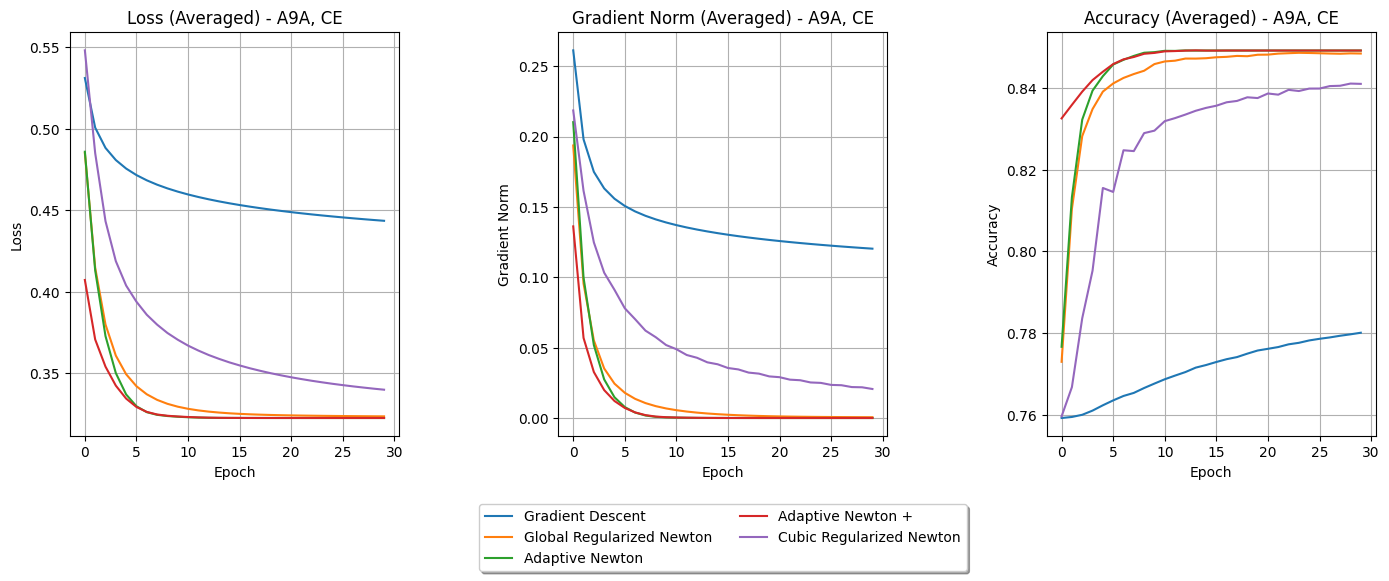

Average execution time(s): [0.76568969 1.22799778 1.93920263 1.886729   1.38458006]
Average test accuracy(ies): [0.78291669 0.85054153 0.84994779 0.84994779 0.84405135]


In [10]:
print(all_execution_times)
print(len(all_gradient_norms))
generate_plots("A9A", "CE", methods)
print(f"Average execution time(s): {np.mean(np.array(all_execution_times), axis=1)}")
print(f"Average test accuracy(ies): {np.mean(np.array(all_test_accuracies), axis=1)}")

In [ ]:
epochs = 30
methods = ["gd", "grn", "newton", "adanp", "crn"] # adan plus
all_execution_times, all_test_accuracies, all_gradient_norms, all_training_losses, all_training_accuracies = perform_runs("ncce", methods, "a9a", epochs=epochs, initial_w=None)

number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:  13%|█▎        | 4/30 [00:00<00:00, 34.71it/s]

weights min: -0.46986966794578766, max: 0.2705116852104901
weights min: -0.44995479610867195, max: 0.2702630416185443
weights min: -0.44552260953987377, max: 0.27009076091228656
weights min: -0.44452248016305984, max: 0.26996012176453693
weights min: -0.44462597695382106, max: 0.26985516243998486
weights min: -0.445148010030326, max: 0.26976753297162936
weights min: -0.4458357453643532, max: 0.26969236177910405


Training Epochs:  27%|██▋       | 8/30 [00:00<00:00, 36.09it/s]

weights min: -0.4465826418208299, max: 0.2696265692088977


Training Epochs:  40%|████      | 12/30 [00:00<00:00, 36.80it/s]

weights min: -0.4473401953356144, max: 0.26956808785102016
weights min: -0.4480855230161859, max: 0.2695154639578895
weights min: -0.44880791780740004, max: 0.2694676369936599
weights min: -0.44950275389788835, max: 0.26942380982900715
weights min: -0.4501685343848391, max: 0.2693833683301247
weights min: -0.4508053878496113, max: 0.2693458294138292
weights min: -0.45141427404160045, max: 0.2693108062901211


Training Epochs:  53%|█████▎    | 16/30 [00:00<00:00, 36.95it/s]

weights min: -0.45199655342916306, max: 0.26927798449853474


Training Epochs:  67%|██████▋   | 20/30 [00:00<00:00, 37.11it/s]

weights min: -0.45255375061737707, max: 0.26924710495486043
weights min: -0.45308742414101516, max: 0.2692179516853421
weights min: -0.45359909592930453, max: 0.269190342775775
weights min: -0.45409021474910216, max: 0.2691641235754304
weights min: -0.45456213913967397, max: 0.2691391615141628
weights min: -0.4550161315097423, max: 0.26911534209431065
weights min: -0.45545335853695756, max: 0.26909256575189444


Training Epochs:  80%|████████  | 24/30 [00:00<00:00, 37.11it/s]

weights min: -0.4558748950067216, max: 0.2690707453704017


Training Epochs: 100%|██████████| 30/30 [00:00<00:00, 36.77it/s]

weights min: -0.45628172939677947, max: 0.2690498042909339
weights min: -0.45667477020860436, max: 0.26902967470442773
weights min: -0.45705485246348887, max: 0.2690102963412166
weights min: -0.4574227440331281, max: 0.268991615394331
weights min: -0.4577791516270042, max: 0.268973583628256
weights min: -0.4581247263509534, max: 0.26895615763610736


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:  13%|█▎        | 4/30 [00:00<00:00, 39.19it/s]

weights min: -0.36422521012230585, max: 0.20327580749173804
weights min: -0.33454640790339846, max: 0.20417369135926572
weights min: -0.3264237937389337, max: 0.20445194370538053
weights min: -0.32379565328338683, max: 0.20456193912808776
weights min: -0.32310227859725293, max: 0.20460804604948143
weights min: -0.3232203713770629, max: 0.20462489564225023
weights min: -0.3237112055500263, max: 0.20462676243893038
weights min: -0.32437867354934835, max: 0.20462041032586775
weights min: -0.3251269415427916, max: 0.2046093664505169


Training Epochs:  43%|████▎     | 13/30 [00:00<00:00, 38.84it/s]

weights min: -0.3259063326584989, max: 0.20459560105799535
weights min: -0.3266901510275683, max: 0.20764269931267643
weights min: -0.32746383049664585, max: 0.21258349933399662
weights min: -0.3282194918361616, max: 0.2170612538513799
weights min: -0.3289530606847111, max: 0.2211510078866238
weights min: -0.32966267412858424, max: 0.22491125505987894


Training Epochs:  57%|█████▋    | 17/30 [00:00<00:00, 38.88it/s]

weights min: -0.3303477688492324, max: 0.2283884280309663
weights min: -0.3310085448861023, max: 0.23161997089152733


Training Epochs:  70%|███████   | 21/30 [00:00<00:00, 38.49it/s]

weights min: -0.33164564360685106, max: 0.23463649709587694
weights min: -0.33225995137236514, max: 0.23746334003912783
weights min: -0.33285247872842955, max: 0.24012168973970408
weights min: -0.3334242858722281, max: 0.24262944099807068
weights min: -0.3339764369172754, max: 0.24500183634143574
weights min: -0.33450997229496576, max: 0.24725196036167596


Training Epochs:  83%|████████▎ | 25/30 [00:00<00:00, 38.74it/s]

weights min: -0.3350258926710931, max: 0.24939112468550664
weights min: -0.33552515020240603, max: 0.25142917127023445


Training Epochs: 100%|██████████| 30/30 [00:00<00:00, 38.78it/s]

weights min: -0.336008644467883, max: 0.2533747138909475
weights min: -0.3364772213562104, max: 0.2552353322827874
weights min: -0.3369316737932763, max: 0.2570177296124532
weights min: -0.33737274358142333, max: 0.2587278612550125
weights min: -0.3378011238746664, max: 0.2603710409046475


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:  17%|█▋        | 5/30 [00:00<00:00, 40.53it/s]

weights min: -0.33099478246039776, max: 0.171194050652383
weights min: -0.3235586858334753, max: 0.17055536131649626
weights min: -0.3203419401639408, max: 0.1695274146636677
weights min: -0.31840642813064307, max: 0.1685916316869388
weights min: -0.31704911577663436, max: 0.16777730691716908
weights min: -0.3191770872540435, max: 0.16706646342820208
weights min: -0.3245665430556705, max: 0.1664391667156783
weights min: -0.32922058725260356, max: 0.16587930725770828
weights min: -0.3333061592499777, max: 0.16537452542138487


Training Epochs:  47%|████▋     | 14/30 [00:00<00:00, 39.81it/s]

weights min: -0.33694034597655825, max: 0.16491536360618936
weights min: -0.34020816140635846, max: 0.16449450693121523
weights min: -0.34317313532141014, max: 0.16410621642952455
weights min: -0.3458839063112335, max: 0.16374592315205133
weights min: -0.3483784871339393, max: 0.16340993877218452
weights min: -0.3506871167820159, max: 0.16309524753361052
weights min: -0.3528342228239101, max: 0.1627993547451734
weights min: -0.3548398056472043, max: 0.16252017487715176
weights min: -0.3567204365149002, max: 0.16460431164463066


Training Epochs:  73%|███████▎  | 22/30 [00:00<00:00, 39.64it/s]

weights min: -0.3584899912387231, max: 0.16683323466006705
weights min: -0.36016019887398887, max: 0.1689275424659552
weights min: -0.3617410584512275, max: 0.17090155804022317
weights min: -0.3632411599067881, max: 0.17276748432765626
weights min: -0.3646679343596532, max: 0.1745357983606678
weights min: -0.36602785153002976, max: 0.17621555845416884
weights min: -0.36732657709447303, max: 0.1778146464128701
weights min: -0.3685690993111652, max: 0.17933996050913226
weights min: -0.3697598318152079, max: 0.1807975707178805


Training Epochs: 100%|██████████| 30/30 [00:00<00:00, 39.50it/s]

weights min: -0.3709026977473583, max: 0.18219284469468192
weights min: -0.3720011991240215, max: 0.1835305508442165
weights min: -0.3730584744370568, max: 0.18481494328083653


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:  10%|█         | 3/30 [00:00<00:01, 23.62it/s]

weights min: -0.27325836444917095, max: 0.30857940913745985
weights min: -0.3670680118362329, max: 0.47924844319099325
weights min: -0.4523649059836973, max: 0.6188900684532272
weights min: -0.5950636934851157, max: 0.7289570759569415
weights min: -0.715750493315742, max: 0.8161702753002865


Training Epochs:  30%|███       | 9/30 [00:00<00:00, 23.89it/s]

weights min: -0.8138571368471068, max: 0.8864108046836832
weights min: -0.8914540508446885, max: 0.9445123292184513
weights min: -0.9521675046149927, max: 0.9939579780876301
weights min: -1.0000435424975203, max: 1.0370035750428923
weights min: -1.0388744681629405, max: 1.0750666037161314


Training Epochs:  40%|████      | 12/30 [00:00<00:00, 23.76it/s]

weights min: -1.0718553032978042, max: 1.109094007086711
weights min: -1.1014506752953317, max: 1.139803293489633
weights min: -1.1294123091453823, max: 1.1678059042332698
weights min: -1.1568857628823073, max: 1.19365268490264


Training Epochs:  50%|█████     | 15/30 [00:00<00:00, 24.01it/s]

weights min: -1.204107015183652, max: 1.217837115629795


Training Epochs:  60%|██████    | 18/30 [00:00<00:00, 23.91it/s]

weights min: -1.2480669926936185, max: 1.2407810585892558
weights min: -1.287793854741963, max: 1.2628190801048063
weights min: -1.323620668378327, max: 1.2841908981842907
weights min: -1.3559235109292165, max: 1.3050456931744443
weights min: -1.3850999087120681, max: 1.32545680777655


Training Epochs:  80%|████████  | 24/30 [00:01<00:00, 23.63it/s]

weights min: -1.411544719670922, max: 1.3454419684026835
weights min: -1.4356282444792088, max: 1.3649835528580585
weights min: -1.4576801607659604, max: 1.3840451238234135
weights min: -1.4779806597524545, max: 1.4025828770806739
weights min: -1.496758157714577, max: 1.420552467745113


Training Epochs:  90%|█████████ | 27/30 [00:01<00:00, 23.67it/s]

weights min: -1.5141918565855403, max: 1.4379124605384204
weights min: -1.5304172277256414, max: 1.4546256755723834
weights min: -1.5455328202927359, max: 1.4706593976691522
weights min: -1.5596072884108778, max: 1.4859850723849295


Training Epochs: 100%|██████████| 30/30 [00:01<00:00, 23.71it/s]

weights min: -1.576545386941613, max: 1.5005778424915635


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

weights min: -0.2844162597634191, max: 0.27827920762790215


Training Epochs:  10%|█         | 3/30 [00:00<00:01, 23.51it/s]

weights min: -0.3817595163187275, max: 0.4552094649353649
weights min: -0.5314913218252637, max: 0.6054218425838654
weights min: -0.6635905599223937, max: 0.7246693342541682
weights min: -0.7757374857387987, max: 0.8189939698891949


Training Epochs:  20%|██        | 6/30 [00:00<00:01, 23.73it/s]

weights min: -0.8672504621402977, max: 0.8943810120909077


Training Epochs:  30%|███       | 9/30 [00:00<00:00, 23.93it/s]

weights min: -0.9400266313666447, max: 0.9560538936256826
weights min: -0.9974731658470178, max: 1.0079327048218922
weights min: -1.0433452055030294, max: 1.0526183663571353
weights min: -1.0810981683560963, max: 1.091755248006962
weights min: -1.1135952747173294, max: 1.1264228167449635


Training Epochs:  40%|████      | 12/30 [00:00<00:00, 23.29it/s]

weights min: -1.1430130196242378, max: 1.1574115152204922
weights min: -1.1708728748250732, max: 1.1853757300054784
weights min: -1.1981457842613994, max: 1.2108981726815824


Training Epochs:  50%|█████     | 15/30 [00:00<00:00, 23.56it/s]

weights min: -1.2253808021055281, max: 1.2345024473653223
weights min: -1.2528246487895145, max: 1.2566426526734806


Training Epochs:  60%|██████    | 18/30 [00:00<00:00, 23.24it/s]

weights min: -1.2805178701513593, max: 1.2776894090857267
weights min: -1.3083667660900136, max: 1.2979228963887361
weights min: -1.3361961768246926, max: 1.3175362084128899
weights min: -1.3637887093347334, max: 1.336647351764429


Training Epochs:  70%|███████   | 21/30 [00:00<00:00, 23.35it/s]

weights min: -1.3909141357797103, max: 1.3553158749765355


Training Epochs:  80%|████████  | 24/30 [00:01<00:00, 23.49it/s]

weights min: -1.417350812141447, max: 1.3735600303305944
weights min: -1.4429000510752552, max: 1.3913716199768695
weights min: -1.467394344855426, max: 1.4087272653767828
weights min: -1.4907006208297036, max: 1.4255960878233256
weights min: -1.5127198853265549, max: 1.4419444635137924


Training Epochs:  90%|█████████ | 27/30 [00:01<00:00, 23.47it/s]

weights min: -1.533384543276118, max: 1.4577387060589373
weights min: -1.5526544458540812, max: 1.4729464369559695
weights min: -1.5705124373276103, max: 1.4875372092097472


Training Epochs: 100%|██████████| 30/30 [00:01<00:00, 23.50it/s]

weights min: -1.5869599237830532, max: 1.5014827553731331


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

weights min: -0.3114573308200767, max: 0.35929802170495284


Training Epochs:  10%|█         | 3/30 [00:00<00:01, 22.98it/s]

weights min: -0.40752238274006053, max: 0.5180906151662925
weights min: -0.5641515980238018, max: 0.6542157918533253
weights min: -0.7066032308838476, max: 0.7610899157620421
weights min: -0.8268961345452154, max: 0.8449749995489071


Training Epochs:  20%|██        | 6/30 [00:00<00:01, 23.55it/s]

weights min: -0.9244155854200898, max: 0.9122342105568783


Training Epochs:  30%|███       | 9/30 [00:00<00:00, 23.71it/s]

weights min: -1.001369646744658, max: 0.9679671081682024
weights min: -1.061548351380575, max: 1.0156585690093216
weights min: -1.1090919197820008, max: 1.0574360556345554
weights min: -1.1477980906047638, max: 1.0945667670325687
weights min: -1.1807902543898396, max: 1.1278753094423357


Training Epochs:  40%|████      | 12/30 [00:00<00:00, 23.73it/s]

weights min: -1.2104070120916148, max: 1.157994362201064
weights min: -1.2382461677005645, max: 1.1854798997875675
weights min: -1.2652962572752815, max: 1.2108456820017894


Training Epochs:  50%|█████     | 15/30 [00:00<00:00, 23.29it/s]

weights min: -1.292091954674421, max: 1.2345591216282368
weights min: -1.318853234332224, max: 1.2570243098846035


Training Epochs:  60%|██████    | 18/30 [00:00<00:00, 23.46it/s]

weights min: -1.3455939187457024, max: 1.2785666366341681
weights min: -1.3726389011835554, max: 1.2994260163376372
weights min: -1.4003957220674987, max: 1.3197603694226074
weights min: -1.4256600283816887, max: 1.3396573105854481


Training Epochs:  70%|███████   | 21/30 [00:00<00:00, 23.63it/s]

weights min: -1.449288912564843, max: 1.3591501797470749


Training Epochs:  80%|████████  | 24/30 [00:01<00:00, 23.58it/s]

weights min: -1.47339625960465, max: 1.378234535309193
weights min: -1.4964223247279613, max: 1.3968823997609385
weights min: -1.5182435449310445, max: 1.4150530575052627
weights min: -1.538769745070168, max: 1.4327004035883277
weights min: -1.5579406163727954, max: 1.4497774875216443


Training Epochs:  90%|█████████ | 27/30 [00:01<00:00, 23.52it/s]

weights min: -1.5757211309173438, max: 1.4662390697202892
weights min: -1.5920968697613027, max: 1.4820429096281589
weights min: -1.6070697932288565, max: 1.4971503078295574


Training Epochs: 100%|██████████| 30/30 [00:01<00:00, 23.58it/s]

weights min: -1.6206546830744066, max: 1.5115262299490724


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

weights min: -0.6244461429098892, max: 0.508214999681222


Training Epochs:  10%|█         | 3/30 [00:00<00:01, 22.95it/s]

weights min: -1.4951934051119373, max: 0.9218160384476083
weights min: -1.6518150500965163, max: 1.4228035823856793
weights min: -1.6827959319364905, max: 1.5972254212319852
weights min: -1.6930836169931918, max: 1.6248798016126536


Training Epochs:  20%|██        | 6/30 [00:00<00:01, 23.46it/s]

weights min: -1.6932928860250964, max: 1.625280022626444


Training Epochs:  30%|███       | 9/30 [00:00<00:00, 23.21it/s]

weights min: -1.6932803772625211, max: 1.6252372510510098
weights min: -1.693280367532442, max: 1.6252372183585473
weights min: -1.69328036753244, max: 1.6252372183585369
weights min: -1.693280367532439, max: 1.6252372183585362
weights min: -1.6932803675324393, max: 1.6252372183585373


Training Epochs:  40%|████      | 12/30 [00:00<00:00, 23.14it/s]

weights min: -1.693280367532439, max: 1.6252372183585373
weights min: -1.6932803675324393, max: 1.6252372183585373
weights min: -1.6932803675324393, max: 1.625237218358537


Training Epochs:  50%|█████     | 15/30 [00:00<00:00, 23.48it/s]

weights min: -1.693280367532439, max: 1.6252372183585375
weights min: -1.6932803675324393, max: 1.625237218358537


Training Epochs:  60%|██████    | 18/30 [00:00<00:00, 23.26it/s]

weights min: -1.6932803675324395, max: 1.6252372183585382
weights min: -1.6932803675324393, max: 1.6252372183585366
weights min: -1.6932803675324393, max: 1.6252372183585375
weights min: -1.693280367532439, max: 1.6252372183585375


Training Epochs:  70%|███████   | 21/30 [00:00<00:00, 23.44it/s]

weights min: -1.69328036753244, max: 1.6252372183585375


Training Epochs:  80%|████████  | 24/30 [00:01<00:00, 23.54it/s]

weights min: -1.6932803675324395, max: 1.6252372183585373
weights min: -1.693280367532439, max: 1.6252372183585373
weights min: -1.6932803675324395, max: 1.6252372183585366
weights min: -1.6932803675324393, max: 1.6252372183585373
weights min: -1.693280367532439, max: 1.6252372183585369


Training Epochs:  90%|█████████ | 27/30 [00:01<00:00, 23.55it/s]

weights min: -1.6932803675324393, max: 1.6252372183585373
weights min: -1.6932803675324397, max: 1.6252372183585364
weights min: -1.69328036753244, max: 1.6252372183585373


Training Epochs: 100%|██████████| 30/30 [00:01<00:00, 23.44it/s]

weights min: -1.6932803675324397, max: 1.6252372183585373


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

weights min: -0.6221741400989211, max: 0.5476841981403943


Training Epochs:  10%|█         | 3/30 [00:00<00:01, 23.40it/s]

weights min: -1.5381743907159136, max: 0.9780022980820501
weights min: -1.6509774889426252, max: 1.4277125211267638
weights min: -1.6828861434814784, max: 1.5983169770531702
weights min: -1.6930769158655736, max: 1.6249003514051454


Training Epochs:  20%|██        | 6/30 [00:00<00:01, 22.97it/s]

weights min: -1.6932910336503257, max: 1.6252739578670214


Training Epochs:  30%|███       | 9/30 [00:00<00:00, 23.29it/s]

weights min: -1.6932803748724237, max: 1.6252372430110784
weights min: -1.6932803675324413, max: 1.6252372183585426
weights min: -1.6932803675324393, max: 1.6252372183585373
weights min: -1.6932803675324395, max: 1.625237218358537
weights min: -1.6932803675324397, max: 1.6252372183585373


Training Epochs:  40%|████      | 12/30 [00:00<00:00, 23.22it/s]

weights min: -1.693280367532439, max: 1.6252372183585373
weights min: -1.693280367532439, max: 1.6252372183585373
weights min: -1.6932803675324393, max: 1.6252372183585364


Training Epochs:  50%|█████     | 15/30 [00:00<00:00, 23.41it/s]

weights min: -1.693280367532439, max: 1.625237218358537
weights min: -1.69328036753244, max: 1.6252372183585375


Training Epochs:  60%|██████    | 18/30 [00:00<00:00, 23.17it/s]

weights min: -1.69328036753244, max: 1.6252372183585369
weights min: -1.6932803675324395, max: 1.6252372183585373
weights min: -1.6932803675324397, max: 1.625237218358537
weights min: -1.6932803675324393, max: 1.6252372183585375


Training Epochs:  70%|███████   | 21/30 [00:00<00:00, 23.42it/s]

weights min: -1.6932803675324393, max: 1.625237218358537


Training Epochs:  80%|████████  | 24/30 [00:01<00:00, 23.44it/s]

weights min: -1.6932803675324395, max: 1.6252372183585373
weights min: -1.6932803675324395, max: 1.6252372183585373
weights min: -1.6932803675324393, max: 1.6252372183585369
weights min: -1.6932803675324397, max: 1.625237218358537
weights min: -1.6932803675324393, max: 1.6252372183585375


Training Epochs:  90%|█████████ | 27/30 [00:01<00:00, 23.27it/s]

weights min: -1.6932803675324395, max: 1.6252372183585375
weights min: -1.69328036753244, max: 1.6252372183585373
weights min: -1.6932803675324393, max: 1.625237218358537


Training Epochs: 100%|██████████| 30/30 [00:01<00:00, 23.32it/s]

weights min: -1.6932803675324395, max: 1.6252372183585377


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

weights min: -0.6731443601512327, max: 0.6048177340548911


Training Epochs:  10%|█         | 3/30 [00:00<00:01, 23.68it/s]

weights min: -1.758481432580878, max: 0.989157989696812
weights min: -1.5218540986286064, max: 1.4512376400599165
weights min: -1.689068989212815, max: 1.6043721571940952
weights min: -1.6931769086785096, max: 1.6251369730229612


Training Epochs:  20%|██        | 6/30 [00:00<00:01, 23.49it/s]

weights min: -1.69328626689759, max: 1.6252574044410366


Training Epochs:  30%|███       | 9/30 [00:00<00:00, 23.49it/s]

weights min: -1.6932803695579137, max: 1.6252372251699985
weights min: -1.6932803675324395, max: 1.6252372183585373
weights min: -1.6932803675324395, max: 1.625237218358537
weights min: -1.6932803675324397, max: 1.6252372183585366
weights min: -1.6932803675324395, max: 1.6252372183585375


Training Epochs:  40%|████      | 12/30 [00:00<00:00, 23.20it/s]

weights min: -1.6932803675324393, max: 1.625237218358537
weights min: -1.6932803675324393, max: 1.6252372183585366
weights min: -1.6932803675324393, max: 1.625237218358537


Training Epochs:  50%|█████     | 15/30 [00:00<00:00, 23.35it/s]

weights min: -1.693280367532439, max: 1.6252372183585369
weights min: -1.6932803675324395, max: 1.6252372183585373


Training Epochs:  60%|██████    | 18/30 [00:00<00:00, 23.18it/s]

weights min: -1.6932803675324395, max: 1.625237218358537
weights min: -1.6932803675324397, max: 1.6252372183585377
weights min: -1.6932803675324393, max: 1.6252372183585373
weights min: -1.6932803675324393, max: 1.625237218358537


Training Epochs:  70%|███████   | 21/30 [00:00<00:00, 23.34it/s]

weights min: -1.6932803675324395, max: 1.625237218358537


Training Epochs:  80%|████████  | 24/30 [00:01<00:00, 22.67it/s]

weights min: -1.6932803675324395, max: 1.6252372183585373
weights min: -1.6932803675324395, max: 1.6252372183585373
weights min: -1.6932803675324397, max: 1.625237218358537
weights min: -1.6932803675324393, max: 1.6252372183585373
weights min: -1.6932803675324395, max: 1.625237218358537


Training Epochs:  90%|█████████ | 27/30 [00:01<00:00, 22.13it/s]

weights min: -1.693280367532439, max: 1.625237218358537
weights min: -1.693280367532439, max: 1.625237218358537
weights min: -1.6932803675324395, max: 1.6252372183585373


Training Epochs: 100%|██████████| 30/30 [00:01<00:00, 22.74it/s]

weights min: -1.6932803675324393, max: 1.6252372183585373


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   7%|▋         | 2/30 [00:00<00:01, 14.13it/s]

weights min: -0.46156042202315384, max: 0.3653761889900045
weights min: -0.6108338308459674, max: 0.5276389735966276
weights min: -0.7322651291204593, max: 0.6567309540276238


Training Epochs:  13%|█▎        | 4/30 [00:00<00:01, 14.43it/s]

weights min: -0.8584904729340834, max: 0.780164707769484
weights min: -0.9762487385295151, max: 0.8948251643425902
weights min: -1.079815397808913, max: 1.0044917664676363


Training Epochs:  20%|██        | 6/30 [00:00<00:01, 14.72it/s]

weights min: -1.1828321788044427, max: 1.113082405507365

Training Epochs:  27%|██▋       | 8/30 [00:00<00:01, 14.70it/s]


weights min: -1.3079617291879775, max: 1.2248108630420382
weights min: -1.463383877105805, max: 1.3528179669285456
weights min: -1.5986516545415426, max: 1.4840243575394425


Training Epochs:  47%|████▋     | 14/30 [00:00<00:01, 15.04it/s]

weights min: -1.6690914299103103, max: 1.5772427164897806
weights min: -1.690018803977922, max: 1.616241333809713
weights min: -1.6930912733141712, max: 1.6244918144627183
weights min: -1.693277109725106, max: 1.6252193495739526


Training Epochs:  53%|█████▎    | 16/30 [00:01<00:00, 15.07it/s]

weights min: -1.693280358057841, max: 1.625237150455709
weights min: -1.6932803675306047, max: 1.625237218342397
weights min: -1.6932803675324397, max: 1.6252372183585364
weights min: -1.693280367532439, max: 1.625237218358537


Training Epochs:  73%|███████▎  | 22/30 [00:01<00:00, 15.22it/s]

weights min: -1.693280367532439, max: 1.625237218358537
weights min: -1.693280367532439, max: 1.625237218358537
weights min: -1.693280367532439, max: 1.625237218358537
weights min: -1.693280367532439, max: 1.625237218358537


Training Epochs:  87%|████████▋ | 26/30 [00:01<00:00, 15.21it/s]

weights min: -1.693280367532439, max: 1.625237218358537
weights min: -1.693280367532439, max: 1.625237218358537
weights min: -1.693280367532439, max: 1.625237218358537
weights min: -1.693280367532439, max: 1.625237218358537


Training Epochs:  93%|█████████▎| 28/30 [00:01<00:00, 15.19it/s]

weights min: -1.693280367532439, max: 1.625237218358537
weights min: -1.693280367532439, max: 1.625237218358537
weights min: -1.693280367532439, max: 1.625237218358537


Training Epochs: 100%|██████████| 30/30 [00:02<00:00, 14.95it/s]


weights min: -1.693280367532439, max: 1.625237218358537
number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:  13%|█▎        | 4/30 [00:00<00:01, 15.18it/s]

weights min: -0.4931425670443124, max: 0.4266520213159578
weights min: -0.633823069505959, max: 0.524985380514064
weights min: -0.7506806075101427, max: 0.612219841729209
weights min: -0.8755870584067522, max: 0.700591805269011


Training Epochs:  20%|██        | 6/30 [00:00<00:01, 15.13it/s]

weights min: -0.9953593715736326, max: 0.8082152141744356
weights min: -1.100755574976528, max: 0.911780389286367
weights min: -1.1996287825792316, max: 1.015874000022733
weights min: -1.3143641022771235, max: 1.1295288627499152


Training Epochs:  40%|████      | 12/30 [00:00<00:01, 15.32it/s]

weights min: -1.4548376558072094, max: 1.268382342103505
weights min: -1.5853802184756935, max: 1.4251590006074006
weights min: -1.6614761154159547, max: 1.5477997045533232
weights min: -1.6877928640208506, max: 1.6064575004899009


Training Epochs:  47%|████▋     | 14/30 [00:00<00:01, 15.19it/s]

weights min: -1.6928218700495146, max: 1.6229094899089405
weights min: -1.6932671564730437, max: 1.6251378171434172
weights min: -1.693280283957179, max: 1.6252363279669746
weights min: -1.693280367479167, max: 1.6252372175899976


Training Epochs:  67%|██████▋   | 20/30 [00:01<00:00, 15.32it/s]

weights min: -1.6932803675324382, max: 1.6252372183585164
weights min: -1.69328036753244, max: 1.6252372183585364
weights min: -1.6932803675324395, max: 1.6252372183585364
weights min: -1.6932803675324395, max: 1.6252372183585364


Training Epochs:  73%|███████▎  | 22/30 [00:01<00:00, 15.28it/s]

weights min: -1.6932803675324395, max: 1.6252372183585364
weights min: -1.6932803675324395, max: 1.6252372183585364
weights min: -1.6932803675324395, max: 1.6252372183585364
weights min: -1.6932803675324395, max: 1.6252372183585364


Training Epochs:  93%|█████████▎| 28/30 [00:01<00:00, 15.34it/s]

weights min: -1.6932803675324395, max: 1.6252372183585364
weights min: -1.6932803675324395, max: 1.6252372183585364
weights min: -1.6932803675324395, max: 1.6252372183585364
weights min: -1.6932803675324395, max: 1.6252372183585364


Training Epochs: 100%|██████████| 30/30 [00:01<00:00, 15.25it/s]


weights min: -1.6932803675324395, max: 1.6252372183585364
weights min: nan, max: nan
number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:  13%|█▎        | 4/30 [00:00<00:01, 15.23it/s]

weights min: -0.3923962396708095, max: 0.3808008382640343
weights min: -0.5445904615333934, max: 0.5343183905357428
weights min: -0.669303578067262, max: 0.6625832301915634
weights min: -0.8005419998768767, max: 0.78598677295406


Training Epochs:  27%|██▋       | 8/30 [00:00<00:01, 14.98it/s]

weights min: -0.9239215311065997, max: 0.8992196600236838
weights min: -1.0308456812747084, max: 1.0053635605200157
weights min: -1.1322697192835187, max: 1.1089170362358594
weights min: -1.256922286202591, max: 1.218769739943599


Training Epochs:  33%|███▎      | 10/30 [00:00<00:01, 14.96it/s]

weights min: -1.4198904444172773, max: 1.3466389838156971
weights min: -1.5740073605299132, max: 1.4804326811245136
weights min: -1.659767656639432, max: 1.5750469130610711
weights min: -1.6879949086689148, max: 1.6151045073572454


Training Epochs:  47%|████▋     | 14/30 [00:00<00:01, 14.99it/s]

weights min: -1.6929065104473042, max: 1.624290396811885
weights min: -1.693272580627658, max: 1.6252117141041729
weights min: -1.6932803397348748, max: 1.6252371082689359
weights min: -1.6932803675253527, max: 1.6252372183271133


Training Epochs:  60%|██████    | 18/30 [00:01<00:00, 15.12it/s]

weights min: -1.6932803675324397, max: 1.6252372183585357
weights min: -1.6932803675324395, max: 1.6252372183585369
weights min: -1.6932803675324395, max: 1.6252372183585369
weights min: -1.6932803675324395, max: 1.6252372183585369


Training Epochs:  73%|███████▎  | 22/30 [00:01<00:00, 15.17it/s]

weights min: -1.6932803675324395, max: 1.6252372183585369
weights min: -1.6932803675324395, max: 1.6252372183585369
weights min: -1.6932803675324395, max: 1.6252372183585369
weights min: -1.6932803675324395, max: 1.6252372183585369


Training Epochs:  87%|████████▋ | 26/30 [00:01<00:00, 14.92it/s]

weights min: -1.6932803675324395, max: 1.6252372183585369
weights min: -1.6932803675324395, max: 1.6252372183585369
weights min: -1.6932803675324395, max: 1.6252372183585369


Training Epochs: 100%|██████████| 30/30 [00:02<00:00, 14.96it/s]

weights min: -1.6932803675324395, max: 1.6252372183585369
weights min: -1.6932803675324395, max: 1.6252372183585369
weights min: -1.6932803675324395, max: 1.6252372183585369


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:  10%|█         | 3/30 [00:00<00:01, 20.22it/s]

weights min: -0.3084015651276145, max: 0.19396593360116884
weights min: -0.313559407456199, max: 0.19306475929702088
weights min: -0.29221155227834494, max: 0.3050135584679674
weights min: -0.3743863216677608, max: 0.3772385372156649
weights min: -0.3883817173099084, max: 0.4621088106127808


Training Epochs:  20%|██        | 6/30 [00:00<00:01, 20.21it/s]

weights min: -0.45203735686719376, max: 0.4791298380500329
weights min: -0.46017788556161326, max: 0.5409659381422408
weights min: -0.5144315169600872, max: 0.5492901926937117
weights min: -0.5210748819420346, max: 0.5985345988176515


Training Epochs:  30%|███       | 9/30 [00:00<00:01, 20.51it/s]

weights min: -0.5682406148596224, max: 0.6019400192350141


Training Epochs:  40%|████      | 12/30 [00:00<00:00, 20.50it/s]

weights min: -0.5736020588122267, max: 0.6428091489682024
weights min: -0.6152579265759903, max: 0.6433189787688968
weights min: -0.6194669065990829, max: 0.6782812941888202
weights min: -0.6566839708204635, max: 0.6770366679377824


Training Epochs:  50%|█████     | 15/30 [00:00<00:00, 20.36it/s]

weights min: -0.6598731993121237, max: 0.707636290364873


Training Epochs:  60%|██████    | 18/30 [00:00<00:00, 20.52it/s]

weights min: -0.6934081161714584, max: 0.7053200834773089
weights min: -0.6957092754463076, max: 0.7325689246770182
weights min: -0.726122059288009, max: 0.7296067759923356
weights min: -0.7276580656313189, max: 0.7541957571283783
weights min: -0.7553814722778364, max: 0.7508597847326883


Training Epochs:  80%|████████  | 24/30 [00:01<00:00, 20.78it/s]

weights min: -0.7562624959328523, max: 0.7732789031507822
weights min: -0.7816431407080981, max: 0.7697455331702204
weights min: -0.7819656146360653, max: 0.7903546078022478
weights min: -0.8052888941227908, max: 0.7867388324590572
weights min: -0.8051361898892837, max: 0.8058104672820322


Training Epochs:  90%|█████████ | 27/30 [00:01<00:00, 20.58it/s]

weights min: -0.8266419053817399, max: 0.8021870684822272
weights min: -0.8260857417313711, max: 0.819933504981571
weights min: -0.8459783190017103, max: 0.8163506279208901
weights min: -0.8450803618968512, max: 0.8329410163890391


Training Epochs: 100%|██████████| 30/30 [00:01<00:00, 20.61it/s]

weights min: -0.8635358643649412, max: 0.8294290420221131


Training Epochs: 100%|██████████| 30/30 [00:01<00:00, 20.55it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

weights min: -0.3182023701898014, max: 0.2765890375577614


Training Epochs:   7%|▋         | 2/30 [00:00<00:01, 19.49it/s]

weights min: -0.3221240854155821, max: 0.2755716092640865
weights min: -0.3656417130149096, max: 0.27449479810852023
weights min: -0.40777498469748147, max: 0.27345826072314083
weights min: -0.42391760372538745, max: 0.36395769439010606


Training Epochs:  17%|█▋        | 5/30 [00:00<00:01, 20.15it/s]

weights min: -0.4452593993492806, max: 0.3866859192254526


Training Epochs:  27%|██▋       | 8/30 [00:00<00:01, 20.29it/s]

weights min: -0.45074762398753443, max: 0.45447068565628046
weights min: -0.4788695682676404, max: 0.46526477158111135
weights min: -0.502482604546122, max: 0.518404865547329
weights min: -0.527011744208594, max: 0.522868454550118
weights min: -0.5449263139850066, max: 0.5663422140288906


Training Epochs:  37%|███▋      | 11/30 [00:00<00:00, 20.27it/s]

weights min: -0.5641101246005255, max: 0.5671851002614295
weights min: -0.5780906008741543, max: 0.6039324473243134


Training Epochs:  47%|████▋     | 14/30 [00:00<00:00, 20.10it/s]

weights min: -0.5950954553439061, max: 0.6026438335663576
weights min: -0.604694414041594, max: 0.6344933348434714
weights min: -0.6371357840159032, max: 0.6319514624122784


Training Epochs:  57%|█████▋    | 17/30 [00:00<00:00, 19.93it/s]

weights min: -0.6413404323126141, max: 0.660090654265763
weights min: -0.6744015423502698, max: 0.6568341039074909
weights min: -0.6776156790708234, max: 0.6820651496068675


Training Epochs:  67%|██████▋   | 20/30 [00:00<00:00, 20.06it/s]

weights min: -0.7075834933895376, max: 0.6784308319314986
weights min: -0.7099619501213844, max: 0.701315834731985
weights min: -0.7372429311111379, max: 0.6975159446927826
weights min: -0.7389152337635372, max: 0.7184624439983206


Training Epochs:  77%|███████▋  | 23/30 [00:01<00:00, 20.15it/s]

weights min: -0.763843537145463, max: 0.7146301126446003


Training Epochs:  87%|████████▋ | 26/30 [00:01<00:00, 20.29it/s]

weights min: -0.7649177265561503, max: 0.7339429244428566
weights min: -0.787773614559736, max: 0.7301604339876296
weights min: -0.7883400643969004, max: 0.7480739822465792
weights min: -0.8093619947179826, max: 0.7443906817128276


Training Epochs:  97%|█████████▋| 29/30 [00:01<00:00, 20.34it/s]

weights min: -0.8094967463132283, max: 0.761089720072115


Training Epochs: 100%|██████████| 30/30 [00:01<00:00, 20.19it/s]


weights min: -0.8288896986952938, max: 0.757533601576828
number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

weights min: -0.2302853743236557, max: 0.32689975675238536


Training Epochs:   7%|▋         | 2/30 [00:00<00:01, 19.86it/s]

weights min: -0.25886949788034164, max: 0.3260054285618804
weights min: -0.33121379726783595, max: 0.32509766239034915
weights min: -0.39824477679131703, max: 0.3238600834668798


Training Epochs:  17%|█▋        | 5/30 [00:00<00:01, 19.75it/s]

weights min: -0.4384582800100455, max: 0.36584643207063644
weights min: -0.4789134224548845, max: 0.3755071473016268


Training Epochs:  23%|██▎       | 7/30 [00:00<00:01, 19.84it/s]

weights min: -0.5062436417235789, max: 0.42457440631256654
weights min: -0.5348722058826904, max: 0.4215812241807135
weights min: -0.554839762492629, max: 0.4734507642878417


Training Epochs:  33%|███▎      | 10/30 [00:00<00:00, 20.22it/s]

weights min: -0.5950925013929806, max: 0.47763700995207303
weights min: -0.6041099331980967, max: 0.5211808389840861


Training Epochs:  43%|████▎     | 13/30 [00:00<00:00, 20.42it/s]

weights min: -0.6510048787357945, max: 0.5221348783436532
weights min: -0.6584479916623038, max: 0.5591862372820208
weights min: -0.700091675480581, max: 0.558253594234948


Training Epochs:  53%|█████▎    | 16/30 [00:00<00:00, 20.54it/s]

weights min: -0.7061142763648011, max: 0.5906016681881333
weights min: -0.743436866878112, max: 0.5885478976358133


Training Epochs:  63%|██████▎   | 19/30 [00:00<00:00, 20.58it/s]

weights min: -0.7482035618915778, max: 0.6173349964824458
weights min: -0.7818841014230509, max: 0.6146219275090988
weights min: -0.7855558413269061, max: 0.6406094272825681
weights min: -0.8161133856021892, max: 0.6375257793984016
weights min: -0.8188391406605108, max: 0.6612424248572163


Training Epochs:  73%|███████▎  | 22/30 [00:01<00:00, 20.52it/s]

weights min: -0.8466861680125735, max: 0.6579721065634503
weights min: -0.8485992294542246, max: 0.6797995624904923
weights min: -0.8740735768938541, max: 0.6764603705371012


Training Epochs:  83%|████████▎ | 25/30 [00:01<00:00, 20.38it/s]

weights min: -0.8752908277996777, max: 0.6966840182954718
weights min: -0.8986753900089443, max: 0.6933509561124297


Training Epochs:  93%|█████████▎| 28/30 [00:01<00:00, 20.41it/s]

weights min: -0.8992982035346384, max: 0.7121909131975397
weights min: -0.9208335947186319, max: 0.7089108812147771
weights min: -0.9209494563881699, max: 0.7265415008595062


Training Epochs: 100%|██████████| 30/30 [00:01<00:00, 20.34it/s]

weights min: -0.9408425562822598, max: 0.7233428345142076


gd found
grn found
newton found
adanp found
crn found


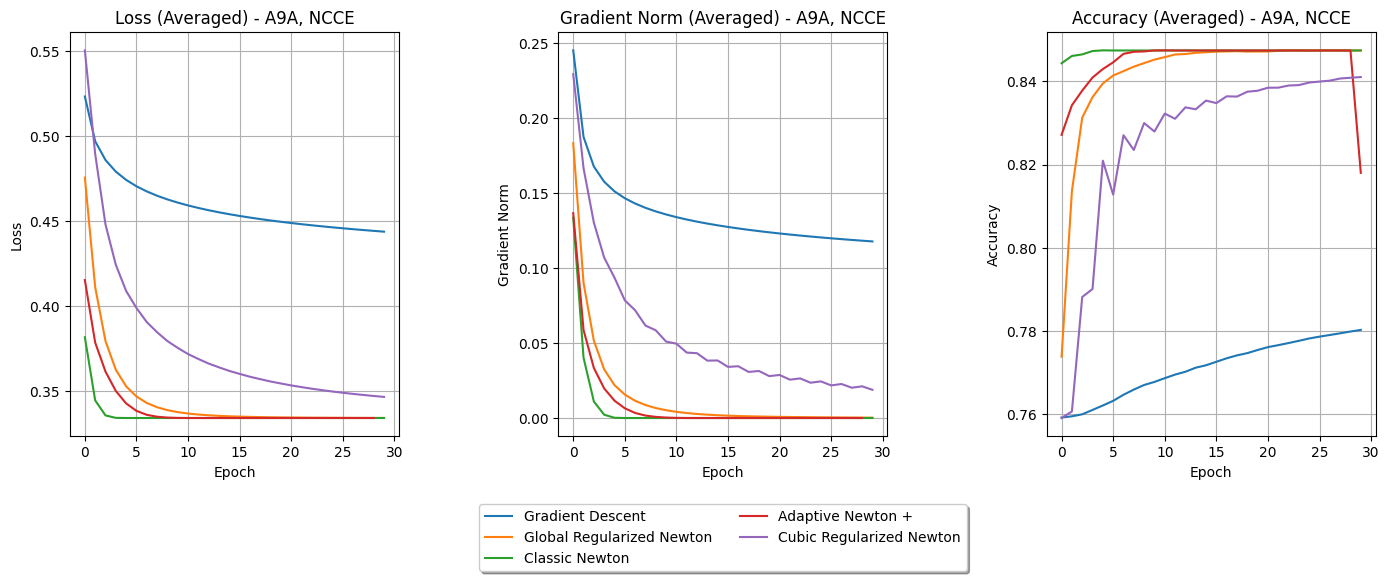

Average execution time(s): [0.7895395  1.27804756 1.30171601 2.03450656 1.48027492]
Average test accuracy(ies): [0.78240485 0.85144238 0.85129906 0.82212395 0.84413324]


In [11]:
generate_plots("A9A", "NCCE", methods)
print(f"Average execution time(s): {np.mean(np.array(all_execution_times), axis=1)}")
print(f"Average test accuracy(ies): {np.mean(np.array(all_test_accuracies), axis=1)}")

In [5]:
epochs = 30
methods = ["grn", "adan", "adanp", "crn"] # Dont need GD and Newton
all_execution_times, all_test_accuracies, all_gradient_norms, all_training_losses, all_training_accuracies = perform_runs("ce", methods, "covtype", epochs=epochs, initial_w=None)


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   3%|▎         | 1/30 [00:00<00:14,  2.07it/s]

weights min: -0.21996466544054594, max: 0.2794814972322714


Training Epochs:   7%|▋         | 2/30 [00:00<00:13,  2.14it/s]

weights min: -0.4361875119632076, max: 0.47876505884070375


Training Epochs:  10%|█         | 3/30 [00:01<00:12,  2.17it/s]

weights min: -0.6257247178523085, max: 0.6645083350093528


Training Epochs:  13%|█▎        | 4/30 [00:01<00:11,  2.20it/s]

weights min: -0.7939527841304848, max: 0.8346198066017602


Training Epochs:  17%|█▋        | 5/30 [00:02<00:11,  2.21it/s]

weights min: -0.9712234742869595, max: 0.9881017496739889


Training Epochs:  20%|██        | 6/30 [00:02<00:10,  2.22it/s]

weights min: -1.1747972351922478, max: 1.124950949186714


Training Epochs:  23%|██▎       | 7/30 [00:03<00:10,  2.22it/s]

weights min: -1.378530171429994, max: 1.2458727744580629


Training Epochs:  27%|██▋       | 8/30 [00:03<00:09,  2.21it/s]

weights min: -1.581757513926837, max: 1.3519778052503775


Training Epochs:  30%|███       | 9/30 [00:04<00:09,  2.19it/s]

weights min: -1.7840747149281515, max: 1.4445524008360593


Training Epochs:  33%|███▎      | 10/30 [00:04<00:09,  2.19it/s]

weights min: -1.9852286990437875, max: 1.5249150582440678


Training Epochs:  37%|███▋      | 11/30 [00:05<00:08,  2.19it/s]

weights min: -2.185044382692797, max: 1.5943379359104142


Training Epochs:  40%|████      | 12/30 [00:05<00:08,  2.20it/s]

weights min: -2.3833805997960726, max: 1.6540095187720925


Training Epochs:  43%|████▎     | 13/30 [00:05<00:07,  2.20it/s]

weights min: -2.5801068647285774, max: 1.7050205558936153


Training Epochs:  47%|████▋     | 14/30 [00:06<00:07,  2.21it/s]

weights min: -2.7750934510737073, max: 1.748362113948855


Training Epochs:  50%|█████     | 15/30 [00:06<00:06,  2.22it/s]

weights min: -2.9682091977311, max: 1.784929419596935


Training Epochs:  53%|█████▎    | 16/30 [00:07<00:06,  2.23it/s]

weights min: -3.159323230653072, max: 1.8155281359551279


Training Epochs:  57%|█████▋    | 17/30 [00:07<00:05,  2.21it/s]

weights min: -3.3483081744222445, max: 1.840881402847738


Training Epochs:  60%|██████    | 18/30 [00:08<00:05,  2.22it/s]

weights min: -3.535043441232498, max: 1.8616368709388016


Training Epochs:  63%|██████▎   | 19/30 [00:08<00:04,  2.23it/s]

weights min: -3.719417889020976, max: 1.8783734129610294


Training Epochs:  67%|██████▋   | 20/30 [00:09<00:04,  2.23it/s]

weights min: -3.9013315967282542, max: 1.8916074058870527


Training Epochs:  70%|███████   | 21/30 [00:09<00:04,  2.22it/s]

weights min: -4.080696770487813, max: 1.901798565286629


Training Epochs:  73%|███████▎  | 22/30 [00:09<00:03,  2.22it/s]

weights min: -4.257437924653662, max: 1.9093553435192072


Training Epochs:  77%|███████▋  | 23/30 [00:10<00:03,  2.23it/s]

weights min: -4.4314915242689, max: 1.914639911028818


Training Epochs:  80%|████████  | 24/30 [00:10<00:02,  2.23it/s]

weights min: -4.602805268914713, max: 1.9179727406042404


Training Epochs:  83%|████████▎ | 25/30 [00:11<00:02,  2.22it/s]

weights min: -4.771337168383596, max: 1.9196368140953473


Training Epochs:  87%|████████▋ | 26/30 [00:11<00:01,  2.22it/s]

weights min: -4.937054524593272, max: 1.9198814713092318


Training Epochs:  90%|█████████ | 27/30 [00:12<00:01,  2.22it/s]

weights min: -5.099932900250676, max: 1.9189259215511139


Training Epochs:  93%|█████████▎| 28/30 [00:12<00:00,  2.25it/s]

weights min: -5.259955126670012, max: 1.9169624390605904


Training Epochs:  97%|█████████▋| 29/30 [00:13<00:00,  2.28it/s]

weights min: -5.417110381680525, max: 1.9141592640665763


Training Epochs: 100%|██████████| 30/30 [00:13<00:00,  2.22it/s]

weights min: -5.571393353163887, max: 1.9106632311893152


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   3%|▎         | 1/30 [00:00<00:12,  2.28it/s]

weights min: -0.33659071588035894, max: 0.28674288737890147


Training Epochs:   7%|▋         | 2/30 [00:00<00:12,  2.26it/s]

weights min: -0.5400540538930425, max: 0.3105111776605596


Training Epochs:  10%|█         | 3/30 [00:01<00:12,  2.24it/s]

weights min: -0.7224010885006052, max: 0.47214306895595676


Training Epochs:  13%|█▎        | 4/30 [00:01<00:11,  2.27it/s]

weights min: -0.8849372051884127, max: 0.6678106576399212


Training Epochs:  17%|█▋        | 5/30 [00:02<00:10,  2.28it/s]

weights min: -1.0310985074342245, max: 0.8432362954629864


Training Epochs:  20%|██        | 6/30 [00:02<00:10,  2.31it/s]

weights min: -1.1639650497981986, max: 0.9990737724975389


Training Epochs:  23%|██▎       | 7/30 [00:03<00:09,  2.32it/s]

weights min: -1.3512078603289965, max: 1.136563262134818


Training Epochs:  27%|██▋       | 8/30 [00:03<00:09,  2.32it/s]

weights min: -1.5530776570813487, max: 1.257221541344352


Training Epochs:  30%|███       | 9/30 [00:03<00:09,  2.32it/s]

weights min: -1.7543234889697688, max: 1.3626499779733745


Training Epochs:  33%|███▎      | 10/30 [00:04<00:08,  2.34it/s]

weights min: -1.954640745877337, max: 1.454417607662386


Training Epochs:  37%|███▋      | 11/30 [00:04<00:08,  2.35it/s]

weights min: -2.1538068419012864, max: 1.5339996882356088


Training Epochs:  40%|████      | 12/30 [00:05<00:07,  2.32it/s]

weights min: -2.351640765417046, max: 1.602751711485212


Training Epochs:  43%|████▎     | 13/30 [00:05<00:07,  2.35it/s]

weights min: -2.5479804746843246, max: 1.6619032962605502


Training Epochs:  47%|████▋     | 14/30 [00:06<00:06,  2.37it/s]

weights min: -2.7426722338961795, max: 1.7125620214081916


Training Epochs:  50%|█████     | 15/30 [00:06<00:06,  2.38it/s]

weights min: -2.9355671428382744, max: 1.7557215827178378


Training Epochs:  53%|█████▎    | 16/30 [00:06<00:05,  2.40it/s]

weights min: -3.126521467174939, max: 1.7922713776713861


Training Epochs:  57%|█████▋    | 17/30 [00:07<00:05,  2.40it/s]

weights min: -3.3153985578951826, max: 1.8230061513675266


Training Epochs:  60%|██████    | 18/30 [00:07<00:04,  2.41it/s]

weights min: -3.502071054884873, max: 1.8486351300421466


Training Epochs:  63%|██████▎   | 19/30 [00:08<00:04,  2.41it/s]

weights min: -3.6864227060949286, max: 1.86979044874946


Training Epochs:  67%|██████▋   | 20/30 [00:08<00:04,  2.42it/s]

weights min: -3.8683495436755884, max: 1.8870348452174066


Training Epochs:  70%|███████   | 21/30 [00:08<00:03,  2.44it/s]

weights min: -4.0477603959418325, max: 1.90086865418549


Training Epochs:  73%|███████▎  | 22/30 [00:09<00:03,  2.44it/s]

weights min: -4.224576831782021, max: 1.9117361541370121


Training Epochs:  77%|███████▋  | 23/30 [00:09<00:02,  2.43it/s]

weights min: -4.398732676492783, max: 1.9200313194075223


Training Epochs:  80%|████████  | 24/30 [00:10<00:02,  2.44it/s]

weights min: -4.5701732382144025, max: 1.9261030272186628


Training Epochs:  83%|████████▎ | 25/30 [00:10<00:02,  2.44it/s]

weights min: -4.738854364408526, max: 1.9302597654739957


Training Epochs:  87%|████████▋ | 26/30 [00:10<00:01,  2.45it/s]

weights min: -4.904741421539357, max: 1.9327738840897757


Training Epochs:  90%|█████████ | 27/30 [00:11<00:01,  2.45it/s]

weights min: -5.06780826540272, max: 1.9338854300568833


Training Epochs:  93%|█████████▎| 28/30 [00:11<00:00,  2.46it/s]

weights min: -5.228036247556026, max: 1.9338056040063207


Training Epochs:  97%|█████████▋| 29/30 [00:12<00:00,  2.47it/s]

weights min: -5.385413285964344, max: 1.9327198735653204


Training Epochs: 100%|██████████| 30/30 [00:12<00:00,  2.39it/s]

weights min: -5.539933015097951, max: 1.9307907761792171


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   3%|▎         | 1/30 [00:00<00:11,  2.45it/s]

weights min: -0.27166876340603097, max: 0.18385601637571225


Training Epochs:   7%|▋         | 2/30 [00:00<00:11,  2.45it/s]

weights min: -0.44100846167055396, max: 0.31709225295312937


Training Epochs:  10%|█         | 3/30 [00:01<00:11,  2.45it/s]

weights min: -0.6215673669722267, max: 0.5138167604937949


Training Epochs:  13%|█▎        | 4/30 [00:01<00:10,  2.42it/s]

weights min: -0.809551809910743, max: 0.6974815253200013


Training Epochs:  17%|█▋        | 5/30 [00:02<00:10,  2.43it/s]

weights min: -1.002115141766579, max: 0.863568218119438


Training Epochs:  20%|██        | 6/30 [00:02<00:09,  2.44it/s]

weights min: -1.1973300484671294, max: 1.0121895101881722


Training Epochs:  23%|██▎       | 7/30 [00:02<00:09,  2.45it/s]

weights min: -1.3939202659724528, max: 1.1441156942157007


Training Epochs:  27%|██▋       | 8/30 [00:03<00:08,  2.46it/s]

weights min: -1.5910465981323734, max: 1.2604785948055643


Training Epochs:  30%|███       | 9/30 [00:03<00:08,  2.46it/s]

weights min: -1.7881518206468487, max: 1.3625705837733153


Training Epochs:  33%|███▎      | 10/30 [00:04<00:08,  2.45it/s]

weights min: -1.984849430315866, max: 1.4517165616535497


Training Epochs:  37%|███▋      | 11/30 [00:04<00:07,  2.45it/s]

weights min: -2.1808493972233665, max: 1.529201802965373


Training Epochs:  40%|████      | 12/30 [00:04<00:07,  2.45it/s]

weights min: -2.375912699346841, max: 1.5962361896807171


Training Epochs:  43%|████▎     | 13/30 [00:05<00:06,  2.45it/s]

weights min: -2.5698261953126758, max: 1.6539395415044704


Training Epochs:  47%|████▋     | 14/30 [00:05<00:06,  2.45it/s]

weights min: -2.7623907178024893, max: 1.7033381644672774


Training Epochs:  50%|█████     | 15/30 [00:06<00:06,  2.45it/s]

weights min: -2.9534170147260763, max: 1.7453669075418725


Training Epochs:  53%|█████▎    | 16/30 [00:06<00:05,  2.46it/s]

weights min: -3.142725779430477, max: 1.780873682902214


Training Epochs:  57%|█████▋    | 17/30 [00:06<00:05,  2.47it/s]

weights min: -3.330149336268621, max: 1.8106249443529607


Training Epochs:  60%|██████    | 18/30 [00:07<00:04,  2.46it/s]

weights min: -3.515533560068035, max: 1.8353114358474811


Training Epochs:  63%|██████▎   | 19/30 [00:07<00:04,  2.45it/s]

weights min: -3.6987393249691523, max: 1.8555539181488723


Training Epochs:  67%|██████▋   | 20/30 [00:08<00:04,  2.43it/s]

weights min: -3.8796432391770423, max: 1.8719087526544753


Training Epochs:  70%|███████   | 21/30 [00:08<00:03,  2.40it/s]

weights min: -4.058137682399516, max: 1.8848732849691496


Training Epochs:  73%|███████▎  | 22/30 [00:09<00:03,  2.41it/s]

weights min: -4.234130282307917, max: 1.8948909911395029


Training Epochs:  77%|███████▋  | 23/30 [00:09<00:02,  2.40it/s]

weights min: -4.407542999326292, max: 1.9023563570190631


Training Epochs:  80%|████████  | 24/30 [00:09<00:02,  2.42it/s]

weights min: -4.578310976553433, max: 1.9076194676227105


Training Epochs:  83%|████████▎ | 25/30 [00:10<00:02,  2.43it/s]

weights min: -4.746381280613214, max: 1.9109902911551724


Training Epochs:  87%|████████▋ | 26/30 [00:10<00:01,  2.43it/s]

weights min: -4.911711624948901, max: 1.912742650965421


Training Epochs:  90%|█████████ | 27/30 [00:11<00:01,  2.44it/s]

weights min: -5.074269136720732, max: 1.9131178867053977


Training Epochs:  93%|█████████▎| 28/30 [00:11<00:00,  2.44it/s]

weights min: -5.234029204471807, max: 1.9123282125742445


Training Epochs:  97%|█████████▋| 29/30 [00:11<00:00,  2.45it/s]

weights min: -5.390974426127811, max: 1.9105597853719911


Training Epochs: 100%|██████████| 30/30 [00:12<00:00,  2.44it/s]

weights min: -5.5450936647342015, max: 1.9079754982329644


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   3%|▎         | 1/30 [00:00<00:18,  1.53it/s]

weights min: -0.23716512168970977, max: 0.28134054593976515


Training Epochs:   7%|▋         | 2/30 [00:01<00:18,  1.53it/s]

weights min: -0.3823144529353947, max: 0.39232549361703706


Training Epochs:  10%|█         | 3/30 [00:01<00:17,  1.52it/s]

weights min: -0.6261040840188684, max: 0.5546949746928215


Training Epochs:  13%|█▎        | 4/30 [00:02<00:17,  1.51it/s]

weights min: -0.903047815800358, max: 0.8535318560225201


Training Epochs:  17%|█▋        | 5/30 [00:03<00:16,  1.51it/s]

weights min: -1.3726229138099666, max: 1.1626930652514242


Training Epochs:  20%|██        | 6/30 [00:03<00:16,  1.50it/s]

weights min: -2.0667445517624707, max: 1.445191828401229


Training Epochs:  23%|██▎       | 7/30 [00:04<00:15,  1.51it/s]

weights min: -2.9961377234080135, max: 1.6648496494272558


Training Epochs:  27%|██▋       | 8/30 [00:05<00:14,  1.51it/s]

weights min: -4.195988074489998, max: 1.795091606674587


Training Epochs:  30%|███       | 9/30 [00:05<00:13,  1.51it/s]

weights min: -5.6392427431887056, max: 1.8325392849825262


Training Epochs:  33%|███▎      | 10/30 [00:06<00:13,  1.51it/s]

weights min: -7.208795328047117, max: 1.9580312519346492


Training Epochs:  37%|███▋      | 11/30 [00:07<00:12,  1.51it/s]

weights min: -8.704402640127189, max: 2.656216580727931


Training Epochs:  40%|████      | 12/30 [00:07<00:12,  1.50it/s]

weights min: -9.89295381482097, max: 3.490209718561304


Training Epochs:  43%|████▎     | 13/30 [00:08<00:11,  1.50it/s]

weights min: -10.62580437753963, max: 4.409080357908218


Training Epochs:  47%|████▋     | 14/30 [00:09<00:10,  1.51it/s]

weights min: -10.95234689740321, max: 5.248016486299291


Training Epochs:  50%|█████     | 15/30 [00:09<00:09,  1.51it/s]

weights min: -11.054895569863216, max: 5.806275505471892


Training Epochs:  53%|█████▎    | 16/30 [00:10<00:09,  1.51it/s]

weights min: -11.080294542270323, max: 6.0599618596952505


Training Epochs:  57%|█████▋    | 17/30 [00:11<00:08,  1.51it/s]

weights min: -11.087343222349727, max: 6.153059490932702


Training Epochs:  60%|██████    | 18/30 [00:11<00:07,  1.50it/s]

weights min: -11.090281784694684, max: 6.193979411808476


Training Epochs:  63%|██████▎   | 19/30 [00:12<00:07,  1.51it/s]

weights min: -11.09180452940237, max: 6.212544231622188


Training Epochs:  67%|██████▋   | 20/30 [00:13<00:06,  1.51it/s]

weights min: -11.092584315886917, max: 6.215776247841925


Training Epochs:  70%|███████   | 21/30 [00:13<00:05,  1.51it/s]

weights min: -11.092968942776134, max: 6.21258878084672


Training Epochs:  73%|███████▎  | 22/30 [00:14<00:05,  1.50it/s]

weights min: -11.093163092075061, max: 6.2094566074631325


Training Epochs:  77%|███████▋  | 23/30 [00:15<00:04,  1.50it/s]

weights min: -11.09326416555674, max: 6.565652077734487


Training Epochs:  80%|████████  | 24/30 [00:15<00:03,  1.50it/s]

weights min: -11.093317010258486, max: 7.27197130793095


Training Epochs:  83%|████████▎ | 25/30 [00:16<00:03,  1.51it/s]

weights min: -11.093344472707216, max: 7.983254152264304


Training Epochs:  87%|████████▋ | 26/30 [00:17<00:02,  1.51it/s]

weights min: -11.3085730302509, max: 8.698793732233248


Training Epochs:  90%|█████████ | 27/30 [00:17<00:01,  1.50it/s]

weights min: -11.921247872225152, max: 9.418080516041343


Training Epochs:  93%|█████████▎| 28/30 [00:18<00:01,  1.50it/s]

weights min: -12.533879458129984, max: 10.140717350075272


Training Epochs:  97%|█████████▋| 29/30 [00:19<00:00,  1.40it/s]

weights min: -13.073832251604657, max: 10.778006241226283


Training Epochs: 100%|██████████| 30/30 [00:20<00:00,  1.49it/s]

weights min: -13.634769953688409, max: 11.443051113074503


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   3%|▎         | 1/30 [00:00<00:19,  1.52it/s]

weights min: -0.2138884026569542, max: 0.22746077254241248


Training Epochs:   7%|▋         | 2/30 [00:01<00:18,  1.52it/s]

weights min: -0.4198236441451557, max: 0.3190088925156776


Training Epochs:  10%|█         | 3/30 [00:01<00:18,  1.50it/s]

weights min: -0.6829549972620601, max: 0.5758951032551598


Training Epochs:  13%|█▎        | 4/30 [00:02<00:17,  1.47it/s]

weights min: -1.0054475535565668, max: 0.8738919625886117


Training Epochs:  17%|█▋        | 5/30 [00:03<00:16,  1.48it/s]

weights min: -1.5070167235860072, max: 1.1841750937475144


Training Epochs:  20%|██        | 6/30 [00:04<00:16,  1.49it/s]

weights min: -2.1906092810376325, max: 1.4686797092340158


Training Epochs:  23%|██▎       | 7/30 [00:04<00:15,  1.50it/s]

weights min: -3.1062127025112547, max: 1.690446854209125


Training Epochs:  27%|██▋       | 8/30 [00:05<00:14,  1.51it/s]

weights min: -4.2871671223344565, max: 1.82306119160506


Training Epochs:  30%|███       | 9/30 [00:05<00:13,  1.51it/s]

weights min: -5.706332326529704, max: 1.8638164156479573


Training Epochs:  33%|███▎      | 10/30 [00:06<00:13,  1.51it/s]

weights min: -7.24738081304581, max: 2.0178099097045052


Training Epochs:  37%|███▋      | 11/30 [00:07<00:12,  1.50it/s]

weights min: -8.711085220969185, max: 2.7248307687963793


Training Epochs:  40%|████      | 12/30 [00:08<00:12,  1.47it/s]

weights min: -9.86769305189378, max: 3.5707702749876944


Training Epochs:  43%|████▎     | 13/30 [00:08<00:11,  1.48it/s]

weights min: -10.576215376175846, max: 4.502408686563001


Training Epochs:  47%|████▋     | 14/30 [00:09<00:10,  1.47it/s]

weights min: -10.891081723229773, max: 5.353921899818138


Training Epochs:  50%|█████     | 15/30 [00:10<00:10,  1.47it/s]

weights min: -10.990415885033496, max: 5.927457089520023


Training Epochs:  53%|█████▎    | 16/30 [00:10<00:09,  1.47it/s]

weights min: -11.015260584025153, max: 6.201336459143875


Training Epochs:  57%|█████▋    | 17/30 [00:11<00:08,  1.46it/s]

weights min: -11.02219771080402, max: 6.320985995932631


Training Epochs:  60%|██████    | 18/30 [00:12<00:08,  1.46it/s]

weights min: -11.025144491493107, max: 6.394830652196447


Training Epochs:  63%|██████▎   | 19/30 [00:12<00:07,  1.46it/s]

weights min: -11.026738915740099, max: 6.444960762259503


Training Epochs:  67%|██████▋   | 20/30 [00:13<00:06,  1.47it/s]

weights min: -11.027587971175283, max: 6.4680655098708515


Training Epochs:  70%|███████   | 21/30 [00:14<00:06,  1.47it/s]

weights min: -11.028004045335711, max: 6.472120817375994


Training Epochs:  73%|███████▎  | 22/30 [00:14<00:05,  1.48it/s]

weights min: -11.028205744277303, max: 6.470256223129759


Training Epochs:  77%|███████▋  | 23/30 [00:15<00:04,  1.48it/s]

weights min: -11.028308033401085, max: 6.6174407553987455


Training Epochs:  80%|████████  | 24/30 [00:16<00:04,  1.49it/s]

weights min: -11.028361141913312, max: 7.324635794188899


Training Epochs:  83%|████████▎ | 25/30 [00:16<00:03,  1.50it/s]

weights min: -11.028388706678472, max: 8.036586677652718


Training Epochs:  87%|████████▋ | 26/30 [00:17<00:02,  1.50it/s]

weights min: -11.283498121638223, max: 8.752642492528123


Training Epochs:  90%|█████████ | 27/30 [00:18<00:01,  1.51it/s]

weights min: -11.896166182550063, max: 9.472334314910093


Training Epochs:  93%|█████████▎| 28/30 [00:18<00:01,  1.51it/s]

weights min: -12.508802337327623, max: 10.195293875296393


Training Epochs:  97%|█████████▋| 29/30 [00:19<00:00,  1.42it/s]

weights min: -13.048771389932906, max: 10.832868449821516


Training Epochs: 100%|██████████| 30/30 [00:20<00:00,  1.48it/s]

weights min: -13.609742303557086, max: 11.49814951484501


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   3%|▎         | 1/30 [00:00<00:18,  1.54it/s]

weights min: -0.21336264411322733, max: 0.21553707505092462


Training Epochs:   7%|▋         | 2/30 [00:01<00:18,  1.51it/s]

weights min: -0.3459276410335386, max: 0.32855403382674475


Training Epochs:  10%|█         | 3/30 [00:01<00:17,  1.51it/s]

weights min: -0.609637792820348, max: 0.5901554845225456


Training Epochs:  13%|█▎        | 4/30 [00:02<00:17,  1.52it/s]

weights min: -0.903833444745445, max: 0.8937513608734249


Training Epochs:  17%|█▋        | 5/30 [00:03<00:16,  1.52it/s]

weights min: -1.3180504836738276, max: 1.2085303190297139


Training Epochs:  20%|██        | 6/30 [00:03<00:15,  1.51it/s]

weights min: -2.017094648715155, max: 1.4949590411667162


Training Epochs:  23%|██▎       | 7/30 [00:04<00:15,  1.51it/s]

weights min: -2.9530625303247744, max: 1.7155522550911846


Training Epochs:  27%|██▋       | 8/30 [00:05<00:14,  1.52it/s]

weights min: -4.157724800511279, max: 1.8442627509173184


Training Epochs:  30%|███       | 9/30 [00:05<00:13,  1.52it/s]

weights min: -5.60211915108736, max: 1.8791434393456605


Training Epochs:  33%|███▎      | 10/30 [00:06<00:13,  1.52it/s]

weights min: -7.168700512498859, max: 1.8497112693186213


Training Epochs:  37%|███▋      | 11/30 [00:07<00:12,  1.51it/s]

weights min: -8.658172640928877, max: 2.505330063991117


Training Epochs:  40%|████      | 12/30 [00:07<00:11,  1.50it/s]

weights min: -9.840895187041403, max: 3.3668500341483627


Training Epochs:  43%|████▎     | 13/30 [00:08<00:11,  1.51it/s]

weights min: -10.572729540293059, max: 4.320808255278324


Training Epochs:  47%|████▋     | 14/30 [00:09<00:10,  1.51it/s]

weights min: -10.901700182834595, max: 5.2025129827031416


Training Epochs:  50%|█████     | 15/30 [00:09<00:09,  1.51it/s]

weights min: -11.006106629400218, max: 5.810222506397519


Training Epochs:  53%|█████▎    | 16/30 [00:10<00:09,  1.51it/s]

weights min: -11.032307139794234, max: 6.120504798289796


Training Epochs:  57%|█████▋    | 17/30 [00:11<00:08,  1.51it/s]

weights min: -11.039725617950317, max: 6.282672974797076


Training Epochs:  60%|██████    | 18/30 [00:11<00:07,  1.52it/s]

weights min: -11.043008405659247, max: 6.403880181336162


Training Epochs:  63%|██████▎   | 19/30 [00:12<00:07,  1.51it/s]

weights min: -11.044870943121147, max: 6.493905583458656


Training Epochs:  67%|██████▋   | 20/30 [00:13<00:06,  1.51it/s]

weights min: -11.045872767858018, max: 6.538942221678167


Training Epochs:  70%|███████   | 21/30 [00:13<00:05,  1.51it/s]

weights min: -11.046341833790992, max: 6.550318263758105


Training Epochs:  73%|███████▎  | 22/30 [00:14<00:05,  1.49it/s]

weights min: -11.046554739398193, max: 6.549990539840385


Training Epochs:  77%|███████▋  | 23/30 [00:15<00:04,  1.48it/s]

weights min: -11.046658791815835, max: 6.695139311997091


Training Epochs:  80%|████████  | 24/30 [00:15<00:04,  1.47it/s]

weights min: -11.046712200266965, max: 7.401968913512314


Training Epochs:  83%|████████▎ | 25/30 [00:16<00:03,  1.47it/s]

weights min: -11.046739815739901, max: 8.113721891167192


Training Epochs:  87%|████████▋ | 26/30 [00:17<00:02,  1.46it/s]

weights min: -11.310098972845847, max: 8.829743350910281


Training Epochs:  90%|█████████ | 27/30 [00:18<00:02,  1.46it/s]

weights min: -11.92237405690395, max: 9.54953581561348


Training Epochs:  93%|█████████▎| 28/30 [00:18<00:01,  1.46it/s]

weights min: -12.53478834710043, max: 10.272697392336804


Training Epochs:  97%|█████████▋| 29/30 [00:19<00:00,  1.38it/s]

weights min: -13.074666371758214, max: 10.910564534784774


Training Epochs: 100%|██████████| 30/30 [00:20<00:00,  1.49it/s]

weights min: -13.635675185699696, max: 11.576211680900007


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   3%|▎         | 1/30 [00:00<00:18,  1.54it/s]

weights min: -0.48686699130383027, max: 0.5161766977850237


Training Epochs:   7%|▋         | 2/30 [00:01<00:18,  1.56it/s]

weights min: -1.4247077258944623, max: 1.1416333611608152


Training Epochs:  10%|█         | 3/30 [00:01<00:17,  1.56it/s]

weights min: -2.8355351154372297, max: 1.5604270967591112


Training Epochs:  13%|█▎        | 4/30 [00:02<00:16,  1.55it/s]

weights min: -4.583137479159729, max: 1.7775967420296293


Training Epochs:  17%|█▋        | 5/30 [00:03<00:16,  1.56it/s]

weights min: -6.533555804001534, max: 1.8338571151921657


Training Epochs:  20%|██        | 6/30 [00:03<00:15,  1.54it/s]

weights min: -8.388847801004891, max: 2.4830639238043037


Training Epochs:  23%|██▎       | 7/30 [00:04<00:14,  1.55it/s]

weights min: -9.818285482753986, max: 3.4279361794343775


Training Epochs:  27%|██▋       | 8/30 [00:05<00:14,  1.55it/s]

weights min: -10.64297592608126, max: 4.449386213277712


Training Epochs:  30%|███       | 9/30 [00:05<00:13,  1.53it/s]

weights min: -10.97242324484067, max: 5.335615912830813


Training Epochs:  33%|███▎      | 10/30 [00:06<00:13,  1.52it/s]

weights min: -11.053602345699359, max: 5.803635005585453


Training Epochs:  37%|███▋      | 11/30 [00:07<00:12,  1.51it/s]

weights min: -11.072347530691623, max: 6.013071917557646


Training Epochs:  40%|████      | 12/30 [00:07<00:11,  1.51it/s]

weights min: -11.079450920477848, max: 6.11995469798831


Training Epochs:  43%|████▎     | 13/30 [00:08<00:11,  1.51it/s]

weights min: -11.083410856579901, max: 6.184709495905772


Training Epochs:  47%|████▋     | 14/30 [00:09<00:10,  1.51it/s]

weights min: -11.086001272195016, max: 6.234478008870243


Training Epochs:  50%|█████     | 15/30 [00:09<00:10,  1.50it/s]

weights min: -11.087778339230713, max: 6.276819774006207


Training Epochs:  53%|█████▎    | 16/30 [00:10<00:09,  1.50it/s]

weights min: -11.088981513349912, max: 6.3096836565505034


Training Epochs:  57%|█████▋    | 17/30 [00:11<00:08,  1.50it/s]

weights min: -11.089754327276298, max: 6.330003019176315


Training Epochs:  60%|██████    | 18/30 [00:11<00:08,  1.50it/s]

weights min: -11.090221815425373, max: 6.338543962361096


Training Epochs:  63%|██████▎   | 19/30 [00:12<00:07,  1.50it/s]

weights min: -11.090496309574414, max: 6.339748992829864


Training Epochs:  67%|██████▋   | 20/30 [00:13<00:06,  1.50it/s]

weights min: -11.090660601685958, max: 6.338298622440547


Training Epochs:  70%|███████   | 21/30 [00:13<00:06,  1.49it/s]

weights min: -11.090763442459425, max: 6.336691158478426


Training Epochs:  73%|███████▎  | 22/30 [00:14<00:05,  1.51it/s]

weights min: -11.090829913028367, max: 6.690139806782999


Training Epochs:  77%|███████▋  | 23/30 [00:15<00:04,  1.52it/s]

weights min: -11.0908733391823, max: 7.164798489807162


Training Epochs:  80%|████████  | 24/30 [00:15<00:03,  1.52it/s]

weights min: -11.090901732514673, max: 7.638380255832001


Training Epochs:  83%|████████▎ | 25/30 [00:16<00:03,  1.53it/s]

weights min: -11.090920277187111, max: 8.110614168925546


Training Epochs:  87%|████████▋ | 26/30 [00:17<00:02,  1.53it/s]

weights min: -11.10744980169109, max: 8.58147589177792


Training Epochs:  90%|█████████ | 27/30 [00:17<00:01,  1.53it/s]

weights min: -11.503491734277896, max: 9.051090679603279


Training Epochs:  93%|█████████▎| 28/30 [00:18<00:01,  1.54it/s]

weights min: -11.897672791481364, max: 9.51964960419822


Training Epochs:  97%|█████████▋| 29/30 [00:19<00:00,  1.53it/s]

weights min: -12.290361465673444, max: 9.987355020107275


Training Epochs: 100%|██████████| 30/30 [00:19<00:00,  1.52it/s]

weights min: -12.681872453150623, max: 10.454391923149057


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   3%|▎         | 1/30 [00:00<00:19,  1.51it/s]

weights min: -0.8902111807112263, max: 0.7756933406242777


Training Epochs:   7%|▋         | 2/30 [00:01<00:18,  1.54it/s]

weights min: -2.422648379559929, max: 1.3713153842838952


Training Epochs:  10%|█         | 3/30 [00:01<00:17,  1.54it/s]

weights min: -3.9824749583854215, max: 1.6829066638460157


Training Epochs:  13%|█▎        | 4/30 [00:02<00:16,  1.55it/s]

weights min: -5.772119914206296, max: 1.8108364471348206


Training Epochs:  17%|█▋        | 5/30 [00:03<00:16,  1.54it/s]

weights min: -7.62823136212847, max: 2.1980024899344057


Training Epochs:  20%|██        | 6/30 [00:03<00:15,  1.53it/s]

weights min: -9.228719144691544, max: 3.0649933288398494


Training Epochs:  23%|██▎       | 7/30 [00:04<00:15,  1.52it/s]

weights min: -10.309858795954078, max: 4.059321669723515


Training Epochs:  27%|██▋       | 8/30 [00:05<00:14,  1.48it/s]

weights min: -10.83719604863566, max: 5.041178965839716


Training Epochs:  30%|███       | 9/30 [00:05<00:14,  1.47it/s]

weights min: -11.01125423357518, max: 5.75040013846547


Training Epochs:  33%|███▎      | 10/30 [00:06<00:13,  1.45it/s]

weights min: -11.047850359262174, max: 6.056550409100471


Training Epochs:  37%|███▋      | 11/30 [00:07<00:13,  1.43it/s]

weights min: -11.058892961252985, max: 6.204875846018924


Training Epochs:  40%|████      | 12/30 [00:08<00:12,  1.42it/s]

weights min: -11.064276178073671, max: 6.2900014119215895


Training Epochs:  43%|████▎     | 13/30 [00:08<00:12,  1.39it/s]

weights min: -11.067552394280535, max: 6.352352449092288


Training Epochs:  47%|████▋     | 14/30 [00:09<00:11,  1.42it/s]

weights min: -11.069728075327843, max: 6.40791209565562


Training Epochs:  50%|█████     | 15/30 [00:10<00:10,  1.41it/s]

weights min: -11.071219046564673, max: 6.457464147883838


Training Epochs:  53%|█████▎    | 16/30 [00:11<00:10,  1.40it/s]

weights min: -11.07223150063892, max: 6.495623298515106


Training Epochs:  57%|█████▋    | 17/30 [00:11<00:09,  1.39it/s]

weights min: -11.072886450043718, max: 6.518413987531567


Training Epochs:  60%|██████    | 18/30 [00:12<00:08,  1.39it/s]

weights min: -11.073286303467812, max: 6.5274657266087175


Training Epochs:  63%|██████▎   | 19/30 [00:13<00:07,  1.39it/s]

weights min: -11.07352408321014, max: 6.52856142504298


Training Epochs:  67%|██████▋   | 20/30 [00:13<00:07,  1.39it/s]

weights min: -11.073668226839168, max: 6.527053317052909


Training Epochs:  70%|███████   | 21/30 [00:14<00:06,  1.39it/s]

weights min: -11.073758910987136, max: 6.5254851206829905


Training Epochs:  73%|███████▎  | 22/30 [00:15<00:05,  1.41it/s]

weights min: -11.073817330294556, max: 6.858177316477858


Training Epochs:  77%|███████▋  | 23/30 [00:16<00:04,  1.41it/s]

weights min: -11.073855256736294, max: 7.329527250553723


Training Epochs:  80%|████████  | 24/30 [00:16<00:04,  1.41it/s]

weights min: -11.073879915636786, max: 7.799446392336416


Training Epochs:  83%|████████▎ | 25/30 [00:17<00:03,  1.40it/s]

weights min: -11.07389595622881, max: 8.268134824301542


Training Epochs:  87%|████████▋ | 26/30 [00:18<00:02,  1.42it/s]

weights min: -11.347657891675693, max: 8.73583129907226


Training Epochs:  90%|█████████ | 27/30 [00:18<00:02,  1.42it/s]

weights min: -11.73996818715923, max: 9.202760694422613


Training Epochs:  93%|█████████▎| 28/30 [00:19<00:01,  1.43it/s]

weights min: -12.131094374252948, max: 9.669112933608227


Training Epochs:  97%|█████████▋| 29/30 [00:20<00:00,  1.43it/s]

weights min: -12.521315099157595, max: 10.135038852096217


Training Epochs: 100%|██████████| 30/30 [00:20<00:00,  1.44it/s]

weights min: -12.910846492593642, max: 10.60065378502666


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   3%|▎         | 1/30 [00:00<00:20,  1.38it/s]

weights min: -1.4513380922933181, max: 1.020513949292253


Training Epochs:   7%|▋         | 2/30 [00:01<00:19,  1.44it/s]

weights min: -2.907426846541946, max: 1.4957322236284227


Training Epochs:  10%|█         | 3/30 [00:02<00:18,  1.43it/s]

weights min: -4.47851762674247, max: 1.7424152101060628


Training Epochs:  13%|█▎        | 4/30 [00:02<00:18,  1.44it/s]

weights min: -6.310146655401851, max: 1.8248786440270552


Training Epochs:  17%|█▋        | 5/30 [00:03<00:17,  1.45it/s]

weights min: -8.11534348541152, max: 2.4608452945470844


Training Epochs:  20%|██        | 6/30 [00:04<00:16,  1.45it/s]

weights min: -9.575978197795987, max: 3.366588534747924


Training Epochs:  23%|██▎       | 7/30 [00:04<00:15,  1.47it/s]

weights min: -10.480251940641367, max: 4.373653508025935


Training Epochs:  27%|██▋       | 8/30 [00:05<00:14,  1.50it/s]

weights min: -10.875667744812944, max: 5.297589945733373


Training Epochs:  30%|███       | 9/30 [00:06<00:14,  1.49it/s]

weights min: -10.986432299032503, max: 5.845472508863249


Training Epochs:  33%|███▎      | 10/30 [00:06<00:13,  1.46it/s]

weights min: -11.011147237952857, max: 6.0788956173102555


Training Epochs:  37%|███▋      | 11/30 [00:07<00:13,  1.45it/s]

weights min: -11.01959452015075, max: 6.182216986294878


Training Epochs:  40%|████      | 12/30 [00:08<00:12,  1.44it/s]

weights min: -11.023967861526197, max: 6.2264776918541775


Training Epochs:  43%|████▎     | 13/30 [00:08<00:11,  1.43it/s]

weights min: -11.026678526971507, max: 6.244509991810286


Training Epochs:  47%|████▋     | 14/30 [00:09<00:11,  1.42it/s]

weights min: -11.028446878059466, max: 6.249815519862804


Training Epochs:  50%|█████     | 15/30 [00:10<00:10,  1.42it/s]

weights min: -11.029596834866691, max: 6.247082006605048


Training Epochs:  53%|█████▎    | 16/30 [00:11<00:09,  1.43it/s]

weights min: -11.030324594992948, max: 6.239418125666875


Training Epochs:  57%|█████▋    | 17/30 [00:11<00:08,  1.45it/s]

weights min: -11.030773542870746, max: 6.230404399608906


Training Epochs:  60%|██████    | 18/30 [00:12<00:08,  1.46it/s]

weights min: -11.031051586831293, max: 6.2229549354227345


Training Epochs:  63%|██████▎   | 19/30 [00:13<00:07,  1.49it/s]

weights min: -11.03122887316257, max: 6.218082944431443


Training Epochs:  67%|██████▋   | 20/30 [00:13<00:06,  1.50it/s]

weights min: -11.031344678208406, max: 6.215277603595804


Training Epochs:  70%|███████   | 21/30 [00:14<00:06,  1.50it/s]

weights min: -11.031420785814454, max: 6.566658988294796


Training Epochs:  73%|███████▎  | 22/30 [00:15<00:05,  1.49it/s]

weights min: -11.031470647052389, max: 7.039484611080995


Training Epochs:  77%|███████▋  | 23/30 [00:15<00:04,  1.49it/s]

weights min: -11.031503199948398, max: 7.511575917531239


Training Epochs:  80%|████████  | 24/30 [00:16<00:04,  1.49it/s]

weights min: -11.031524416961009, max: 7.9825959314181345


Training Epochs:  83%|████████▎ | 25/30 [00:17<00:03,  1.50it/s]

weights min: -11.055233448681436, max: 8.45248649758037


Training Epochs:  87%|████████▋ | 26/30 [00:17<00:02,  1.49it/s]

weights min: -11.450894682432535, max: 8.921346996261763


Training Epochs:  90%|█████████ | 27/30 [00:18<00:02,  1.49it/s]

weights min: -11.844765992559426, max: 9.389341777629214


Training Epochs:  93%|█████████▎| 28/30 [00:19<00:01,  1.46it/s]

weights min: -12.237220399746919, max: 9.856645000362658


Training Epochs:  97%|█████████▋| 29/30 [00:19<00:00,  1.45it/s]

weights min: -12.62856895212556, max: 10.323413849797193


Training Epochs: 100%|██████████| 30/30 [00:20<00:00,  1.46it/s]

weights min: -13.019062556158904, max: 10.789778946619725


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   3%|▎         | 1/30 [00:00<00:14,  2.02it/s]

weights min: -0.18724392007621515, max: 0.1803993558494005


Training Epochs:   7%|▋         | 2/30 [00:00<00:13,  2.03it/s]

weights min: -0.24734637159317563, max: 0.17374290357849104


Training Epochs:  10%|█         | 3/30 [00:01<00:13,  2.03it/s]

weights min: -0.2986567518164693, max: 0.19328768580569147


Training Epochs:  13%|█▎        | 4/30 [00:01<00:12,  2.07it/s]

weights min: -0.35107841756684943, max: 0.23696261926665707


Training Epochs:  17%|█▋        | 5/30 [00:02<00:11,  2.11it/s]

weights min: -0.39657258980802457, max: 0.28336767666467283


Training Epochs:  20%|██        | 6/30 [00:02<00:11,  2.12it/s]

weights min: -0.44335944889022333, max: 0.32370317197460086


Training Epochs:  23%|██▎       | 7/30 [00:03<00:10,  2.12it/s]

weights min: -0.48411093400988003, max: 0.3668486574052517


Training Epochs:  27%|██▋       | 8/30 [00:03<00:10,  2.12it/s]

weights min: -0.5262907295703417, max: 0.40448043807376044


Training Epochs:  30%|███       | 9/30 [00:04<00:09,  2.12it/s]

weights min: -0.5631372409485966, max: 0.44484098873753664


Training Epochs:  33%|███▎      | 10/30 [00:04<00:09,  2.12it/s]

weights min: -0.6014932359041013, max: 0.48012667960748634


Training Epochs:  37%|███▋      | 11/30 [00:05<00:08,  2.13it/s]

weights min: -0.6350896360183013, max: 0.5180059315105974


Training Epochs:  40%|████      | 12/30 [00:05<00:08,  2.10it/s]

weights min: -0.6702375973415202, max: 0.5511811460322033


Training Epochs:  43%|████▎     | 13/30 [00:06<00:08,  2.08it/s]

weights min: -0.7010993547946065, max: 0.5867994474942694


Training Epochs:  47%|████▋     | 14/30 [00:06<00:07,  2.08it/s]

weights min: -0.7335286384444148, max: 0.618040304837598


Training Epochs:  50%|█████     | 15/30 [00:07<00:07,  2.05it/s]

weights min: -0.762065872146247, max: 0.6515751850855832


Training Epochs:  53%|█████▎    | 16/30 [00:07<00:06,  2.03it/s]

weights min: -0.7921694403966876, max: 0.6810266556911823


Training Epochs:  57%|█████▋    | 17/30 [00:08<00:06,  2.05it/s]

weights min: -0.8187122292052527, max: 0.7126313991355546


Training Epochs:  60%|██████    | 18/30 [00:08<00:05,  2.04it/s]

weights min: -0.8468088899584859, max: 0.7404202803407984


Training Epochs:  63%|██████▎   | 19/30 [00:09<00:05,  2.04it/s]

weights min: -0.8716257830115812, max: 0.7702323959124621


Training Epochs:  67%|██████▋   | 20/30 [00:09<00:04,  2.04it/s]

weights min: -0.8979766903222077, max: 0.7964732578443653


Training Epochs:  70%|███████   | 21/30 [00:10<00:04,  2.04it/s]

weights min: -0.9212883273730027, max: 0.8246183909064112


Training Epochs:  73%|███████▎  | 22/30 [00:10<00:03,  2.04it/s]

weights min: -0.9461093262285134, max: 0.8494163625730728


Training Epochs:  77%|███████▋  | 23/30 [00:11<00:03,  2.04it/s]

weights min: -0.9680985963568679, max: 0.8760102097647637


Training Epochs:  80%|████████  | 24/30 [00:11<00:02,  2.03it/s]

weights min: -0.991569561283791, max: 0.899462378177049


Training Epochs:  83%|████████▎ | 25/30 [00:12<00:02,  2.03it/s]

weights min: -1.0123892891027617, max: 0.9246117556109246


Training Epochs:  87%|████████▋ | 26/30 [00:12<00:01,  2.03it/s]

weights min: -1.0346612686584709, max: 0.9468079727581781


Training Epochs:  90%|█████████ | 27/30 [00:13<00:01,  2.03it/s]

weights min: -1.0544401063929212, max: 0.9706115387110712


Training Epochs:  93%|█████████▎| 28/30 [00:13<00:00,  2.03it/s]

weights min: -1.0756408473274475, max: 0.9916349838052998


Training Epochs:  97%|█████████▋| 29/30 [00:14<00:00,  2.03it/s]

weights min: -1.0944878441325225, max: 1.0141838254134272


Training Epochs: 100%|██████████| 30/30 [00:14<00:00,  2.06it/s]

weights min: -1.1147261048619246, max: 1.034111468941991


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   3%|▎         | 1/30 [00:00<00:14,  2.04it/s]

weights min: -0.19110158264920846, max: 0.25443828314038874


Training Epochs:   7%|▋         | 2/30 [00:00<00:13,  2.05it/s]

weights min: -0.23148011983358896, max: 0.27057071561761414


Training Epochs:  10%|█         | 3/30 [00:01<00:13,  2.03it/s]

weights min: -0.30766058912800276, max: 0.2871738633027879


Training Epochs:  13%|█▎        | 4/30 [00:01<00:12,  2.02it/s]

weights min: -0.36551482161174303, max: 0.2963478959975725


Training Epochs:  17%|█▋        | 5/30 [00:02<00:12,  2.03it/s]

weights min: -0.40972368145383853, max: 0.30859633466955483


Training Epochs:  20%|██        | 6/30 [00:02<00:11,  2.03it/s]

weights min: -0.4567859130808997, max: 0.3165602390424533


Training Epochs:  23%|██▎       | 7/30 [00:03<00:11,  2.02it/s]

weights min: -0.49698465747066023, max: 0.3289048509984827


Training Epochs:  27%|██▋       | 8/30 [00:03<00:10,  2.02it/s]

weights min: -0.5387868984427651, max: 0.35807323482037307


Training Epochs:  30%|███       | 9/30 [00:04<00:10,  2.01it/s]

weights min: -0.5750431605834003, max: 0.39904841440540273


Training Epochs:  33%|███▎      | 10/30 [00:04<00:09,  2.01it/s]

weights min: -0.6127750855998414, max: 0.4350610646488336


Training Epochs:  37%|███▋      | 11/30 [00:05<00:09,  2.01it/s]

weights min: -0.6456784580332825, max: 0.47382955099430746


Training Epochs:  40%|████      | 12/30 [00:05<00:08,  2.01it/s]

weights min: -0.6800621671945724, max: 0.5079307774538548


Training Epochs:  43%|████▎     | 13/30 [00:06<00:08,  2.00it/s]

weights min: -0.7101464032079596, max: 0.5446106837026827


Training Epochs:  47%|████▋     | 14/30 [00:06<00:08,  1.99it/s]

weights min: -0.7417213785750525, max: 0.5769187752695066


Training Epochs:  50%|█████     | 15/30 [00:07<00:07,  1.99it/s]

weights min: -0.769420790617279, max: 0.6116269175980845


Training Epochs:  53%|█████▎    | 16/30 [00:07<00:07,  1.99it/s]

weights min: -0.7986115475602273, max: 0.6422403683673085


Training Epochs:  57%|█████▋    | 17/30 [00:08<00:06,  1.99it/s]

weights min: -0.8242761834487021, max: 0.6750878366581071


Training Epochs:  60%|██████    | 18/30 [00:08<00:06,  2.00it/s]

weights min: -0.8514235720297969, max: 0.7040973224411743


Training Epochs:  63%|██████▎   | 19/30 [00:09<00:05,  2.01it/s]

weights min: -0.8753373042883131, max: 0.7351902586580131


Training Epochs:  67%|██████▋   | 20/30 [00:09<00:04,  2.02it/s]

weights min: -0.9007184594928425, max: 0.7626823091993087


Training Epochs:  70%|███████   | 21/30 [00:10<00:04,  2.03it/s]

weights min: -0.9231135320510953, max: 0.7921224685341879


Training Epochs:  73%|███████▎  | 22/30 [00:10<00:03,  2.04it/s]

weights min: -0.9469560712405982, max: 0.8181805088074992


Training Epochs:  77%|███████▋  | 23/30 [00:11<00:03,  2.06it/s]

weights min: -0.9680241697883054, max: 0.8460653423821062


Training Epochs:  80%|████████  | 24/30 [00:11<00:02,  2.01it/s]

weights min: -0.9905167128857044, max: 0.8707698116761373


Training Epochs:  83%|████████▎ | 25/30 [00:12<00:02,  2.00it/s]

weights min: -1.0104173575793072, max: 0.8971923291179426


Training Epochs:  87%|████████▋ | 26/30 [00:12<00:01,  2.01it/s]

weights min: -1.0317174804803122, max: 0.9206205015987207


Training Epochs:  90%|█████████ | 27/30 [00:13<00:01,  2.01it/s]

weights min: -1.0505844378077351, max: 0.9456690967112474


Training Epochs:  93%|█████████▎| 28/30 [00:13<00:00,  2.06it/s]

weights min: -1.0708247679040332, max: 0.9678948502011929


Training Epochs:  97%|█████████▋| 29/30 [00:14<00:00,  2.08it/s]

weights min: -1.0887709992962395, max: 0.9916531761610438


Training Epochs: 100%|██████████| 30/30 [00:14<00:00,  2.02it/s]

weights min: -1.1080639397340053, max: 1.0127468043910828


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   3%|▎         | 1/30 [00:00<00:14,  1.99it/s]

weights min: -0.20343550083807926, max: 0.19811983909472416


Training Epochs:   7%|▋         | 2/30 [00:01<00:14,  2.00it/s]

weights min: -0.26173254651429306, max: 0.19828248441293625


Training Epochs:  10%|█         | 3/30 [00:01<00:13,  1.99it/s]

weights min: -0.31224926533682384, max: 0.25012014958720974


Training Epochs:  13%|█▎        | 4/30 [00:01<00:12,  2.01it/s]

weights min: -0.36373023815151007, max: 0.255819274169005


Training Epochs:  17%|█▋        | 5/30 [00:02<00:12,  2.04it/s]

weights min: -0.40841274368999664, max: 0.2990626115057153


Training Epochs:  20%|██        | 6/30 [00:02<00:11,  2.05it/s]

weights min: -0.454365996593171, max: 0.2986881943517096


Training Epochs:  23%|██▎       | 7/30 [00:03<00:11,  2.03it/s]

weights min: -0.49437539776988965, max: 0.33548875844199466


Training Epochs:  27%|██▋       | 8/30 [00:03<00:10,  2.01it/s]

weights min: -0.5357995437302722, max: 0.3322607596396552


Training Epochs:  30%|███       | 9/30 [00:04<00:10,  2.00it/s]

weights min: -0.5719799916591818, max: 0.3650384387949178


Training Epochs:  33%|███▎      | 10/30 [00:04<00:10,  2.00it/s]

weights min: -0.6096500280546716, max: 0.395940834083423


Training Epochs:  37%|███▋      | 11/30 [00:05<00:09,  1.99it/s]

weights min: -0.6426481572207943, max: 0.4333140896414496


Training Epochs:  40%|████      | 12/30 [00:05<00:09,  1.99it/s]

weights min: -0.67717158146195, max: 0.4661581122917276


Training Epochs:  43%|████▎     | 13/30 [00:06<00:08,  1.99it/s]

weights min: -0.7074926215876112, max: 0.5015316791675133


Training Epochs:  47%|████▋     | 14/30 [00:06<00:08,  2.00it/s]

weights min: -0.7393509543249079, max: 0.5326692537165462


Training Epochs:  50%|█████     | 15/30 [00:07<00:07,  2.00it/s]

weights min: -0.7673958104264802, max: 0.566161774103504


Training Epochs:  53%|█████▎    | 16/30 [00:07<00:07,  1.99it/s]

weights min: -0.7969751038746903, max: 0.5956850854619153


Training Epochs:  57%|█████▋    | 17/30 [00:08<00:06,  2.01it/s]

weights min: -0.8230662061466835, max: 0.6274037318574835


Training Epochs:  60%|██████    | 18/30 [00:08<00:05,  2.01it/s]

weights min: -0.8506793494602006, max: 0.6553980614375613


Training Epochs:  63%|██████▎   | 19/30 [00:09<00:05,  2.01it/s]

weights min: -0.8750790640635351, max: 0.6854434964771079


Training Epochs:  67%|██████▋   | 20/30 [00:09<00:04,  2.02it/s]

weights min: -0.900982196590507, max: 0.7119903003783536


Training Epochs:  70%|███████   | 21/30 [00:10<00:04,  2.02it/s]

weights min: -0.9239062060748962, max: 0.7404585122849404


Training Epochs:  73%|███████▎  | 22/30 [00:10<00:03,  2.01it/s]

weights min: -0.9483109359425048, max: 0.765636407891934


Training Epochs:  77%|███████▋  | 23/30 [00:11<00:03,  2.01it/s]

weights min: -0.9699381538701649, max: 0.7926192252858218


Training Epochs:  80%|████████  | 24/30 [00:11<00:02,  2.01it/s]

weights min: -0.9930207703162816, max: 0.8165041147689266


Training Epochs:  83%|████████▎ | 25/30 [00:12<00:02,  2.02it/s]

weights min: -1.013500815692813, max: 0.8420892212560128


Training Epochs:  87%|████████▋ | 26/30 [00:12<00:01,  2.02it/s]

weights min: -1.0354093203400598, max: 0.8647541121736867


Training Epochs:  90%|█████████ | 27/30 [00:13<00:01,  2.01it/s]

weights min: -1.0548682371680058, max: 0.8890249217876125


Training Epochs:  93%|█████████▎| 28/30 [00:13<00:00,  2.03it/s]

weights min: -1.0757277718170806, max: 0.9105396901309782


Training Epochs:  97%|█████████▋| 29/30 [00:14<00:00,  2.04it/s]

weights min: -1.0942724625344842, max: 0.9335752322074281


Training Epochs: 100%|██████████| 30/30 [00:14<00:00,  2.02it/s]

weights min: -1.1141895430428839, max: 0.954006426565725


grn found
adan found
adanp found
crn found


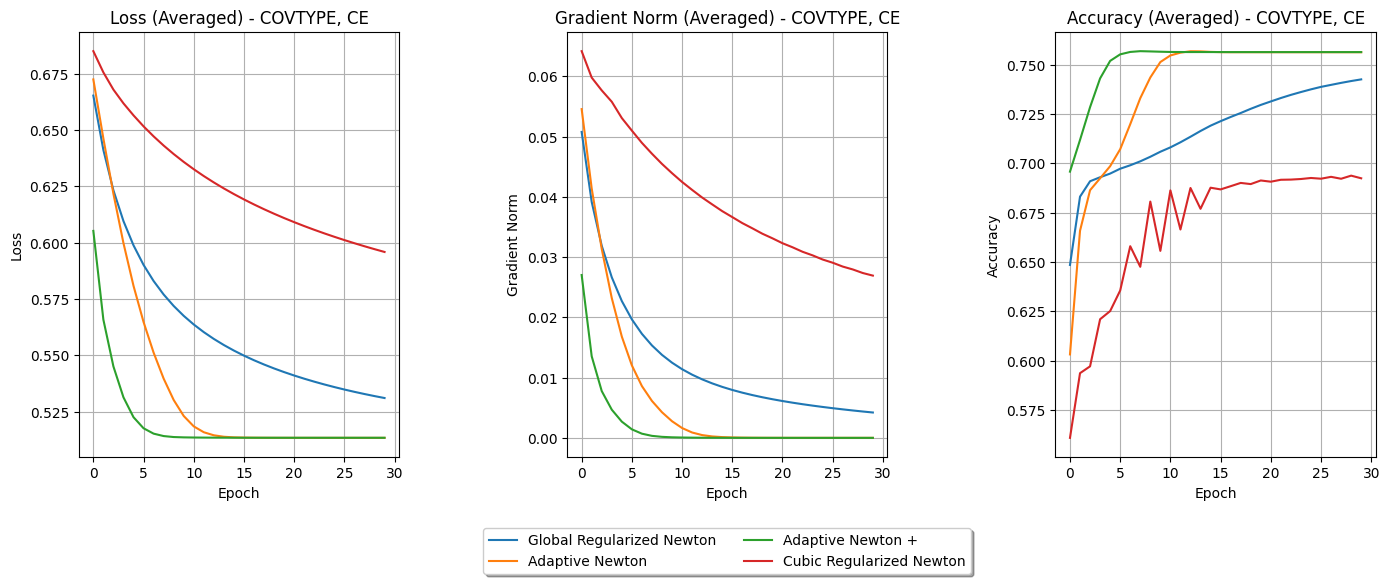

Average execution time(s): [12.83550604 20.22513978 20.77353032 14.80531335]
Average test accuracy(ies): [0.74326635 0.75609683 0.75579162 0.69166902]


In [6]:
generate_plots("COVTYPE", "CE", methods)
print(f"Average execution time(s): {np.mean(np.array(all_execution_times), axis=1)}")
print(f"Average test accuracy(ies): {np.mean(np.array(all_test_accuracies), axis=1)}")

In [7]:
epochs = 30
methods = ["grn", "adan", "adanp", "crn"] # Dont need GD and Newton
all_execution_times, all_test_accuracies, all_gradient_norms, all_training_losses, all_training_accuracies = perform_runs("ncce", methods, "covtype", epochs=epochs, initial_w=None)

number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   3%|▎         | 1/30 [00:00<00:13,  2.16it/s]

weights min: -0.3340350342095248, max: 0.22754157723562285


Training Epochs:   7%|▋         | 2/30 [00:00<00:12,  2.16it/s]

weights min: -0.43997563792107364, max: 0.373345366737044


Training Epochs:  10%|█         | 3/30 [00:01<00:12,  2.18it/s]

weights min: -0.5496904834989562, max: 0.5681223929502253


Training Epochs:  13%|█▎        | 4/30 [00:01<00:11,  2.19it/s]

weights min: -0.7120218571868621, max: 0.7478257319293041


Training Epochs:  17%|█▋        | 5/30 [00:02<00:11,  2.23it/s]

weights min: -0.8825130726620973, max: 0.9108894238799128


Training Epochs:  20%|██        | 6/30 [00:02<00:10,  2.23it/s]

weights min: -1.0372073002945594, max: 1.056789865864145


Training Epochs:  23%|██▎       | 7/30 [00:03<00:10,  2.23it/s]

weights min: -1.2093092491160586, max: 1.1858971873839856


Training Epochs:  27%|██▋       | 8/30 [00:03<00:09,  2.23it/s]

weights min: -1.4110109926969936, max: 1.2992027482428683


Training Epochs:  30%|███       | 9/30 [00:04<00:09,  2.24it/s]

weights min: -1.613307938293226, max: 1.3980086589620782


Training Epochs:  33%|███▎      | 10/30 [00:04<00:08,  2.27it/s]

weights min: -1.815236858950314, max: 1.483705529776327


Training Epochs:  37%|███▋      | 11/30 [00:04<00:08,  2.27it/s]

weights min: -2.0160981979332746, max: 1.5576491403710675


Training Epochs:  40%|████      | 12/30 [00:05<00:07,  2.26it/s]

weights min: -2.2153717332683156, max: 1.6211049372795818


Training Epochs:  43%|████▎     | 13/30 [00:05<00:07,  2.27it/s]

weights min: -2.4126611204436785, max: 1.6752296603836845


Training Epochs:  47%|████▋     | 14/30 [00:06<00:06,  2.31it/s]

weights min: -2.6076599400733786, max: 1.7210701921699152


Training Epochs:  50%|█████     | 15/30 [00:06<00:06,  2.31it/s]

weights min: -2.8001304330181, max: 1.7595691416295898


Training Epochs:  53%|█████▎    | 16/30 [00:07<00:06,  2.30it/s]

weights min: -2.989888838212804, max: 1.7915724958735835


Training Epochs:  57%|█████▋    | 17/30 [00:07<00:05,  2.28it/s]

weights min: -3.176794102264465, max: 1.8178376047459874


Training Epochs:  60%|██████    | 18/30 [00:07<00:05,  2.27it/s]

weights min: -3.3607386079702075, max: 1.839040977086915


Training Epochs:  63%|██████▎   | 19/30 [00:08<00:04,  2.27it/s]

weights min: -3.541640501535187, max: 1.8557857561390698


Training Epochs:  67%|██████▋   | 20/30 [00:08<00:04,  2.27it/s]

weights min: -3.7194375218057916, max: 1.868608819904667


Training Epochs:  70%|███████   | 21/30 [00:09<00:04,  2.25it/s]

weights min: -3.8940822616173802, max: 1.8779874537869536


Training Epochs:  73%|███████▎  | 22/30 [00:09<00:03,  2.25it/s]

weights min: -4.06553872065119, max: 1.884345546225463


Training Epochs:  77%|███████▋  | 23/30 [00:10<00:03,  2.29it/s]

weights min: -4.233779939148606, max: 1.8880592752948464


Training Epochs:  80%|████████  | 24/30 [00:10<00:02,  2.31it/s]

weights min: -4.398786466922923, max: 1.8894622777449086


Training Epochs:  83%|████████▎ | 25/30 [00:11<00:02,  2.32it/s]

weights min: -4.560545424893335, max: 1.8888503133643595


Training Epochs:  87%|████████▋ | 26/30 [00:11<00:01,  2.30it/s]

weights min: -4.719049946819915, max: 1.886485452656579


Training Epochs:  90%|█████████ | 27/30 [00:11<00:01,  2.29it/s]

weights min: -4.874298834207393, max: 1.882599824075923


Training Epochs:  93%|█████████▎| 28/30 [00:12<00:00,  2.29it/s]

weights min: -5.026296306170794, max: 1.8773989598902527


Training Epochs:  97%|█████████▋| 29/30 [00:12<00:00,  2.29it/s]

weights min: -5.1750517703514545, max: 1.8710647790639487


Training Epochs: 100%|██████████| 30/30 [00:13<00:00,  2.27it/s]

weights min: -5.32057957623504, max: 1.8637582431108728


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   3%|▎         | 1/30 [00:00<00:13,  2.22it/s]

weights min: -0.3976527701305907, max: 0.2930490430313991


Training Epochs:   7%|▋         | 2/30 [00:00<00:12,  2.26it/s]

weights min: -0.49976829621968155, max: 0.47533198968411416


Training Epochs:  10%|█         | 3/30 [00:01<00:11,  2.28it/s]

weights min: -0.6463117919185357, max: 0.650683241408197


Training Epochs:  13%|█▎        | 4/30 [00:01<00:11,  2.28it/s]

weights min: -0.8241155164757125, max: 0.8142421033242135


Training Epochs:  17%|█▋        | 5/30 [00:02<00:10,  2.28it/s]

weights min: -0.984862715370933, max: 0.9640302589044546


Training Epochs:  20%|██        | 6/30 [00:02<00:10,  2.28it/s]

weights min: -1.1316082819878144, max: 1.0992176643576106


Training Epochs:  23%|██▎       | 7/30 [00:03<00:10,  2.26it/s]

weights min: -1.2667931580722867, max: 1.2198160212339362


Training Epochs:  27%|██▋       | 8/30 [00:03<00:09,  2.23it/s]

weights min: -1.3923278033924853, max: 1.326444705990766


Training Epochs:  30%|███       | 9/30 [00:03<00:09,  2.23it/s]

weights min: -1.5758144302928758, max: 1.4200662130602377


Training Epochs:  33%|███▎      | 10/30 [00:04<00:08,  2.23it/s]

weights min: -1.7788276143592079, max: 1.5017797967474187


Training Epochs:  37%|███▋      | 11/30 [00:04<00:08,  2.24it/s]

weights min: -1.9806693257727879, max: 1.572697441214829


Training Epochs:  40%|████      | 12/30 [00:05<00:07,  2.25it/s]

weights min: -2.180895867750603, max: 1.6338823992637594


Training Epochs:  43%|████▎     | 13/30 [00:05<00:07,  2.26it/s]

weights min: -2.3791609169040395, max: 1.686324492422203


Training Epochs:  47%|████▋     | 14/30 [00:06<00:07,  2.23it/s]

weights min: -2.5751850388067754, max: 1.7309336487974105


Training Epochs:  50%|█████     | 15/30 [00:06<00:06,  2.22it/s]

weights min: -2.768739329835209, max: 1.7685411703713352


Training Epochs:  53%|█████▎    | 16/30 [00:07<00:06,  2.18it/s]

weights min: -2.9596360003267272, max: 1.7999037121942094


Training Epochs:  57%|█████▋    | 17/30 [00:07<00:06,  2.16it/s]

weights min: -3.147721864444915, max: 1.8257079766089068


Training Epochs:  60%|██████    | 18/30 [00:08<00:05,  2.16it/s]

weights min: -3.3328729690600687, max: 1.8465754960337137


Training Epochs:  63%|██████▎   | 19/30 [00:08<00:05,  2.16it/s]

weights min: -3.5149898380707008, max: 1.8630673654572911


Training Epochs:  67%|██████▋   | 20/30 [00:09<00:04,  2.17it/s]

weights min: -3.693993315252356, max: 1.8756888966638436


Training Epochs:  70%|███████   | 21/30 [00:09<00:04,  2.19it/s]

weights min: -3.869821091404424, max: 1.8848941623013322


Training Epochs:  73%|███████▎  | 22/30 [00:09<00:03,  2.19it/s]

weights min: -4.042424942500981, max: 1.8910903831887744


Training Epochs:  77%|███████▋  | 23/30 [00:10<00:03,  2.19it/s]

weights min: -4.211768618867518, max: 1.89464211219199


Training Epochs:  80%|████████  | 24/30 [00:10<00:02,  2.18it/s]

weights min: -4.377826266457367, max: 1.8958751794327486


Training Epochs:  83%|████████▎ | 25/30 [00:11<00:02,  2.17it/s]

weights min: -4.540581241092821, max: 1.8950803783644754


Training Epochs:  87%|████████▋ | 26/30 [00:11<00:01,  2.17it/s]

weights min: -4.70002518663941, max: 1.8925168849847216


Training Epochs:  90%|█████████ | 27/30 [00:12<00:01,  2.15it/s]

weights min: -4.856157274945481, max: 1.8884154113550975


Training Epochs:  93%|█████████▎| 28/30 [00:12<00:00,  2.15it/s]

weights min: -5.0089835370960225, max: 1.882981100031522


Training Epochs:  97%|█████████▋| 29/30 [00:13<00:00,  2.16it/s]

weights min: -5.158516244196561, max: 1.8763961691069253


Training Epochs: 100%|██████████| 30/30 [00:13<00:00,  2.20it/s]

weights min: -5.3047733176728205, max: 1.8688223193993996


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   3%|▎         | 1/30 [00:00<00:13,  2.22it/s]

weights min: -0.19649950231734647, max: 0.2509206889471141


Training Epochs:   7%|▋         | 2/30 [00:00<00:12,  2.21it/s]

weights min: -0.35468456252536323, max: 0.4176193848628046


Training Epochs:  10%|█         | 3/30 [00:01<00:12,  2.20it/s]

weights min: -0.5248870817826715, max: 0.6078337168240382


Training Epochs:  13%|█▎        | 4/30 [00:01<00:11,  2.20it/s]

weights min: -0.7051452059423832, max: 0.7828563417027584


Training Epochs:  17%|█▋        | 5/30 [00:02<00:11,  2.23it/s]

weights min: -0.8931149110158523, max: 0.9414860089331922


Training Epochs:  20%|██        | 6/30 [00:02<00:10,  2.26it/s]

weights min: -1.0864742595217274, max: 1.0833767623767059


Training Epochs:  23%|██▎       | 7/30 [00:03<00:10,  2.23it/s]

weights min: -1.283187278402457, max: 1.2090091581240918


Training Epochs:  27%|██▋       | 8/30 [00:03<00:09,  2.24it/s]

weights min: -1.481672628680803, max: 1.319399256817538


Training Epochs:  30%|███       | 9/30 [00:04<00:09,  2.24it/s]

weights min: -1.680782568202131, max: 1.4158080776603197


Training Epochs:  33%|███▎      | 10/30 [00:04<00:08,  2.23it/s]

weights min: -1.8796938934105656, max: 1.4995504413505116


Training Epochs:  37%|███▋      | 11/30 [00:04<00:08,  2.23it/s]

weights min: -2.0777997274411284, max: 1.571895361121173


Training Epochs:  40%|████      | 12/30 [00:05<00:08,  2.22it/s]

weights min: -2.2746324613326516, max: 1.6340245024996765


Training Epochs:  43%|████▎     | 13/30 [00:05<00:07,  2.23it/s]

weights min: -2.4698171201099353, max: 1.6870207465744596


Training Epochs:  47%|████▋     | 14/30 [00:06<00:07,  2.25it/s]

weights min: -2.663045558485922, max: 1.7318697407065715


Training Epochs:  50%|█████     | 15/30 [00:06<00:06,  2.26it/s]

weights min: -2.8540623017918865, max: 1.769465787053833


Training Epochs:  53%|█████▎    | 16/30 [00:07<00:06,  2.26it/s]

weights min: -3.042655834699591, max: 1.8006184979611553


Training Epochs:  57%|█████▋    | 17/30 [00:07<00:05,  2.27it/s]

weights min: -3.228652026768385, max: 1.8260591506094515


Training Epochs:  60%|██████    | 18/30 [00:08<00:05,  2.25it/s]

weights min: -3.4119083538551487, max: 1.846446640773009


Training Epochs:  63%|██████▎   | 19/30 [00:08<00:04,  2.23it/s]

weights min: -3.5923086218446123, max: 1.8623731626891367


Training Epochs:  67%|██████▋   | 20/30 [00:08<00:04,  2.22it/s]

weights min: -3.769758299411046, max: 1.8743697032323208


Training Epochs:  70%|███████   | 21/30 [00:09<00:04,  2.22it/s]

weights min: -3.9441806138653637, max: 1.8829113573259646


Training Epochs:  73%|███████▎  | 22/30 [00:09<00:03,  2.23it/s]

weights min: -4.115513471627317, max: 1.8884224223496393


Training Epochs:  77%|███████▋  | 23/30 [00:10<00:03,  2.25it/s]

weights min: -4.283707153256754, max: 1.8912812182533358


Training Epochs:  80%|████████  | 24/30 [00:10<00:02,  2.26it/s]

weights min: -4.4487226544619665, max: 1.89182459196357


Training Epochs:  83%|████████▎ | 25/30 [00:11<00:02,  2.27it/s]

weights min: -4.610530510814844, max: 1.8903520841424357


Training Epochs:  87%|████████▋ | 26/30 [00:11<00:01,  2.27it/s]

weights min: -4.76910994746611, max: 1.8871297541805547


Training Epochs:  90%|█████████ | 27/30 [00:12<00:01,  2.24it/s]

weights min: -4.92444822197261, max: 1.8823936718959162


Training Epochs:  93%|█████████▎| 28/30 [00:12<00:00,  2.23it/s]

weights min: -5.076540064824282, max: 1.8763530916885713


Training Epochs:  97%|█████████▋| 29/30 [00:12<00:00,  2.22it/s]

weights min: -5.225387158209642, max: 1.869193328256273


Training Epochs: 100%|██████████| 30/30 [00:13<00:00,  2.24it/s]

weights min: -5.37099762301289, max: 1.8610783540033367


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   3%|▎         | 1/30 [00:00<00:21,  1.36it/s]

weights min: -0.24855146861976485, max: 0.24156905136925877


Training Epochs:   7%|▋         | 2/30 [00:01<00:20,  1.37it/s]

weights min: -0.4598097262990592, max: 0.3005087490061347


Training Epochs:  10%|█         | 3/30 [00:02<00:19,  1.38it/s]

weights min: -0.7046988454696475, max: 0.5682594635800329


Training Epochs:  13%|█▎        | 4/30 [00:02<00:18,  1.37it/s]

weights min: -0.9854691160567461, max: 0.8732411661160491


Training Epochs:  17%|█▋        | 5/30 [00:03<00:18,  1.38it/s]

weights min: -1.3496205785754523, max: 1.1901292396447853


Training Epochs:  20%|██        | 6/30 [00:04<00:17,  1.38it/s]

weights min: -2.0380355505553207, max: 1.4794251055203897


Training Epochs:  23%|██▎       | 7/30 [00:05<00:16,  1.38it/s]

weights min: -2.943895264080672, max: 1.701463201945941


Training Epochs:  27%|██▋       | 8/30 [00:05<00:15,  1.38it/s]

weights min: -4.085430437656731, max: 1.8231495852810422


Training Epochs:  30%|███       | 9/30 [00:06<00:15,  1.38it/s]

weights min: -5.441207358384521, max: 1.8276766506584674


Training Epochs:  33%|███▎      | 10/30 [00:07<00:14,  1.39it/s]

weights min: -6.873469964118519, max: 2.593140855471276


Training Epochs:  37%|███▋      | 11/30 [00:07<00:13,  1.38it/s]

weights min: -8.186440426225625, max: 3.673973765468078


Training Epochs:  40%|████      | 12/30 [00:08<00:12,  1.39it/s]

weights min: -9.236977695627113, max: 4.693582907506038


Training Epochs:  43%|████▎     | 13/30 [00:09<00:12,  1.39it/s]

weights min: -9.936481612470079, max: 5.409167531002861


Training Epochs:  47%|████▋     | 14/30 [00:10<00:11,  1.39it/s]

weights min: -10.258214264593096, max: 5.74271679448134


Training Epochs:  50%|█████     | 15/30 [00:11<00:13,  1.11it/s]

weights min: -10.387806448852684, max: 5.86360957791594


Training Epochs:  53%|█████▎    | 16/30 [00:12<00:11,  1.19it/s]

weights min: -10.416203318257372, max: 5.895181736441278


Training Epochs:  57%|█████▋    | 17/30 [00:12<00:10,  1.25it/s]

weights min: -10.442015000228482, max: 5.921530574691423


Training Epochs:  60%|██████    | 18/30 [00:13<00:09,  1.29it/s]

weights min: -10.451638751053176, max: 5.931175341682315


Training Epochs:  63%|██████▎   | 19/30 [00:14<00:08,  1.32it/s]

weights min: -10.456231762421433, max: 5.935458579594011


Training Epochs:  67%|██████▋   | 20/30 [00:15<00:07,  1.34it/s]

weights min: -10.458529302918413, max: 5.9375181431017126


Training Epochs:  70%|███████   | 21/30 [00:15<00:06,  1.35it/s]

weights min: -10.459731352732287, max: 5.938578687360577


Training Epochs:  73%|███████▎  | 22/30 [00:16<00:06,  1.28it/s]

weights min: -10.46024295697111, max: 5.939027547139082


Training Epochs:  77%|███████▋  | 23/30 [00:17<00:05,  1.31it/s]

weights min: -10.460494792575608, max: 5.939247904617427


Training Epochs:  80%|████████  | 24/30 [00:18<00:04,  1.34it/s]

weights min: -10.460554798906244, max: 5.939300392371253


Training Epochs:  83%|████████▎ | 25/30 [00:18<00:03,  1.36it/s]

weights min: -10.460560110551263, max: 5.93930503732221


Training Epochs:  87%|████████▋ | 26/30 [00:19<00:02,  1.37it/s]

weights min: -10.460560195608386, max: 5.939305111724046


Training Epochs:  90%|█████████ | 27/30 [00:21<00:03,  1.07s/it]

weights min: -10.460560195706933, max: 5.9393051118102855


Training Epochs:  93%|█████████▎| 28/30 [00:28<00:05,  2.81s/it]

weights min: -10.460560195706941, max: 5.939305111810294


Training Epochs:  97%|█████████▋| 29/30 [00:29<00:02,  2.37s/it]

weights min: -10.460560195706945, max: 5.939305111810297


Training Epochs: 100%|██████████| 30/30 [00:31<00:00,  1.05s/it]

weights min: -10.460560195706945, max: 5.939305111810297


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   3%|▎         | 1/30 [00:00<00:20,  1.41it/s]

weights min: -0.28156516476152743, max: 0.16065260815622961


Training Epochs:   7%|▋         | 2/30 [00:01<00:19,  1.42it/s]

weights min: -0.4912675324446475, max: 0.33140976296481084


Training Epochs:  10%|█         | 3/30 [00:02<00:19,  1.41it/s]

weights min: -0.736270994506633, max: 0.5752029935713758


Training Epochs:  13%|█▎        | 4/30 [00:02<00:18,  1.42it/s]

weights min: -1.0158677059451389, max: 0.8644791016494437


Training Epochs:  17%|█▋        | 5/30 [00:03<00:17,  1.42it/s]

weights min: -1.3356310562943083, max: 1.173396208403217


Training Epochs:  20%|██        | 6/30 [00:04<00:16,  1.42it/s]

weights min: -1.9922896887666206, max: 1.45890151613602


Training Epochs:  23%|██▎       | 7/30 [00:04<00:16,  1.42it/s]

weights min: -2.9045300296473897, max: 1.6782987560344047


Training Epochs:  27%|██▋       | 8/30 [00:05<00:15,  1.42it/s]

weights min: -4.050150329769105, max: 1.7975475536500047


Training Epochs:  30%|███       | 9/30 [00:06<00:14,  1.42it/s]

weights min: -5.413219842681551, max: 1.7989932814013847


Training Epochs:  33%|███▎      | 10/30 [00:07<00:14,  1.42it/s]

weights min: -6.8609087898596055, max: 2.51087015840928


Training Epochs:  37%|███▋      | 11/30 [00:07<00:13,  1.43it/s]

weights min: -8.189207247755615, max: 3.6209856502614346


Training Epochs:  40%|████      | 12/30 [00:08<00:12,  1.43it/s]

weights min: -9.255980492225834, max: 4.6757550554381355


Training Epochs:  43%|████▎     | 13/30 [00:09<00:11,  1.42it/s]

weights min: -9.969453194242078, max: 5.417358152342876


Training Epochs:  47%|████▋     | 14/30 [00:09<00:11,  1.43it/s]

weights min: -10.29767597426384, max: 5.760356921337626


Training Epochs:  50%|█████     | 15/30 [00:11<00:13,  1.12it/s]

weights min: -10.405347654700696, max: 5.863724541479292


Training Epochs:  53%|█████▎    | 16/30 [00:11<00:11,  1.19it/s]

weights min: -10.463489578639493, max: 5.918581634756925


Training Epochs:  57%|█████▋    | 17/30 [00:12<00:10,  1.25it/s]

weights min: -10.483326211815527, max: 5.939793084352476


Training Epochs:  60%|██████    | 18/30 [00:13<00:09,  1.29it/s]

weights min: -10.495116700420532, max: 5.951359013551348


Training Epochs:  63%|██████▎   | 19/30 [00:14<00:08,  1.33it/s]

weights min: -10.499944185445084, max: 5.955836679919576


Training Epochs:  67%|██████▋   | 20/30 [00:14<00:07,  1.35it/s]

weights min: -10.502423243024705, max: 5.958026514469591


Training Epochs:  70%|███████   | 21/30 [00:15<00:06,  1.37it/s]

weights min: -10.503702292496321, max: 5.959137085701334


Training Epochs:  73%|███████▎  | 22/30 [00:16<00:06,  1.29it/s]

weights min: -10.504248968871325, max: 5.959608820474621


Training Epochs:  77%|███████▋  | 23/30 [00:17<00:05,  1.33it/s]

weights min: -10.504523826373806, max: 5.95984530134089


Training Epochs:  80%|████████  | 24/30 [00:17<00:04,  1.36it/s]

weights min: -10.504591848965218, max: 5.959903803412012


Training Epochs:  83%|████████▎ | 25/30 [00:18<00:03,  1.38it/s]

weights min: -10.504598312904104, max: 5.959909360976863


Training Epochs:  87%|████████▋ | 26/30 [00:19<00:02,  1.39it/s]

weights min: -10.50459842846785, max: 5.959909460362364


Training Epochs:  90%|█████████ | 27/30 [00:20<00:02,  1.23it/s]

weights min: -10.504598428624709, max: 5.959909460497326


Training Epochs:  93%|█████████▎| 28/30 [00:28<00:06,  3.21s/it]

weights min: -10.504598428624709, max: 5.959909460497327


Training Epochs:  97%|█████████▋| 29/30 [00:31<00:02,  2.99s/it]

weights min: -10.504598428624709, max: 5.959909460497327


Training Epochs: 100%|██████████| 30/30 [00:32<00:00,  1.07s/it]

weights min: -10.504598428624709, max: 5.959909460497327


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   3%|▎         | 1/30 [00:00<00:20,  1.40it/s]

weights min: -0.23366901695753325, max: 0.40322995674553314


Training Epochs:   7%|▋         | 2/30 [00:01<00:20,  1.39it/s]

weights min: -0.3306237259228346, max: 0.5826336695662703


Training Epochs:  10%|█         | 3/30 [00:02<00:19,  1.40it/s]

weights min: -0.5753101349783694, max: 0.8093756167686674


Training Epochs:  13%|█▎        | 4/30 [00:02<00:18,  1.40it/s]

weights min: -0.910389675981607, max: 1.073428800403284


Training Epochs:  17%|█▋        | 5/30 [00:03<00:17,  1.40it/s]

weights min: -1.4109103180943334, max: 1.3486209350649894


Training Epochs:  20%|██        | 6/30 [00:04<00:17,  1.40it/s]

weights min: -2.105561324745578, max: 1.5966207462122073


Training Epochs:  23%|██▎       | 7/30 [00:04<00:16,  1.42it/s]

weights min: -3.01899541819866, max: 1.7785418558754336


Training Epochs:  27%|██▋       | 8/30 [00:05<00:15,  1.43it/s]

weights min: -4.165217814731511, max: 1.8630253010101492


Training Epochs:  30%|███       | 9/30 [00:06<00:14,  1.43it/s]

weights min: -5.51774029382422, max: 1.8376169313867823


Training Epochs:  33%|███▎      | 10/30 [00:07<00:13,  1.43it/s]

weights min: -6.938133770549406, max: 2.624714071247292


Training Epochs:  37%|███▋      | 11/30 [00:07<00:13,  1.43it/s]

weights min: -8.239455974505349, max: 3.703671860239827


Training Epochs:  40%|████      | 12/30 [00:08<00:12,  1.42it/s]

weights min: -9.282085750802246, max: 4.71994119308525


Training Epochs:  43%|████▎     | 13/30 [00:09<00:12,  1.42it/s]

weights min: -9.970097732305772, max: 5.429695676427015


Training Epochs:  47%|████▋     | 14/30 [00:09<00:11,  1.41it/s]

weights min: -10.282402946141323, max: 5.756611307569824


Training Epochs:  50%|█████     | 15/30 [00:11<00:14,  1.06it/s]

weights min: -10.368612020850874, max: 5.839121539704319


Training Epochs:  53%|█████▎    | 16/30 [00:12<00:12,  1.14it/s]

weights min: -10.42142500792787, max: 5.889662567896044


Training Epochs:  57%|█████▋    | 17/30 [00:12<00:10,  1.22it/s]

weights min: -10.44884568828528, max: 5.917709889476899


Training Epochs:  60%|██████    | 18/30 [00:13<00:09,  1.28it/s]

weights min: -10.464030737167834, max: 5.932978478259385


Training Epochs:  63%|██████▎   | 19/30 [00:14<00:08,  1.32it/s]

weights min: -10.471092282180251, max: 5.9397521428995


Training Epochs:  67%|██████▋   | 20/30 [00:14<00:07,  1.34it/s]

weights min: -10.474655347267927, max: 5.942984909016782


Training Epochs:  70%|███████   | 21/30 [00:15<00:06,  1.37it/s]

weights min: -10.476552784103207, max: 5.944657362052235


Training Epochs:  73%|███████▎  | 22/30 [00:16<00:05,  1.38it/s]

weights min: -10.477553341252124, max: 5.945529247143971


Training Epochs:  77%|███████▋  | 23/30 [00:17<00:05,  1.38it/s]

weights min: -10.478021108707207, max: 5.94593496314386


Training Epochs:  80%|████████  | 24/30 [00:17<00:04,  1.39it/s]

weights min: -10.478178111886102, max: 5.946070876975324


Training Epochs:  83%|████████▎ | 25/30 [00:18<00:03,  1.40it/s]

weights min: -10.478203629018292, max: 5.94609295295598


Training Epochs:  87%|████████▋ | 26/30 [00:19<00:02,  1.41it/s]

weights min: -10.478204729452157, max: 5.9460939050613


Training Epochs:  90%|█████████ | 27/30 [00:20<00:02,  1.32it/s]

weights min: -10.47820473495695, max: 5.94609390982625


Training Epochs:  93%|█████████▎| 28/30 [00:25<00:04,  2.26s/it]

weights min: -10.478204734958235, max: 5.946093909827363


Training Epochs:  97%|█████████▋| 29/30 [00:28<00:02,  2.28s/it]

weights min: -10.478204734958325, max: 5.946093909827442


Training Epochs: 100%|██████████| 30/30 [00:30<00:00,  1.01s/it]

weights min: -10.478204734958332, max: 5.9460939098274475


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   3%|▎         | 1/30 [00:00<00:20,  1.43it/s]

weights min: -1.0366023903993125, max: 0.8304432678447072


Training Epochs:   7%|▋         | 2/30 [00:01<00:19,  1.44it/s]

weights min: -2.4075081165872003, max: 1.364911928361778


Training Epochs:  10%|█         | 3/30 [00:02<00:18,  1.44it/s]

weights min: -3.914946099059927, max: 1.6591911164291406


Training Epochs:  13%|█▎        | 4/30 [00:02<00:18,  1.44it/s]

weights min: -5.67778932627836, max: 1.764540708529748


Training Epochs:  17%|█▋        | 5/30 [00:03<00:17,  1.45it/s]

weights min: -7.41172090242532, max: 3.0484404009261423


Training Epochs:  20%|██        | 6/30 [00:04<00:16,  1.44it/s]

weights min: -8.820899276502356, max: 4.273780727353726


Training Epochs:  23%|██▎       | 7/30 [00:04<00:16,  1.43it/s]

weights min: -9.756986478068164, max: 5.193010496417622


Training Epochs:  27%|██▋       | 8/30 [00:05<00:15,  1.44it/s]

weights min: -10.178582341905084, max: 5.6263916912439065


Training Epochs:  30%|███       | 9/30 [00:06<00:14,  1.43it/s]

weights min: -10.345273094732695, max: 5.797857090711134


Training Epochs:  33%|███▎      | 10/30 [00:06<00:13,  1.44it/s]

weights min: -10.428877011269508, max: 5.874914920733317


Training Epochs:  37%|███▋      | 11/30 [00:07<00:13,  1.43it/s]

weights min: -10.445844934063423, max: 5.89497964818312


Training Epochs:  40%|████      | 12/30 [00:08<00:12,  1.43it/s]

weights min: -10.4625184435764, max: 5.912267758113486


Training Epochs:  43%|████▎     | 13/30 [00:09<00:11,  1.46it/s]

weights min: -10.471232806284386, max: 5.9208980683895


Training Epochs:  47%|████▋     | 14/30 [00:09<00:10,  1.48it/s]

weights min: -10.475991053371173, max: 5.925369860150959


Training Epochs:  50%|█████     | 15/30 [00:10<00:10,  1.49it/s]

weights min: -10.478865839556992, max: 5.927963198260808


Training Epochs:  53%|█████▎    | 16/30 [00:11<00:09,  1.47it/s]

weights min: -10.480695078594293, max: 5.929577440047865


Training Epochs:  57%|█████▋    | 17/30 [00:11<00:08,  1.47it/s]

weights min: -10.481880812706812, max: 5.930612305968362


Training Epochs:  60%|██████    | 18/30 [00:12<00:08,  1.47it/s]

weights min: -10.482643961665865, max: 5.931274391858254


Training Epochs:  63%|██████▎   | 19/30 [00:13<00:07,  1.46it/s]

weights min: -10.483117434022633, max: 5.931683759102337


Training Epochs:  67%|██████▋   | 20/30 [00:13<00:06,  1.46it/s]

weights min: -10.483387425870829, max: 5.931916739335326


Training Epochs:  70%|███████   | 21/30 [00:14<00:06,  1.46it/s]

weights min: -10.483517808766813, max: 5.9320291321522856


Training Epochs:  73%|███████▎  | 22/30 [00:15<00:05,  1.46it/s]

weights min: -10.483564329368951, max: 5.932069216019013


Training Epochs:  77%|███████▋  | 23/30 [00:15<00:04,  1.45it/s]

weights min: -10.483574253408483, max: 5.9320777661680975


Training Epochs:  80%|████████  | 24/30 [00:16<00:04,  1.46it/s]

weights min: -10.483575188672098, max: 5.93207857201644


Training Epochs:  83%|████████▎ | 25/30 [00:17<00:03,  1.45it/s]

weights min: -10.483575214338494, max: 5.932078594133753


Training Epochs:  87%|████████▋ | 26/30 [00:17<00:02,  1.43it/s]

weights min: -10.483575214451546, max: 5.93207859423118


Training Epochs:  90%|█████████ | 27/30 [00:18<00:02,  1.42it/s]

weights min: -10.483575214451578, max: 5.932078594231208


Training Epochs:  93%|█████████▎| 28/30 [00:19<00:01,  1.42it/s]

weights min: -10.483575214451577, max: 5.932078594231206


Training Epochs:  97%|█████████▋| 29/30 [00:20<00:00,  1.41it/s]

weights min: -10.483575214451577, max: 5.932078594231206


Training Epochs: 100%|██████████| 30/30 [00:20<00:00,  1.44it/s]

weights min: -10.483575214451577, max: 5.932078594231206


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   3%|▎         | 1/30 [00:00<00:20,  1.40it/s]

weights min: -1.3470333613525571, max: 0.9229395104918918


Training Epochs:   7%|▋         | 2/30 [00:01<00:20,  1.40it/s]

weights min: -2.6937869468015894, max: 1.4137994792999182


Training Epochs:  10%|█         | 3/30 [00:02<00:19,  1.41it/s]

weights min: -4.233828747684815, max: 1.6727471147301118


Training Epochs:  13%|█▎        | 4/30 [00:02<00:18,  1.41it/s]

weights min: -6.019825978005825, max: 1.9648730970412551


Training Epochs:  17%|█▋        | 5/30 [00:03<00:17,  1.39it/s]

weights min: -7.706864998049236, max: 3.265053705493042


Training Epochs:  20%|██        | 6/30 [00:04<00:17,  1.39it/s]

weights min: -9.038977565034955, max: 4.472317774125601


Training Epochs:  23%|██▎       | 7/30 [00:05<00:16,  1.38it/s]

weights min: -9.884971209610185, max: 5.306369441452847


Training Epochs:  27%|██▋       | 8/30 [00:05<00:16,  1.37it/s]

weights min: -10.259390903772442, max: 5.688595702246896


Training Epochs:  30%|███       | 9/30 [00:06<00:15,  1.37it/s]

weights min: -10.413377615935417, max: 5.843659608224205


Training Epochs:  33%|███▎      | 10/30 [00:07<00:14,  1.36it/s]

weights min: -10.486269726595093, max: 5.910559573517173


Training Epochs:  37%|███▋      | 11/30 [00:07<00:13,  1.36it/s]

weights min: -10.505634741781325, max: 5.931807728171203


Training Epochs:  40%|████      | 12/30 [00:08<00:13,  1.35it/s]

weights min: -10.52217689170162, max: 5.948535978140295


Training Epochs:  43%|████▎     | 13/30 [00:09<00:12,  1.37it/s]

weights min: -10.530749617184714, max: 5.956930461150126


Training Epochs:  47%|████▋     | 14/30 [00:10<00:11,  1.39it/s]

weights min: -10.535533927777749, max: 5.961398509492693


Training Epochs:  50%|█████     | 15/30 [00:10<00:10,  1.39it/s]

weights min: -10.538437760392426, max: 5.9640089462180965


Training Epochs:  53%|█████▎    | 16/30 [00:11<00:09,  1.40it/s]

weights min: -10.540287533625587, max: 5.965636492959109


Training Epochs:  57%|█████▋    | 17/30 [00:12<00:09,  1.42it/s]

weights min: -10.541486628082838, max: 5.966679925863001


Training Epochs:  60%|██████    | 18/30 [00:12<00:08,  1.43it/s]

weights min: -10.542258238266035, max: 5.967347347056853


Training Epochs:  63%|██████▎   | 19/30 [00:13<00:07,  1.44it/s]

weights min: -10.542736787112176, max: 5.967759855361862


Training Epochs:  67%|██████▋   | 20/30 [00:14<00:06,  1.44it/s]

weights min: -10.543009484010827, max: 5.967994457776644


Training Epochs:  70%|███████   | 21/30 [00:14<00:06,  1.45it/s]

weights min: -10.543141004973558, max: 5.968107488179718


Training Epochs:  73%|███████▎  | 22/30 [00:15<00:05,  1.46it/s]

weights min: -10.5431878281679, max: 5.968147710549948


Training Epochs:  77%|███████▋  | 23/30 [00:16<00:04,  1.47it/s]

weights min: -10.543197781220158, max: 5.968156259730264


Training Epochs:  80%|████████  | 24/30 [00:16<00:04,  1.49it/s]

weights min: -10.54319871414108, max: 5.968157061127452


Training Epochs:  83%|████████▎ | 25/30 [00:17<00:03,  1.50it/s]

weights min: -10.543198739538731, max: 5.968157082946971


Training Epochs:  87%|████████▋ | 26/30 [00:18<00:02,  1.49it/s]

weights min: -10.54319873964928, max: 5.968157083041952


Training Epochs:  90%|█████████ | 27/30 [00:18<00:02,  1.49it/s]

weights min: -10.543198739649313, max: 5.96815708304198


Training Epochs:  93%|█████████▎| 28/30 [00:19<00:01,  1.48it/s]

weights min: -10.543198739649313, max: 5.968157083041979


Training Epochs:  97%|█████████▋| 29/30 [00:20<00:00,  1.49it/s]

weights min: -10.543198739649313, max: 5.968157083041979


Training Epochs: 100%|██████████| 30/30 [00:21<00:00,  1.43it/s]

weights min: -10.543198739649313, max: 5.968157083041979


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   3%|▎         | 1/30 [00:00<00:20,  1.45it/s]

weights min: -1.401950368915274, max: 0.9458351102860615


Training Epochs:   7%|▋         | 2/30 [00:01<00:19,  1.44it/s]

weights min: -2.7281536110396574, max: 1.4132412106925025


Training Epochs:  10%|█         | 3/30 [00:02<00:18,  1.44it/s]

weights min: -4.249579913423039, max: 1.6539241967491614


Training Epochs:  13%|█▎        | 4/30 [00:02<00:17,  1.45it/s]

weights min: -6.012258855044477, max: 1.9815160306965192


Training Epochs:  17%|█▋        | 5/30 [00:03<00:17,  1.45it/s]

weights min: -7.6725933416573975, max: 3.274432835173866


Training Epochs:  20%|██        | 6/30 [00:04<00:16,  1.43it/s]

weights min: -8.98992892419336, max: 4.473512188574351


Training Epochs:  23%|██▎       | 7/30 [00:04<00:16,  1.42it/s]

weights min: -9.84103872951656, max: 5.309368560984387


Training Epochs:  27%|██▋       | 8/30 [00:05<00:15,  1.42it/s]

weights min: -10.209298716667337, max: 5.682472739345345


Training Epochs:  30%|███       | 9/30 [00:06<00:14,  1.43it/s]

weights min: -10.360522944270466, max: 5.834269844249576


Training Epochs:  33%|███▎      | 10/30 [00:06<00:13,  1.44it/s]

weights min: -10.422790042187318, max: 5.893052592571957


Training Epochs:  37%|███▋      | 11/30 [00:07<00:13,  1.44it/s]

weights min: -10.444615645709225, max: 5.9161307049544245


Training Epochs:  40%|████      | 12/30 [00:08<00:12,  1.44it/s]

weights min: -10.460614745052352, max: 5.93228652018015


Training Epochs:  43%|████▎     | 13/30 [00:09<00:11,  1.44it/s]

weights min: -10.46897409767786, max: 5.940500353095947


Training Epochs:  47%|████▋     | 14/30 [00:09<00:11,  1.44it/s]

weights min: -10.473706435386232, max: 5.9449526630905


Training Epochs:  50%|█████     | 15/30 [00:10<00:10,  1.44it/s]

weights min: -10.476586353764706, max: 5.947570740972022


Training Epochs:  53%|█████▎    | 16/30 [00:11<00:09,  1.44it/s]

weights min: -10.478421306498513, max: 5.949206582063451


Training Epochs:  57%|█████▋    | 17/30 [00:11<00:09,  1.43it/s]

weights min: -10.479610600276796, max: 5.950256054459915


Training Epochs:  60%|██████    | 18/30 [00:12<00:08,  1.43it/s]

weights min: -10.48037578028998, max: 5.950927497822772


Training Epochs:  63%|██████▎   | 19/30 [00:13<00:07,  1.43it/s]

weights min: -10.480850189089823, max: 5.951342446050821


Training Epochs:  67%|██████▋   | 20/30 [00:13<00:06,  1.43it/s]

weights min: -10.481120337110202, max: 5.951578297727175


Training Epochs:  70%|███████   | 21/30 [00:14<00:06,  1.43it/s]

weights min: -10.481250452337072, max: 5.9516917830703475


Training Epochs:  73%|███████▎  | 22/30 [00:15<00:05,  1.43it/s]

weights min: -10.48129666626721, max: 5.951732073571912


Training Epochs:  77%|███████▋  | 23/30 [00:16<00:04,  1.41it/s]

weights min: -10.481306452969825, max: 5.951740605176454


Training Epochs:  80%|████████  | 24/30 [00:16<00:04,  1.41it/s]

weights min: -10.481307365127648, max: 5.951741400415513


Training Epochs:  83%|████████▎ | 25/30 [00:17<00:03,  1.42it/s]

weights min: -10.481307389755152, max: 5.951741421888586


Training Epochs:  87%|████████▋ | 26/30 [00:18<00:02,  1.43it/s]

weights min: -10.481307389861048, max: 5.951741421980925


Training Epochs:  90%|█████████ | 27/30 [00:18<00:02,  1.44it/s]

weights min: -10.481307389861078, max: 5.951741421980951


Training Epochs:  93%|█████████▎| 28/30 [00:19<00:01,  1.45it/s]

weights min: -10.481307389861078, max: 5.951741421980951


Training Epochs:  97%|█████████▋| 29/30 [00:20<00:00,  1.44it/s]

weights min: -10.481307389861078, max: 5.951741421980951


Training Epochs: 100%|██████████| 30/30 [00:20<00:00,  1.44it/s]

weights min: -10.481307389861078, max: 5.951741421980951


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   3%|▎         | 1/30 [00:00<00:14,  2.01it/s]

weights min: -0.3280832685432246, max: 0.26681746838693937


Training Epochs:   7%|▋         | 2/30 [00:01<00:14,  1.97it/s]

weights min: -0.3021969295814371, max: 0.267282645885948


Training Epochs:  10%|█         | 3/30 [00:01<00:13,  1.99it/s]

weights min: -0.32786864850362635, max: 0.26762820475045057


Training Epochs:  13%|█▎        | 4/30 [00:02<00:13,  2.00it/s]

weights min: -0.3005856732807894, max: 0.2681297080107677


Training Epochs:  17%|█▋        | 5/30 [00:02<00:12,  2.00it/s]

weights min: -0.3410120789062434, max: 0.268500200453132


Training Epochs:  20%|██        | 6/30 [00:03<00:12,  2.00it/s]

weights min: -0.3811754552977571, max: 0.2690051377783184


Training Epochs:  23%|██▎       | 7/30 [00:03<00:11,  1.99it/s]

weights min: -0.42263035835870355, max: 0.2765015396450103


Training Epochs:  27%|██▋       | 8/30 [00:04<00:11,  1.99it/s]

weights min: -0.4585790780873511, max: 0.3041906668113609


Training Epochs:  30%|███       | 9/30 [00:04<00:10,  2.02it/s]

weights min: -0.49595198327079437, max: 0.3229198837467523


Training Epochs:  33%|███▎      | 10/30 [00:04<00:09,  2.04it/s]

weights min: -0.5284902576144579, max: 0.36431239859289233


Training Epochs:  37%|███▋      | 11/30 [00:05<00:09,  2.04it/s]

weights min: -0.5625218933084639, max: 0.40064271706799165


Training Epochs:  40%|████      | 12/30 [00:05<00:08,  2.05it/s]

weights min: -0.5922577543430065, max: 0.43940541438462677


Training Epochs:  43%|████▎     | 13/30 [00:06<00:08,  2.04it/s]

weights min: -0.6235176819110748, max: 0.4735014305275196


Training Epochs:  47%|████▋     | 14/30 [00:06<00:07,  2.03it/s]

weights min: -0.6509186106986957, max: 0.5098979387536419


Training Epochs:  50%|█████     | 15/30 [00:07<00:07,  2.05it/s]

weights min: -0.6798507123293634, max: 0.5419756697977514


Training Epochs:  53%|█████▎    | 16/30 [00:07<00:06,  2.07it/s]

weights min: -0.7052820845694369, max: 0.5762214216899152


Training Epochs:  57%|█████▋    | 17/30 [00:08<00:06,  2.07it/s]

weights min: -0.7322371644149788, max: 0.606457709460044


Training Epochs:  60%|██████    | 18/30 [00:08<00:05,  2.06it/s]

weights min: -0.7559889755862186, max: 0.6387343141757837


Training Epochs:  63%|██████▎   | 19/30 [00:09<00:05,  2.06it/s]

weights min: -0.7812479692773716, max: 0.6672783826052229


Training Epochs:  67%|██████▋   | 20/30 [00:09<00:04,  2.06it/s]

weights min: -0.8035535657974334, max: 0.6977424304111205


Training Epochs:  70%|███████   | 21/30 [00:10<00:04,  2.05it/s]

weights min: -0.8273441789339357, max: 0.7247231433333785


Training Epochs:  73%|███████▎  | 22/30 [00:10<00:03,  2.04it/s]

weights min: -0.8483935961448493, max: 0.7535119756879687


Training Epochs:  77%|███████▋  | 23/30 [00:11<00:03,  2.04it/s]

weights min: -0.8709023931627877, max: 0.7790426340556065


Training Epochs:  80%|████████  | 24/30 [00:11<00:02,  2.06it/s]

weights min: -0.8908520315763627, max: 0.8062783044221394


Training Epochs:  83%|████████▎ | 25/30 [00:12<00:02,  2.06it/s]

weights min: -0.9122333543570893, max: 0.8304599297854317


Training Epochs:  87%|████████▋ | 26/30 [00:12<00:01,  2.05it/s]

weights min: -0.9312131304947985, max: 0.8562520115117885


Training Epochs:  90%|█████████ | 27/30 [00:13<00:01,  2.06it/s]

weights min: -0.9515957785752253, max: 0.8791756508318364


Training Epochs:  93%|█████████▎| 28/30 [00:13<00:00,  2.06it/s]

weights min: -0.9697145010614711, max: 0.9036232797430291


Training Epochs:  97%|█████████▋| 29/30 [00:14<00:00,  2.07it/s]

weights min: -0.9892068071272864, max: 0.9253716594269895


Training Epochs: 100%|██████████| 30/30 [00:14<00:00,  2.04it/s]

weights min: -1.0065562816701594, max: 0.9485650569069969


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   3%|▎         | 1/30 [00:00<00:14,  2.00it/s]

weights min: -0.18469914643064017, max: 0.21277686346564278


Training Epochs:   7%|▋         | 2/30 [00:00<00:13,  2.01it/s]

weights min: -0.16100725256718712, max: 0.24452419409504747


Training Epochs:  10%|█         | 3/30 [00:01<00:13,  2.02it/s]

weights min: -0.2206480634851937, max: 0.24685314879571688


Training Epochs:  13%|█▎        | 4/30 [00:01<00:12,  2.02it/s]

weights min: -0.27194408963105987, max: 0.2746177735799088


Training Epochs:  17%|█▋        | 5/30 [00:02<00:12,  2.06it/s]

weights min: -0.323952164160378, max: 0.2753666234151509


Training Epochs:  20%|██        | 6/30 [00:02<00:11,  2.08it/s]

weights min: -0.36881370328372065, max: 0.3002644215233352


Training Epochs:  23%|██▎       | 7/30 [00:03<00:10,  2.10it/s]

weights min: -0.41476118397848505, max: 0.32504680603118424


Training Epochs:  27%|██▋       | 8/30 [00:03<00:10,  2.10it/s]

weights min: -0.45456231800320734, max: 0.36467746411798274


Training Epochs:  30%|███       | 9/30 [00:04<00:09,  2.12it/s]

weights min: -0.49565356540871786, max: 0.39913980524318343


Training Epochs:  33%|███▎      | 10/30 [00:04<00:09,  2.12it/s]

weights min: -0.5313993024296436, max: 0.4364964157532364


Training Epochs:  37%|███▋      | 11/30 [00:05<00:09,  2.11it/s]

weights min: -0.5685472542438229, max: 0.4690894048238199


Training Epochs:  40%|████      | 12/30 [00:05<00:08,  2.09it/s]

weights min: -0.6009900115545892, max: 0.5043893057623573


Training Epochs:  43%|████▎     | 13/30 [00:06<00:08,  2.06it/s]

weights min: -0.6348922435557399, max: 0.535276271510903


Training Epochs:  47%|████▋     | 14/30 [00:06<00:07,  2.05it/s]

weights min: -0.6646049705354747, max: 0.5686884028642932


Training Epochs:  50%|█████     | 15/30 [00:07<00:07,  2.05it/s]

weights min: -0.69580114231804, max: 0.5979972771487598


Training Epochs:  53%|█████▎    | 16/30 [00:07<00:06,  2.05it/s]

weights min: -0.7232274831089985, max: 0.6296610062055076


Training Epochs:  57%|█████▋    | 17/30 [00:08<00:06,  2.07it/s]

weights min: -0.7521407771071562, max: 0.6574981054704949


Training Epochs:  60%|██████    | 18/30 [00:08<00:05,  2.10it/s]

weights min: -0.7776297137339013, max: 0.6875332459143222


Training Epochs:  63%|██████▎   | 19/30 [00:09<00:05,  2.10it/s]

weights min: -0.8045963908832061, max: 0.7139907660795252


Training Epochs:  67%|██████▋   | 20/30 [00:09<00:04,  2.11it/s]

weights min: -0.8284263955364031, max: 0.7425032942297671


Training Epochs:  70%|███████   | 21/30 [00:10<00:04,  2.08it/s]

weights min: -0.8537169606351401, max: 0.7676636029932478


Training Epochs:  73%|███████▎  | 22/30 [00:10<00:03,  2.09it/s]

weights min: -0.8761130882622072, max: 0.7947491101346176


Training Epochs:  77%|███████▋  | 23/30 [00:11<00:03,  2.08it/s]

weights min: -0.8999476116267703, max: 0.8186873064165087


Training Epochs:  80%|████████  | 24/30 [00:11<00:02,  2.07it/s]

weights min: -0.9210938078312293, max: 0.8444331778299284


Training Epochs:  83%|████████▎ | 25/30 [00:12<00:02,  2.07it/s]

weights min: -0.943653166221152, max: 0.8672186622001917


Training Epochs:  87%|████████▋ | 26/30 [00:12<00:01,  2.06it/s]

weights min: -0.9637012867800704, max: 0.8917055015707781


Training Epochs:  90%|█████████ | 27/30 [00:13<00:01,  2.07it/s]

weights min: -0.9851355266292522, max: 0.9134029607480219


Training Epochs:  93%|█████████▎| 28/30 [00:13<00:00,  2.07it/s]

weights min: -1.0042120587330474, max: 0.9367055521202706


Training Epochs:  97%|█████████▋| 29/30 [00:13<00:00,  2.07it/s]

weights min: -1.0246467039955747, max: 0.9573755899782594


Training Epochs: 100%|██████████| 30/30 [00:14<00:00,  2.08it/s]

weights min: -1.0428578529215768, max: 0.9795635716486178


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:   3%|▎         | 1/30 [00:00<00:14,  2.02it/s]

weights min: -0.21962400542628654, max: 0.20616216023696016


Training Epochs:   7%|▋         | 2/30 [00:00<00:13,  2.02it/s]

weights min: -0.25474388822523897, max: 0.20455611670722265


Training Epochs:  10%|█         | 3/30 [00:01<00:13,  1.98it/s]

weights min: -0.30528047635756383, max: 0.20295276637845144


Training Epochs:  13%|█▎        | 4/30 [00:01<00:12,  2.00it/s]

weights min: -0.34837355042706947, max: 0.24648692625144059


Training Epochs:  17%|█▋        | 5/30 [00:02<00:12,  2.06it/s]

weights min: -0.3927157512909524, max: 0.2851241909913576


Training Epochs:  20%|██        | 6/30 [00:02<00:11,  2.05it/s]

weights min: -0.43104300951156654, max: 0.3263640787946916


Training Epochs:  23%|██▎       | 7/30 [00:03<00:11,  2.09it/s]

weights min: -0.4707438782369521, max: 0.3620771850778777


Training Epochs:  27%|██▋       | 8/30 [00:03<00:10,  2.10it/s]

weights min: -0.5052491360512938, max: 0.4004327874758481


Training Epochs:  30%|███       | 9/30 [00:04<00:10,  2.06it/s]

weights min: -0.5412099724435804, max: 0.4338201517263678


Training Epochs:  33%|███▎      | 10/30 [00:04<00:09,  2.04it/s]

weights min: -0.5726054260404125, max: 0.4697627317147434


Training Epochs:  37%|███▋      | 11/30 [00:05<00:09,  2.03it/s]

weights min: -0.6054976214397405, max: 0.5011671464444529


Training Epochs:  40%|████      | 12/30 [00:05<00:08,  2.03it/s]

weights min: -0.6343257324395246, max: 0.5349948012392711


Training Epochs:  43%|████▎     | 13/30 [00:06<00:08,  2.01it/s]

weights min: -0.6646636363381971, max: 0.5646379769109692


Training Epochs:  47%|████▋     | 14/30 [00:06<00:07,  2.01it/s]

weights min: -0.6913423909337613, max: 0.5965601434785681


Training Epochs:  50%|█████     | 15/30 [00:07<00:07,  2.00it/s]

weights min: -0.7195265397930294, max: 0.6246012000593782


Training Epochs:  53%|█████▎    | 16/30 [00:07<00:06,  2.01it/s]

weights min: -0.744383246600946, max: 0.6547791063848448


Training Epochs:  57%|█████▋    | 17/30 [00:08<00:06,  2.02it/s]

weights min: -0.7707304731202337, max: 0.6813427447276781


Training Epochs:  60%|██████    | 18/30 [00:08<00:05,  2.04it/s]

weights min: -0.7940256067575401, max: 0.7099092665703812


Training Epochs:  63%|██████▎   | 19/30 [00:09<00:05,  2.05it/s]

weights min: -0.8187901516890522, max: 0.7350997374177924


Training Epochs:  67%|██████▋   | 20/30 [00:09<00:04,  2.06it/s]

weights min: -0.8407339983800124, max: 0.7621694680538358


Training Epochs:  70%|███████   | 21/30 [00:10<00:04,  2.06it/s]

weights min: -0.8641224710792764, max: 0.7860777318646426


Training Epochs:  73%|███████▎  | 22/30 [00:10<00:03,  2.05it/s]

weights min: -0.884886907405853, max: 0.8117523429919178


Training Epochs:  77%|███████▋  | 23/30 [00:11<00:03,  2.06it/s]

weights min: -0.9070690759878057, max: 0.8344599135180641


Training Epochs:  80%|████████  | 24/30 [00:11<00:02,  2.07it/s]

weights min: -0.9267960804815316, max: 0.8588311942015548


Training Epochs:  83%|████████▎ | 25/30 [00:12<00:02,  2.06it/s]

weights min: -0.9479128041194892, max: 0.8804123220202615


Training Epochs:  87%|████████▋ | 26/30 [00:12<00:01,  2.06it/s]

weights min: -0.9667207404783499, max: 0.9035640287173987


Training Epochs:  90%|█████████ | 27/30 [00:13<00:01,  2.05it/s]

weights min: -0.9868899062355464, max: 0.9240870220452184


Training Epochs:  93%|█████████▎| 28/30 [00:13<00:00,  2.05it/s]

weights min: -1.0048782520258759, max: 0.9460960908611085


Training Epochs:  97%|█████████▋| 29/30 [00:14<00:00,  2.05it/s]

weights min: -1.0241992900894414, max: 0.9656241690500695


Training Epochs: 100%|██████████| 30/30 [00:14<00:00,  2.04it/s]

weights min: -1.0414522560996302, max: 0.986561568388557


grn found
adan found
adanp found
crn found


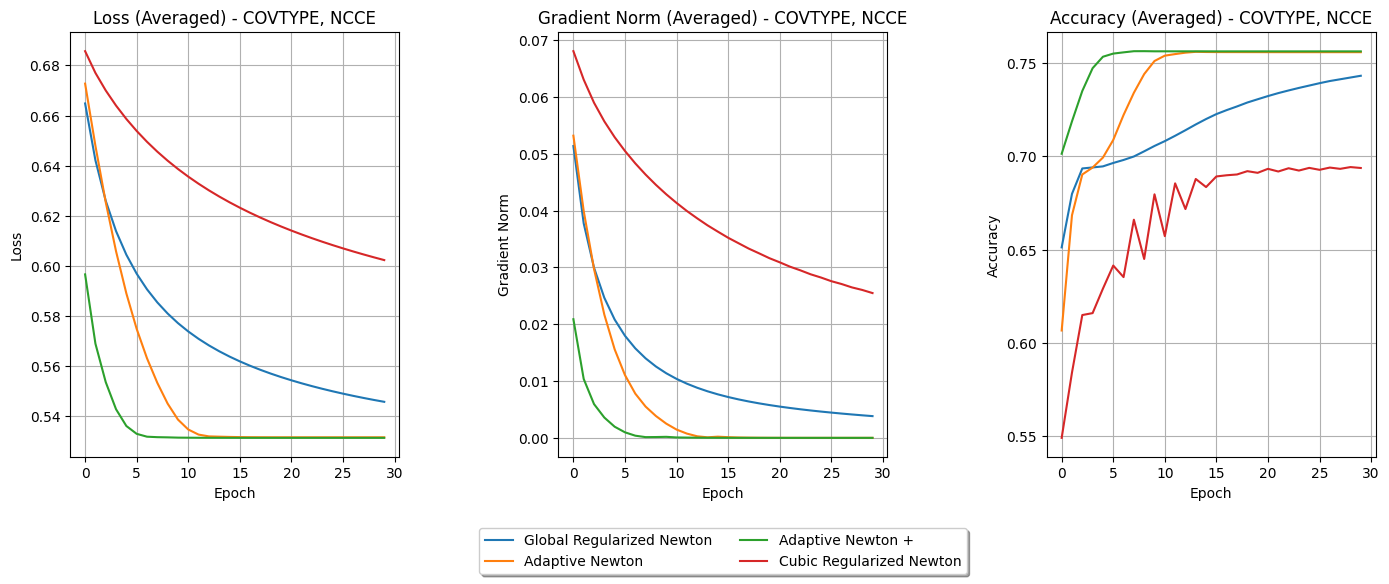

Average execution time(s): [13.47647985 31.30845594 21.32005628 14.6580193 ]
Average test accuracy(ies): [0.7422635  0.75596832 0.75517889 0.69320886]


In [8]:
generate_plots("COVTYPE", "NCCE", methods)
print(f"Average execution time(s): {np.mean(np.array(all_execution_times), axis=1)}")
print(f"Average test accuracy(ies): {np.mean(np.array(all_test_accuracies), axis=1)}")

## Examining Individual Runs on "ugly" data

In [ ]:
number_of_runs_per_method = 1
epochs = 800
methods = ["grn", "adan", "adanp", "crn"] # Dont need GD and Newton
all_execution_times, all_test_accuracies, all_gradient_norms, all_training_losses, all_training_accuracies = perform_runs("ncce", methods, "covtype", epochs=epochs)

In [ ]:
generate_plots("COVTYPE", "NCCE-conv", methods)